In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from simple_pid import PID
import time
#plt.rcParams['figure.dpi'] = 500

#Error signal
c = 3e8
L = 1.
fsr = c/(2*L)
f = np.arange(-.4*fsr,.4*fsr,fsr/1e4)
r1 = .99
r2 = .98
t1 = (1-r1**2)**.5
R = (r1-(r1**2+t1**2)*r2*np.e**(2j*2*np.pi*f*L/c))/(1-r1*r2*np.e**(2j*2*np.pi*f*L/c))
fm = 23e6
Rffm = (r1-(r1**2+t1**2)*r2*np.e**(2j*2*np.pi*(f+fm)*L/c))/(1-r1*r2*np.e**(2j*2*np.pi*(f+fm)*L/c))
Rfnfm = (r1-(r1**2+t1**2)*r2*np.e**(2j*2*np.pi*(f-fm)*L/c))/(1-r1*r2*np.e**(2j*2*np.pi*(f-fm)*L/c))
pdh = R*np.conjugate(Rffm)-np.conjugate(R)*Rfnfm

plt.subplot(311)
plt.plot(f/1e6,100*np.abs(R)**2,'#880088')
plt.axis([-.4*fsr/1e6,.4*fsr/1e6,0,102])
plt.ylabel('Reflected power (\%)')

plt.subplot(312)
plt.plot(f/1e6,180*np.angle(R)/np.pi,'#880088')
plt.axis([-.4*fsr/1e6,.4*fsr/1e6,-35,35])
plt.ylabel('Reflected phase (deg.)')
plt.subplot(313)

plt.plot(f/1e6,np.imag(pdh),'#880088')
plt.ylabel('PDH readout (arb.)')
plt.xlabel('$f-f_\mathrm{res}$ (MHz)')

In [5]:
#e(f)
def error(x):
    
    return np.sin(x)*np.e**(-(x-3)**2)
#u(e)
#this will be pid(e)

#f(u)
def cavity(x): 
    return -0.5/(20*(x-np.pi)**2+0.5)

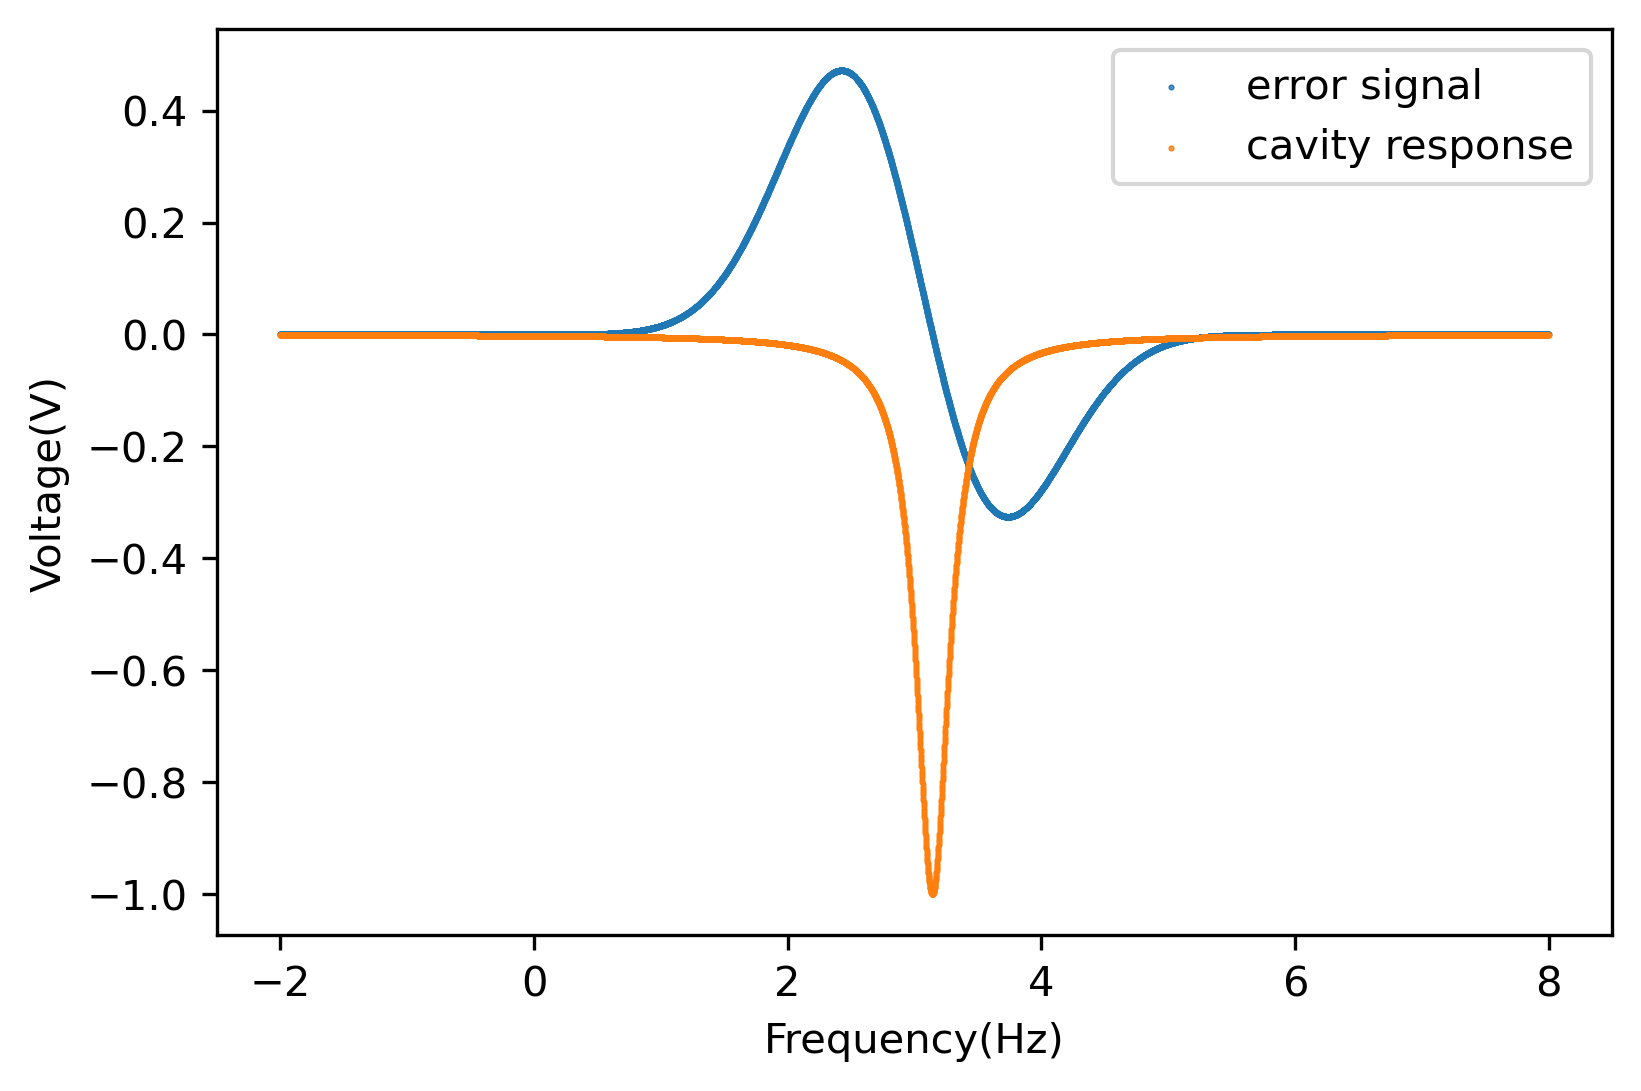

In [6]:
plt.figure(dpi=300)
x=np.linspace(-2,8,10000)
plt.scatter(x,error(x),s=0.2,label='error signal')#where the x is the voltage 
plt.scatter(x,cavity(x),s=0.2,label='cavity response')
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Voltage(V)') 
plt.legend()

In [12]:
time.time()

1713858195.513018

In [13]:
#suppose voltage on the piezo is linear to the frequency output: f = k*v
#suppose at x=10, there is a resonance at x = 10, and your initial value 

In [158]:

# Define the PID class (basic structure for illustration)
class PID:
    def __init__(self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint
        self.integral = 0
        self.last_error = 0

    def update(self, measurement):
        error = self.setpoint - measurement
        self.integral += error
        derivative = error - self.last_error
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.last_error = error
        return output

    
def andrew(a,b=0,c=0):   
    # Initialize PID controller
    pid_controller = PID(Kp=a, Ki=b, Kd=c, setpoint=0)

    # Initial value of x
    x = 1.5
    print(f'Initial x: {x}, Initial error: {error(x)}')
    response = np.array([])
    voltage = np.array([])
    # Simulation loop
    for i in range(5000):
        correction = pid_controller.update(error(x))
        noise = np.random.normal(0, 0.1)*0.23
        x -= correction + noise
        response = np.append(response,cavity(x))
        voltage = np.append(voltage,x)
        #print(f'\nThis is my {i+1}th attempt-----------------------------------------------')
        #print(f'Your voltage is {x}, and the corresponding error is {error(x)}, my correction is {correction}, my noise is {noise}')

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    # First subplot
    axs[0].scatter(np.arange(0, len(response), 1), response, s=2, marker='x', label='Cavity Response')
    axs[0].set_ylim(-1, 0)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Response')
    axs[0].legend()
    # Second subplot
    axs[1].scatter(np.arange(0, len(voltage), 1), voltage, s=2, marker='x',label=f'Voltage.:: P,I,D = {a:.2f}, {b:.2f}, {c:.2f} \n avg = {np.average(voltage[50:450]):.3f} ; STD = {np.std(voltage[50:450]):.3f}')    
    #xs[1].set_xlim(0, 300)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Voltage')
    axs[1].legend()
    # Show the plot
    plt.show()
    return None



Initial x: 1.5, Initial error: 0.1051351980924146


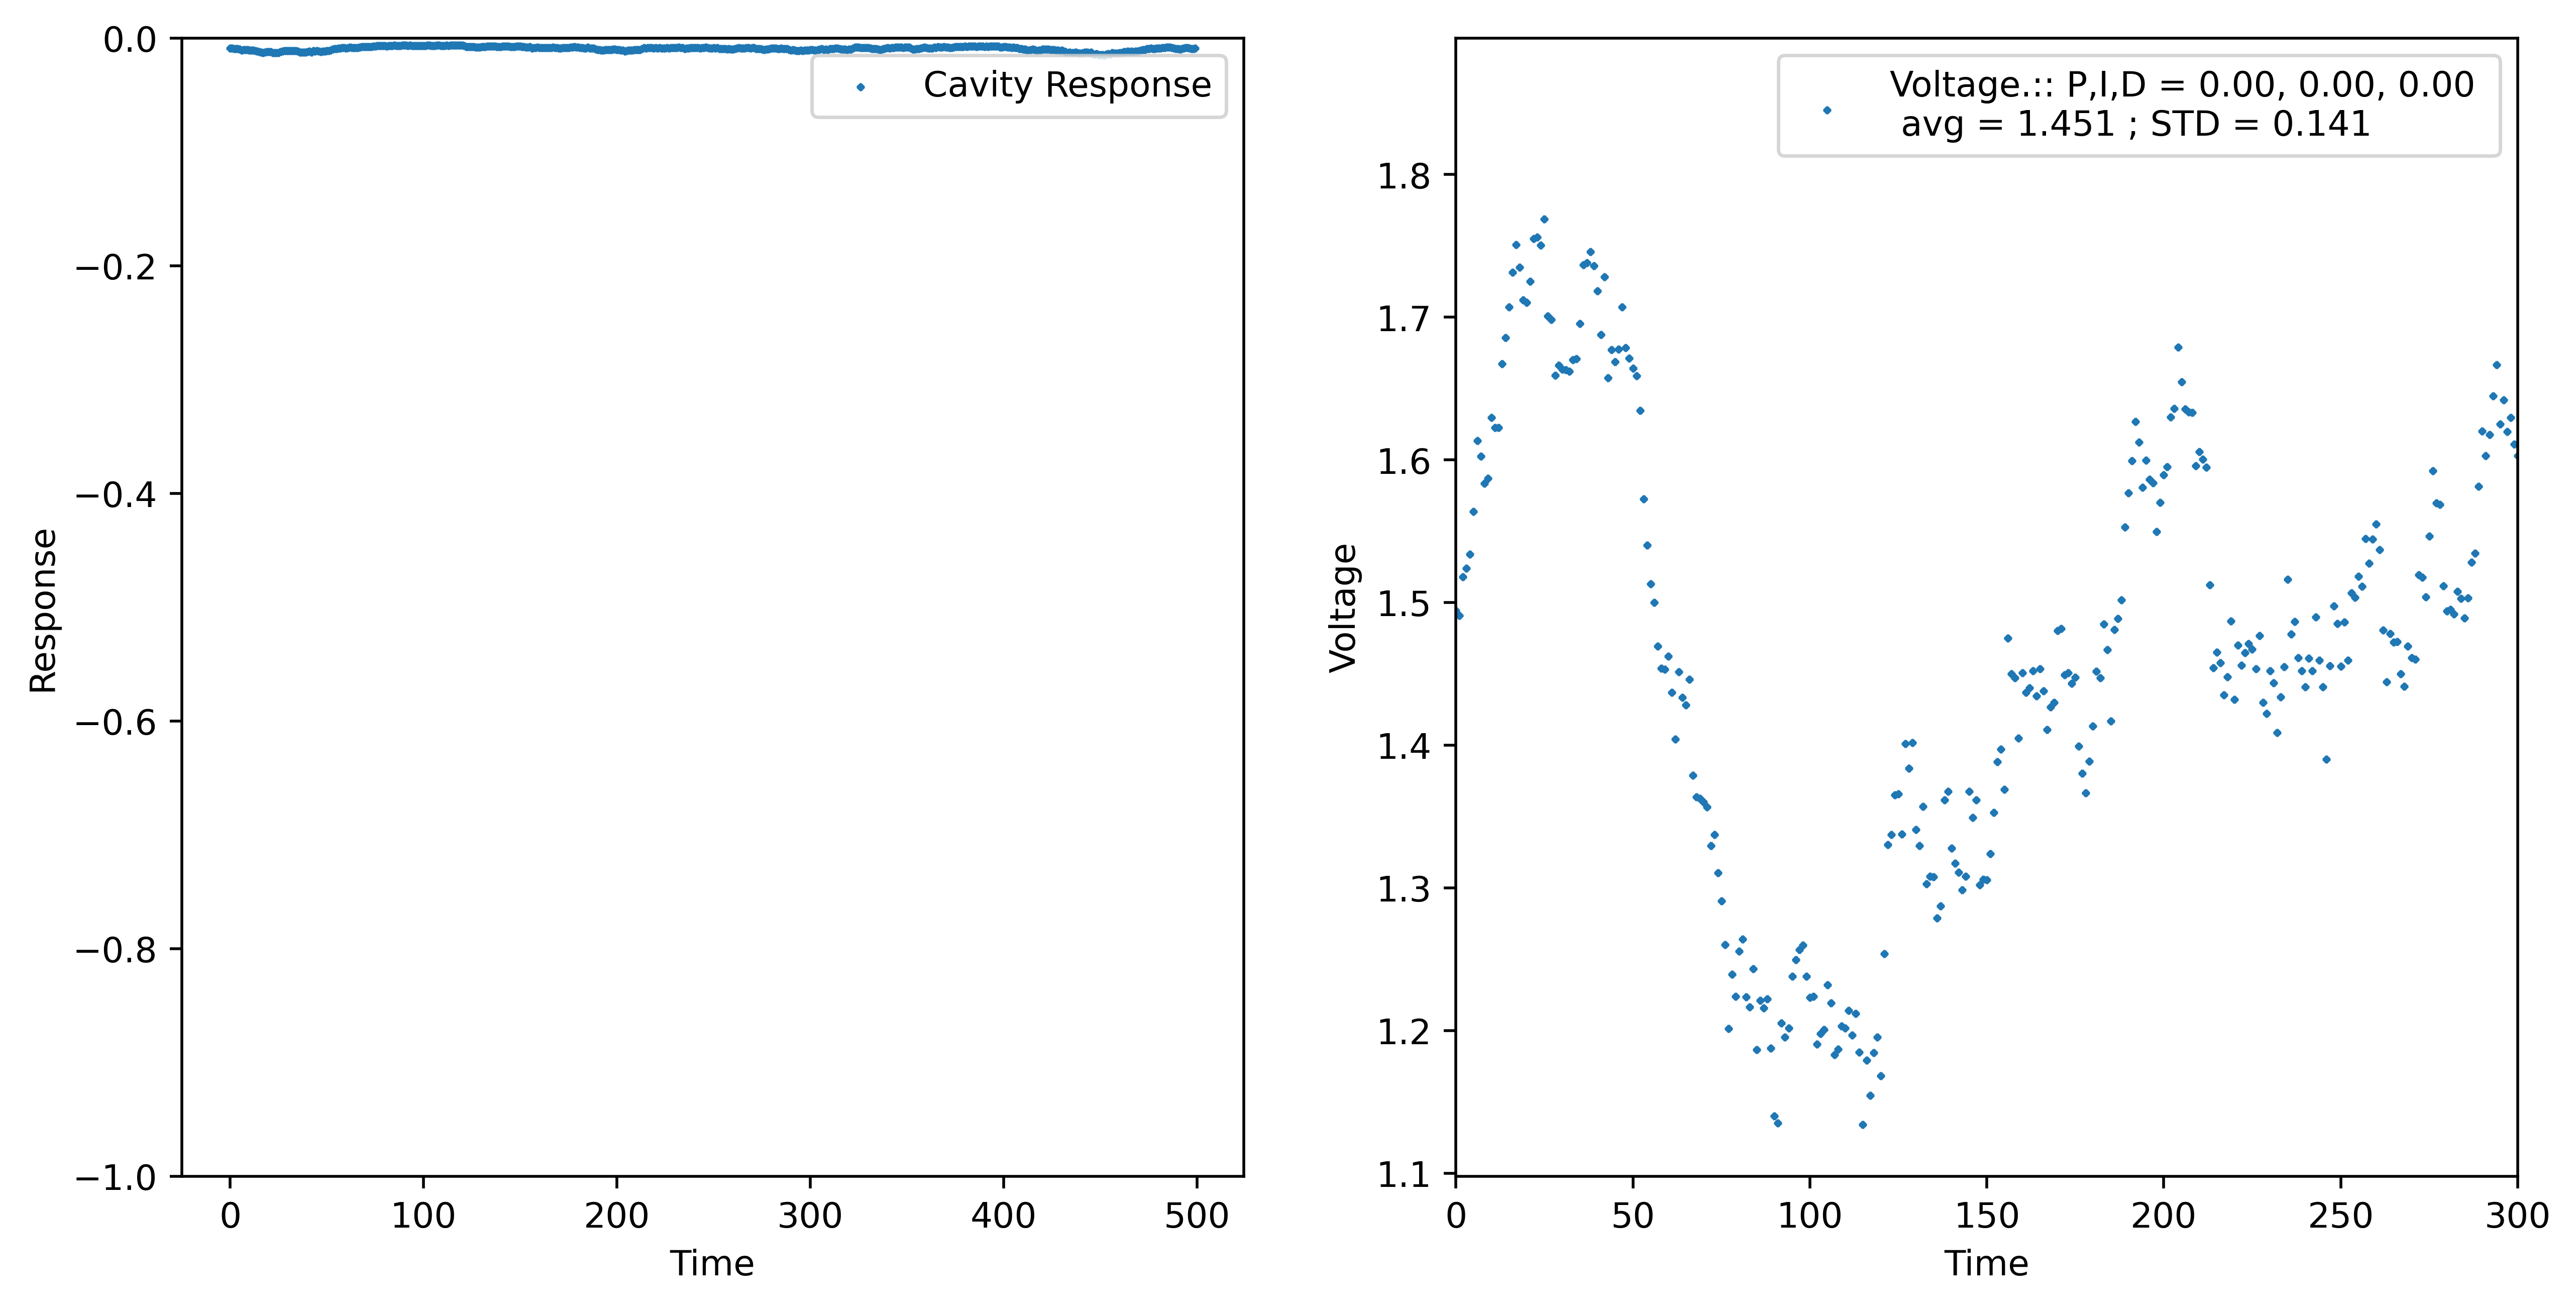

Initial x: 1.5, Initial error: 0.1051351980924146


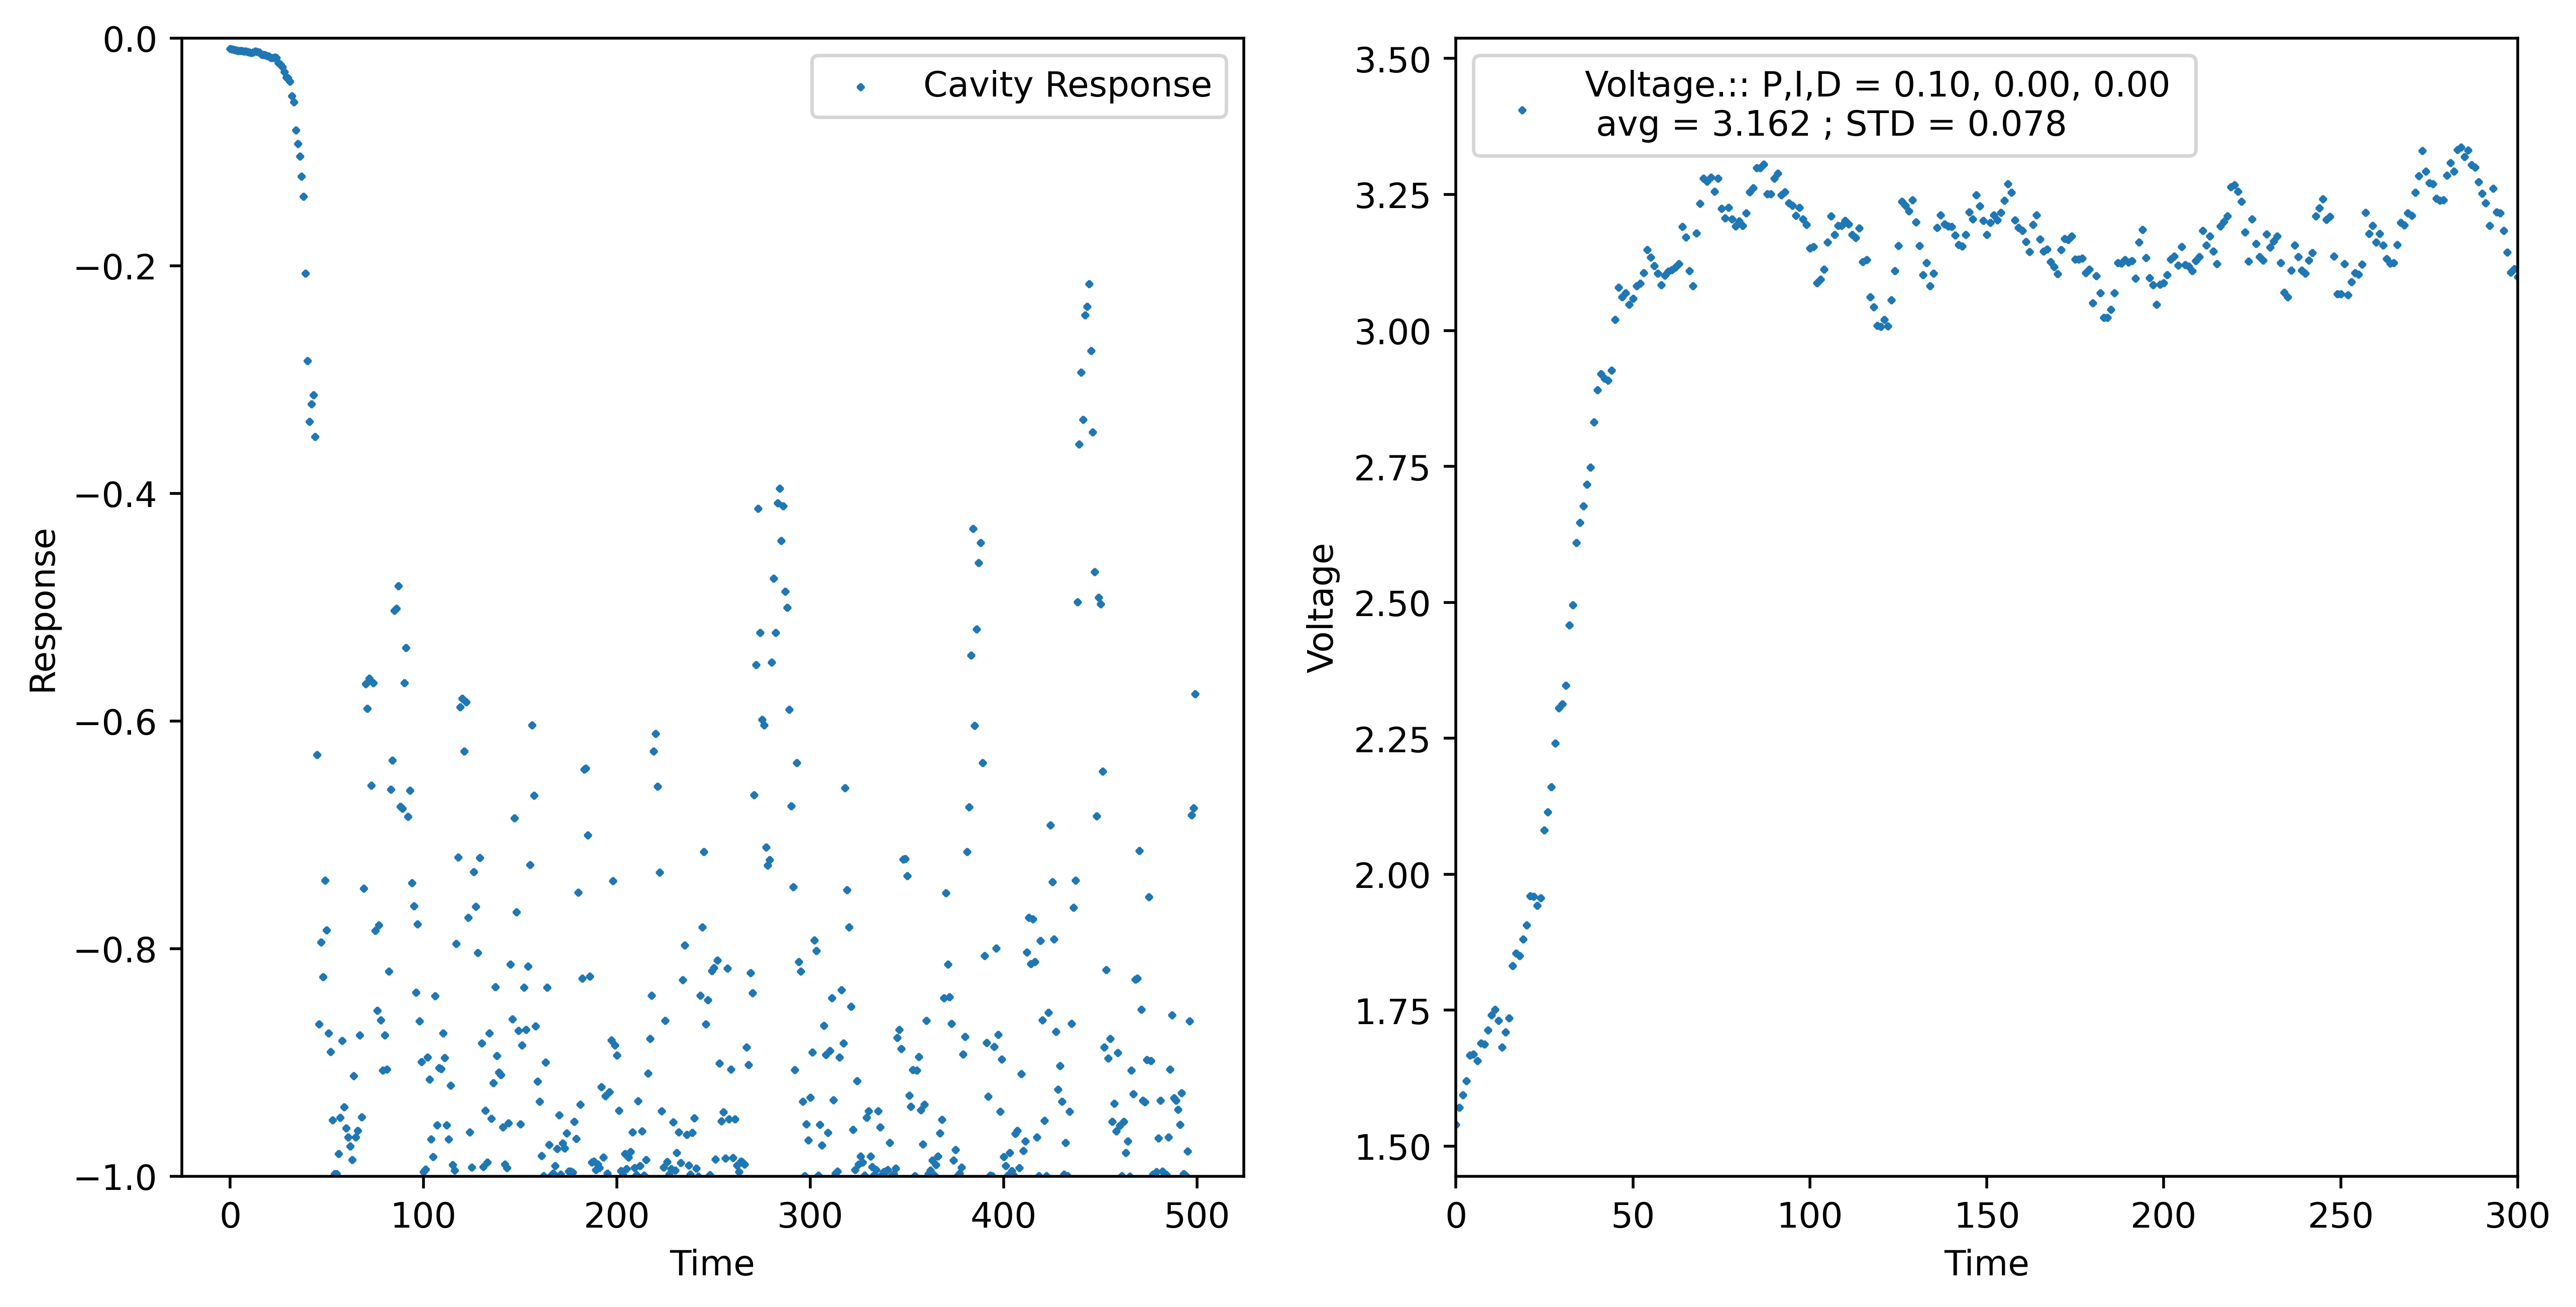

Initial x: 1.5, Initial error: 0.1051351980924146


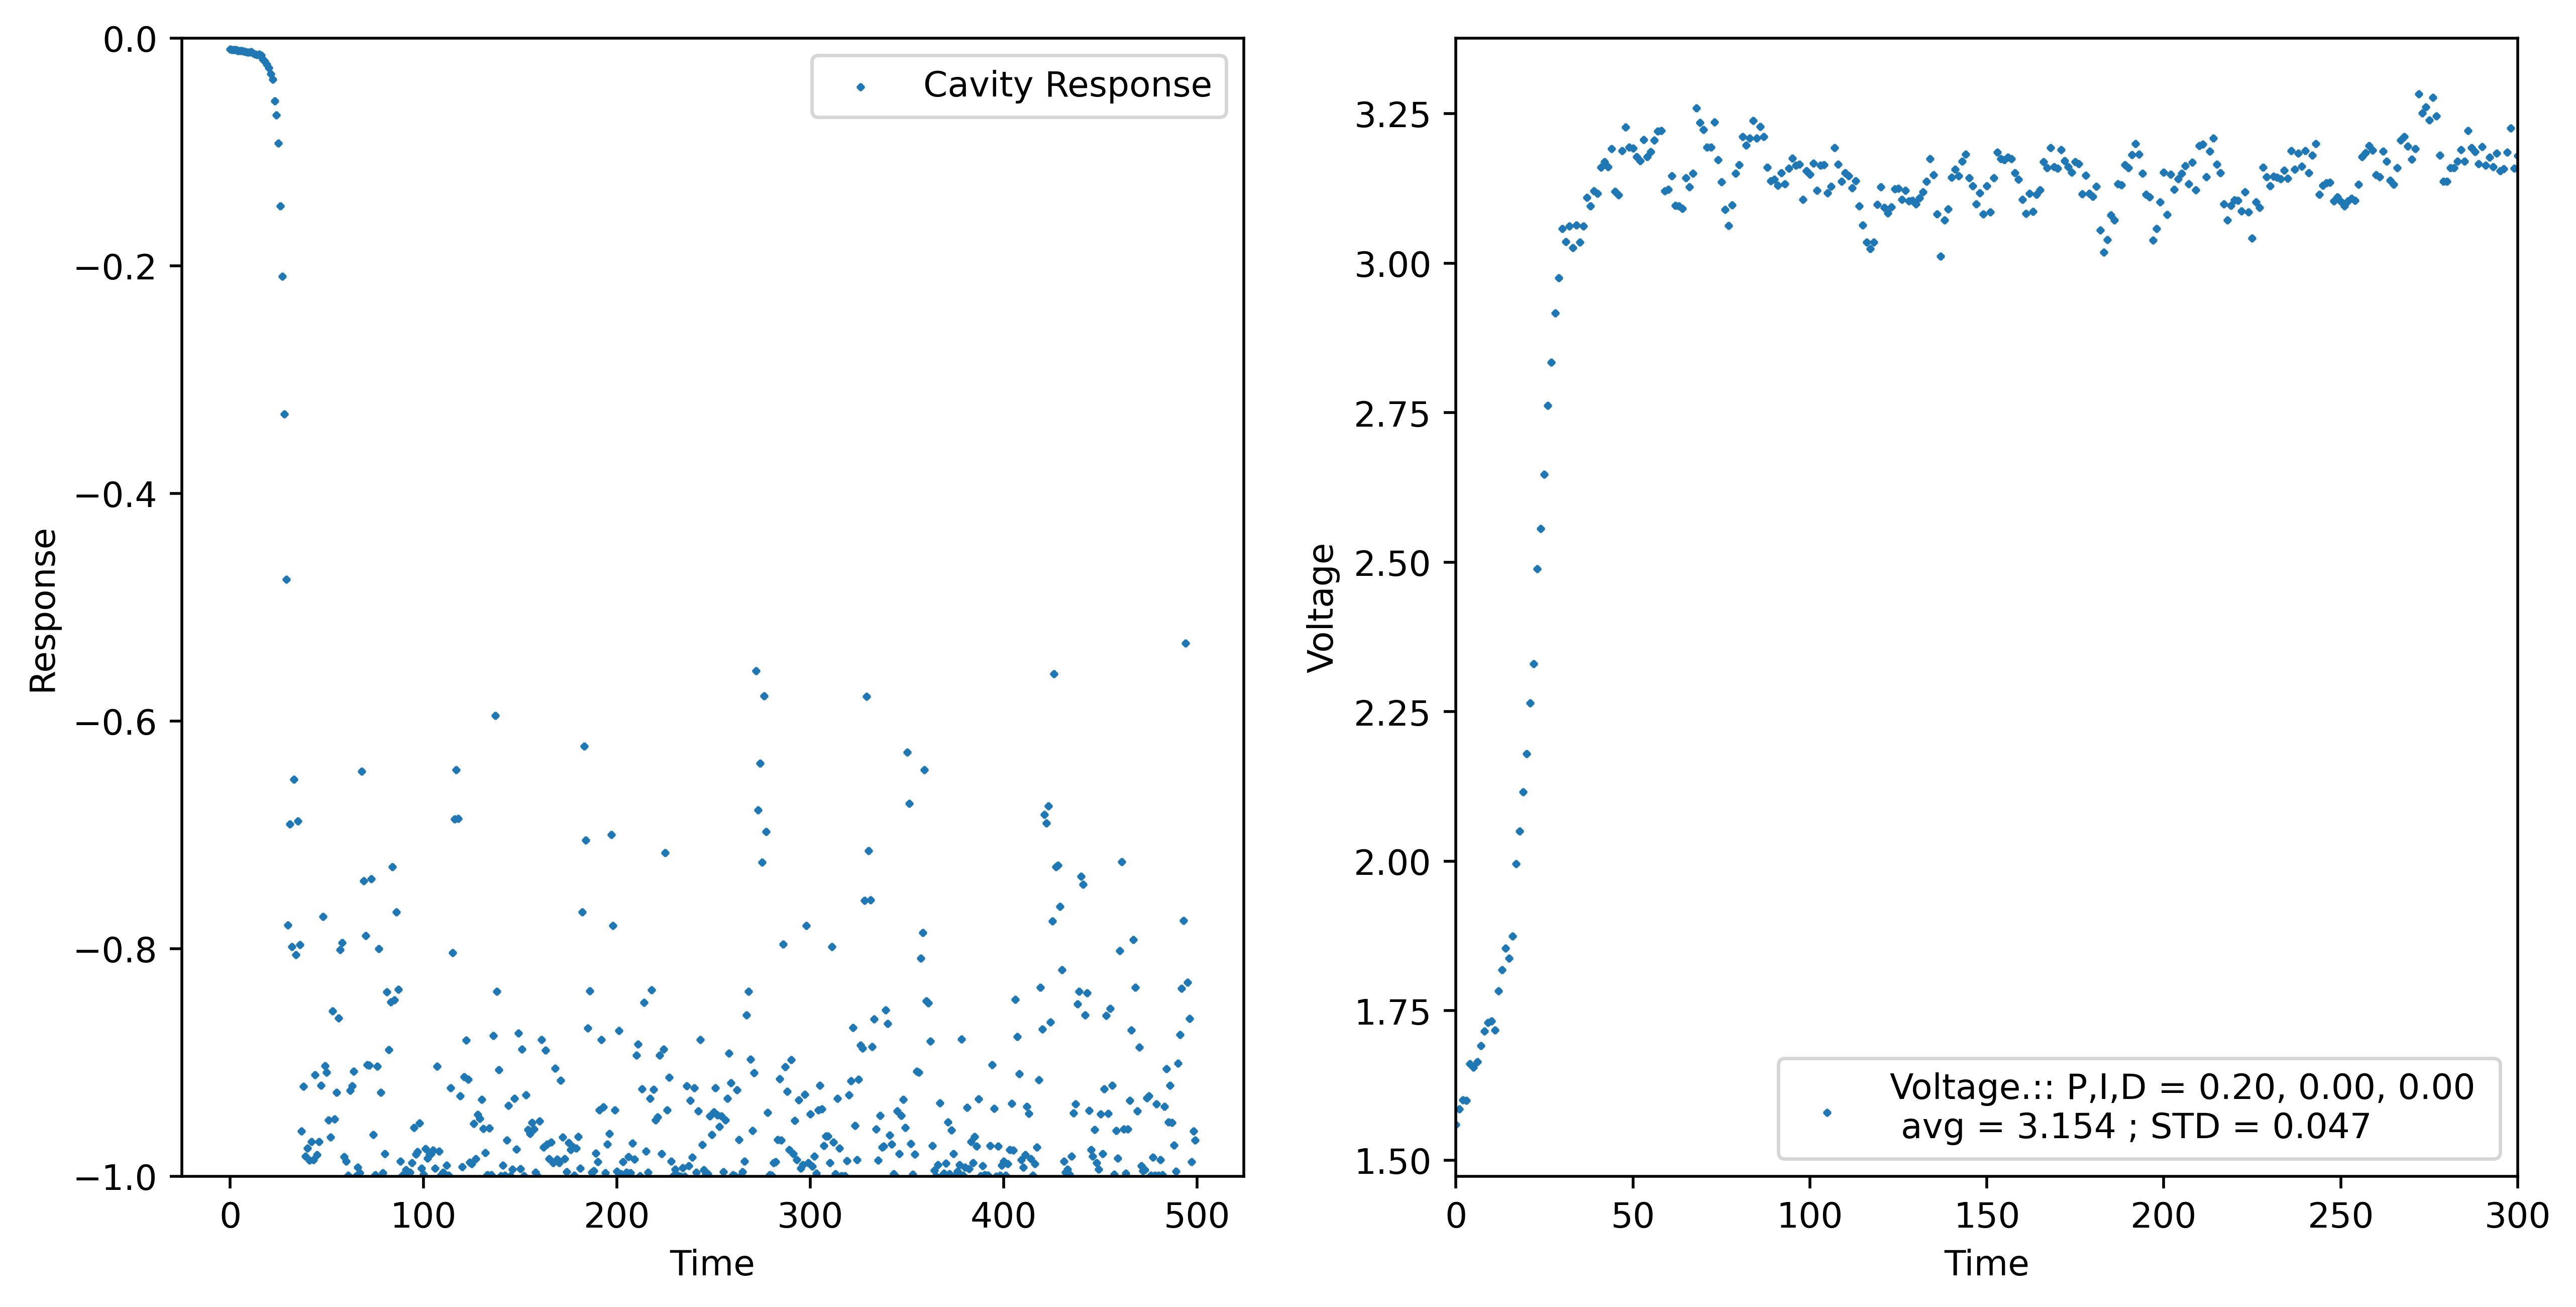

Initial x: 1.5, Initial error: 0.1051351980924146


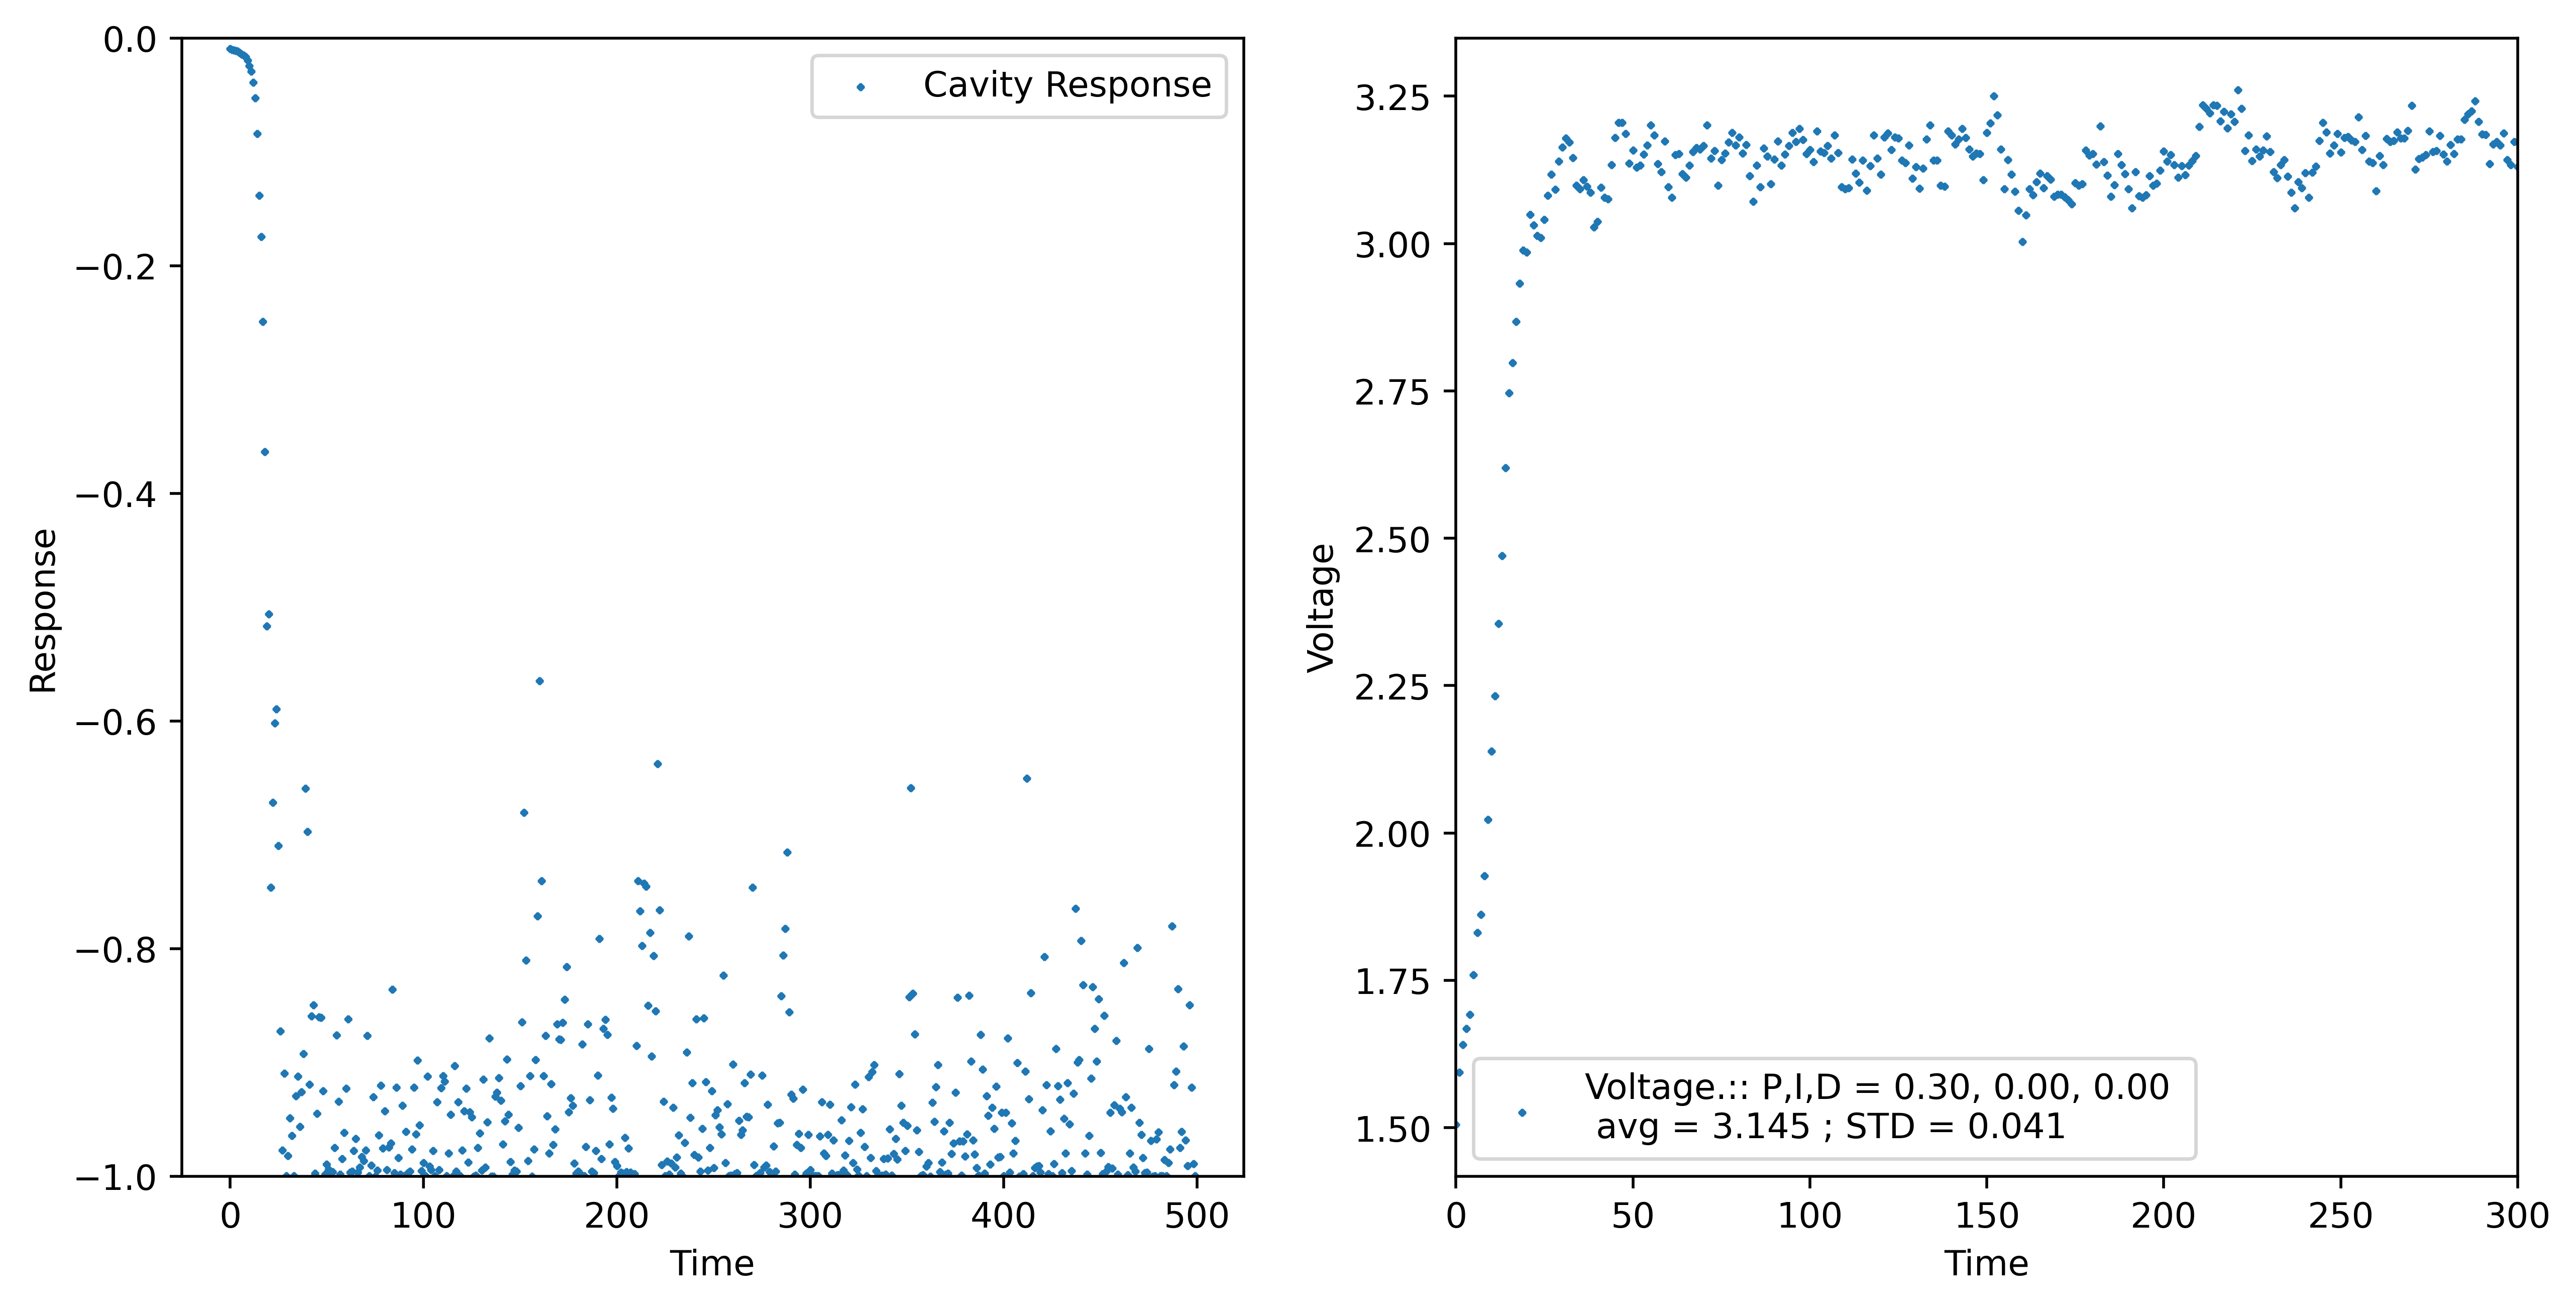

Initial x: 1.5, Initial error: 0.1051351980924146


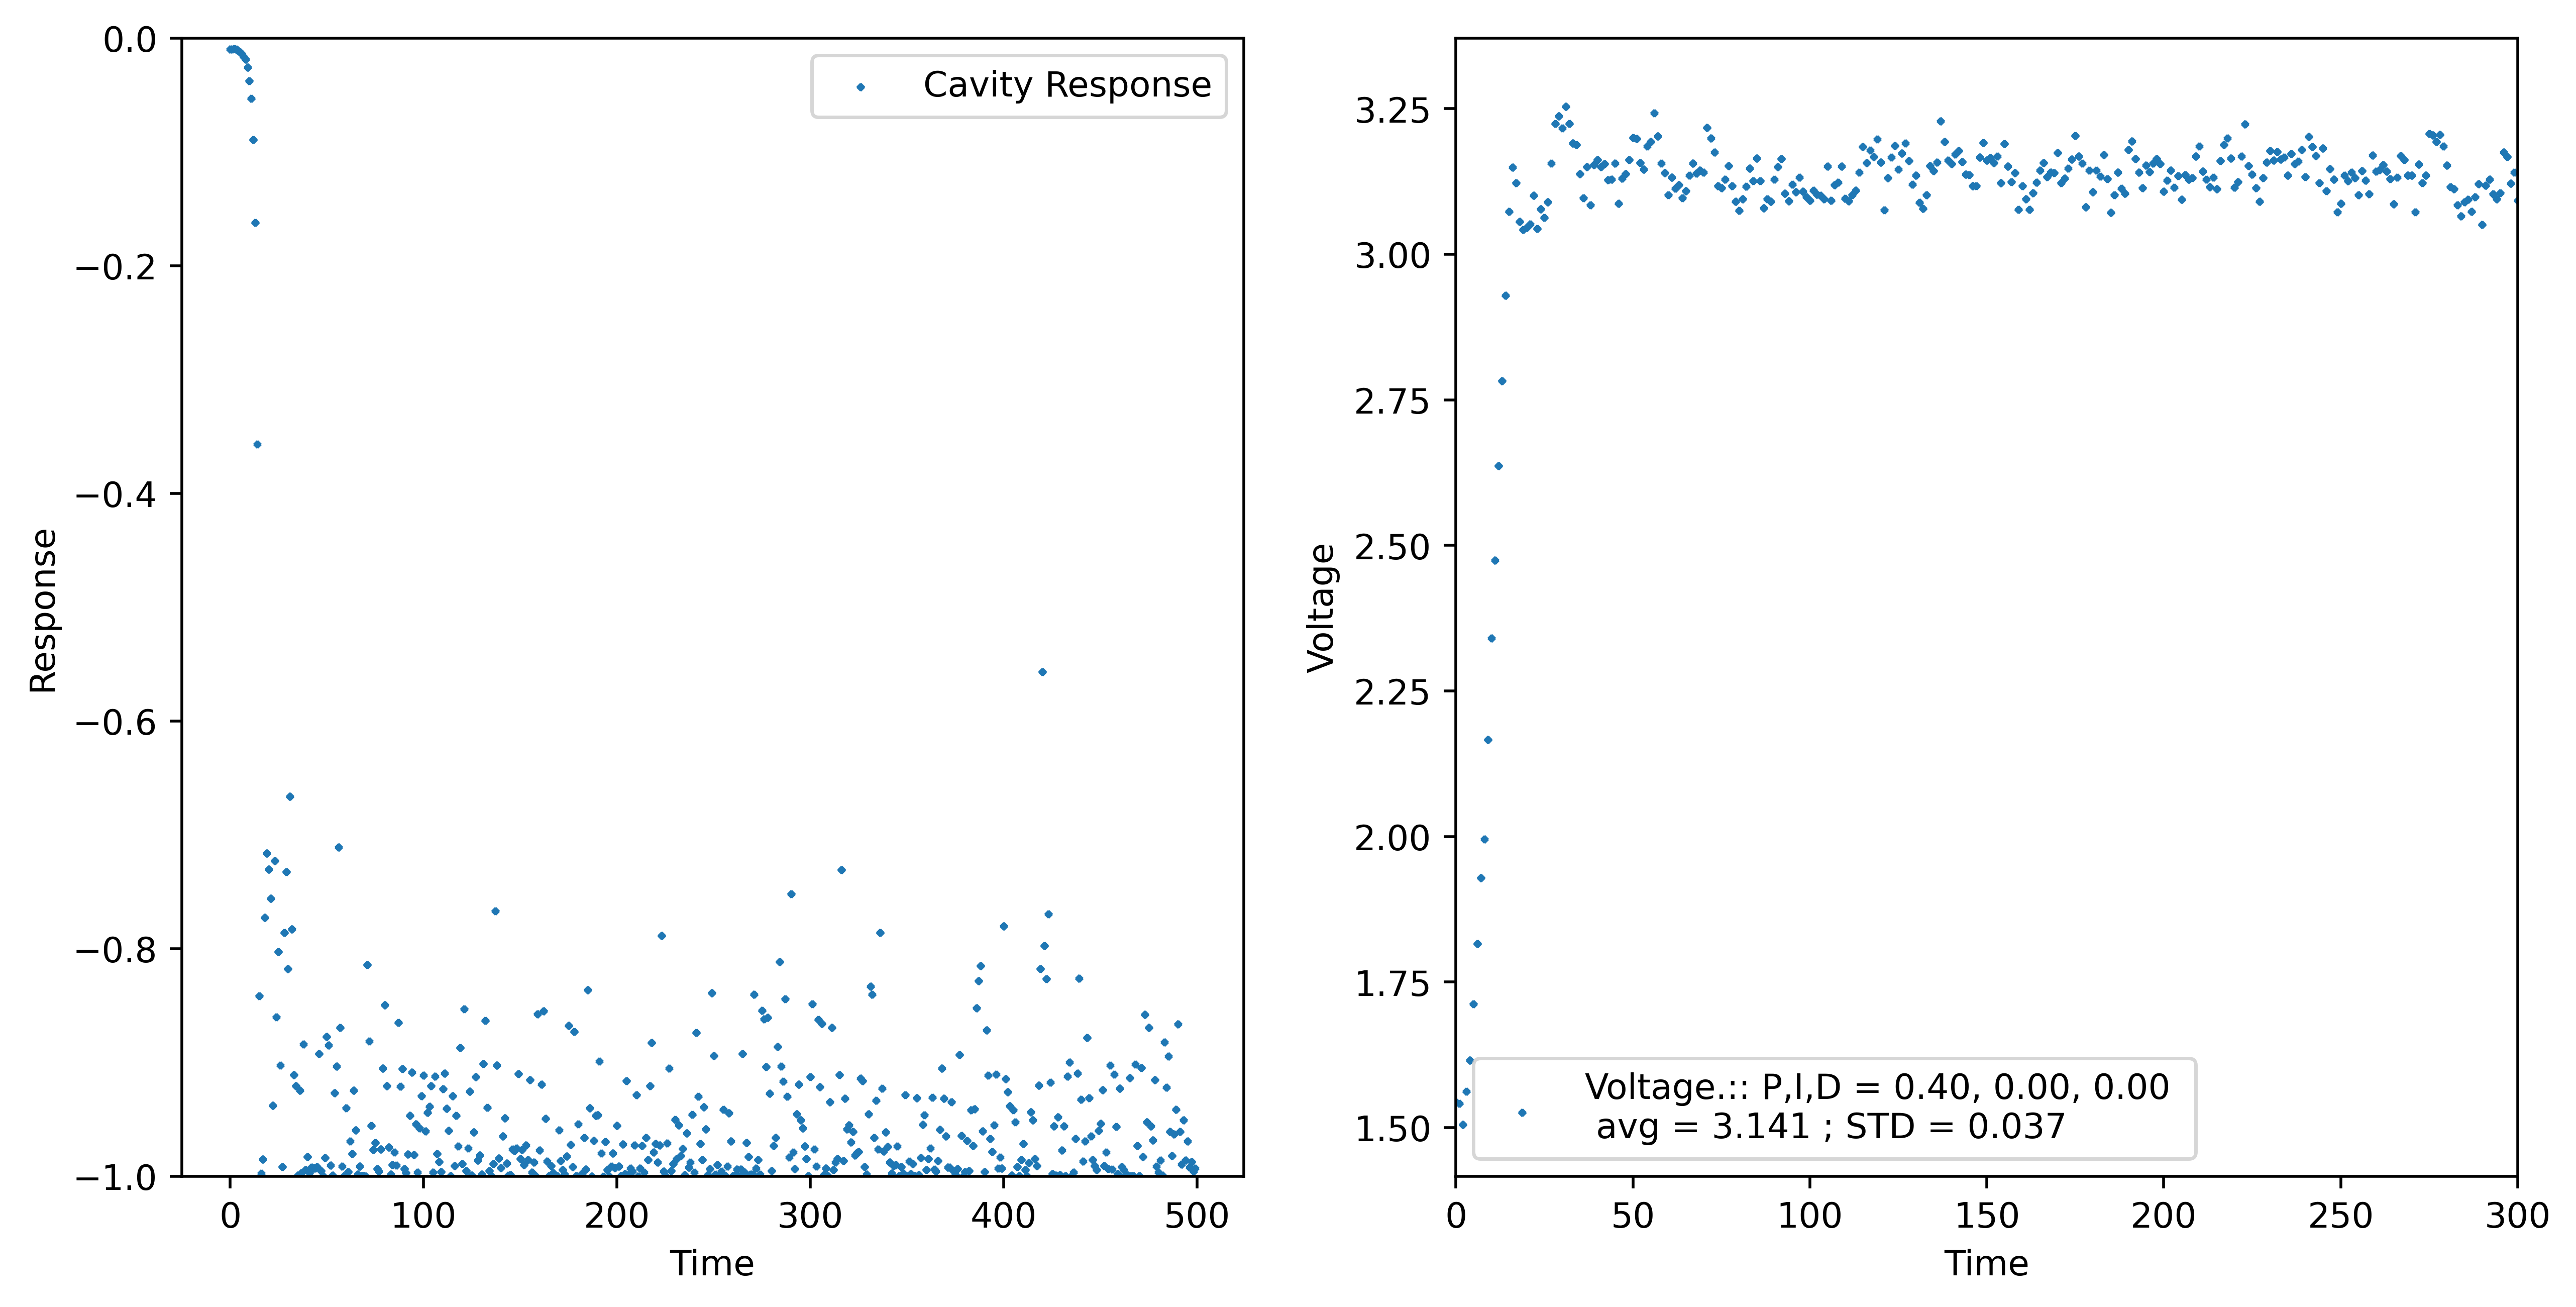

Initial x: 1.5, Initial error: 0.1051351980924146


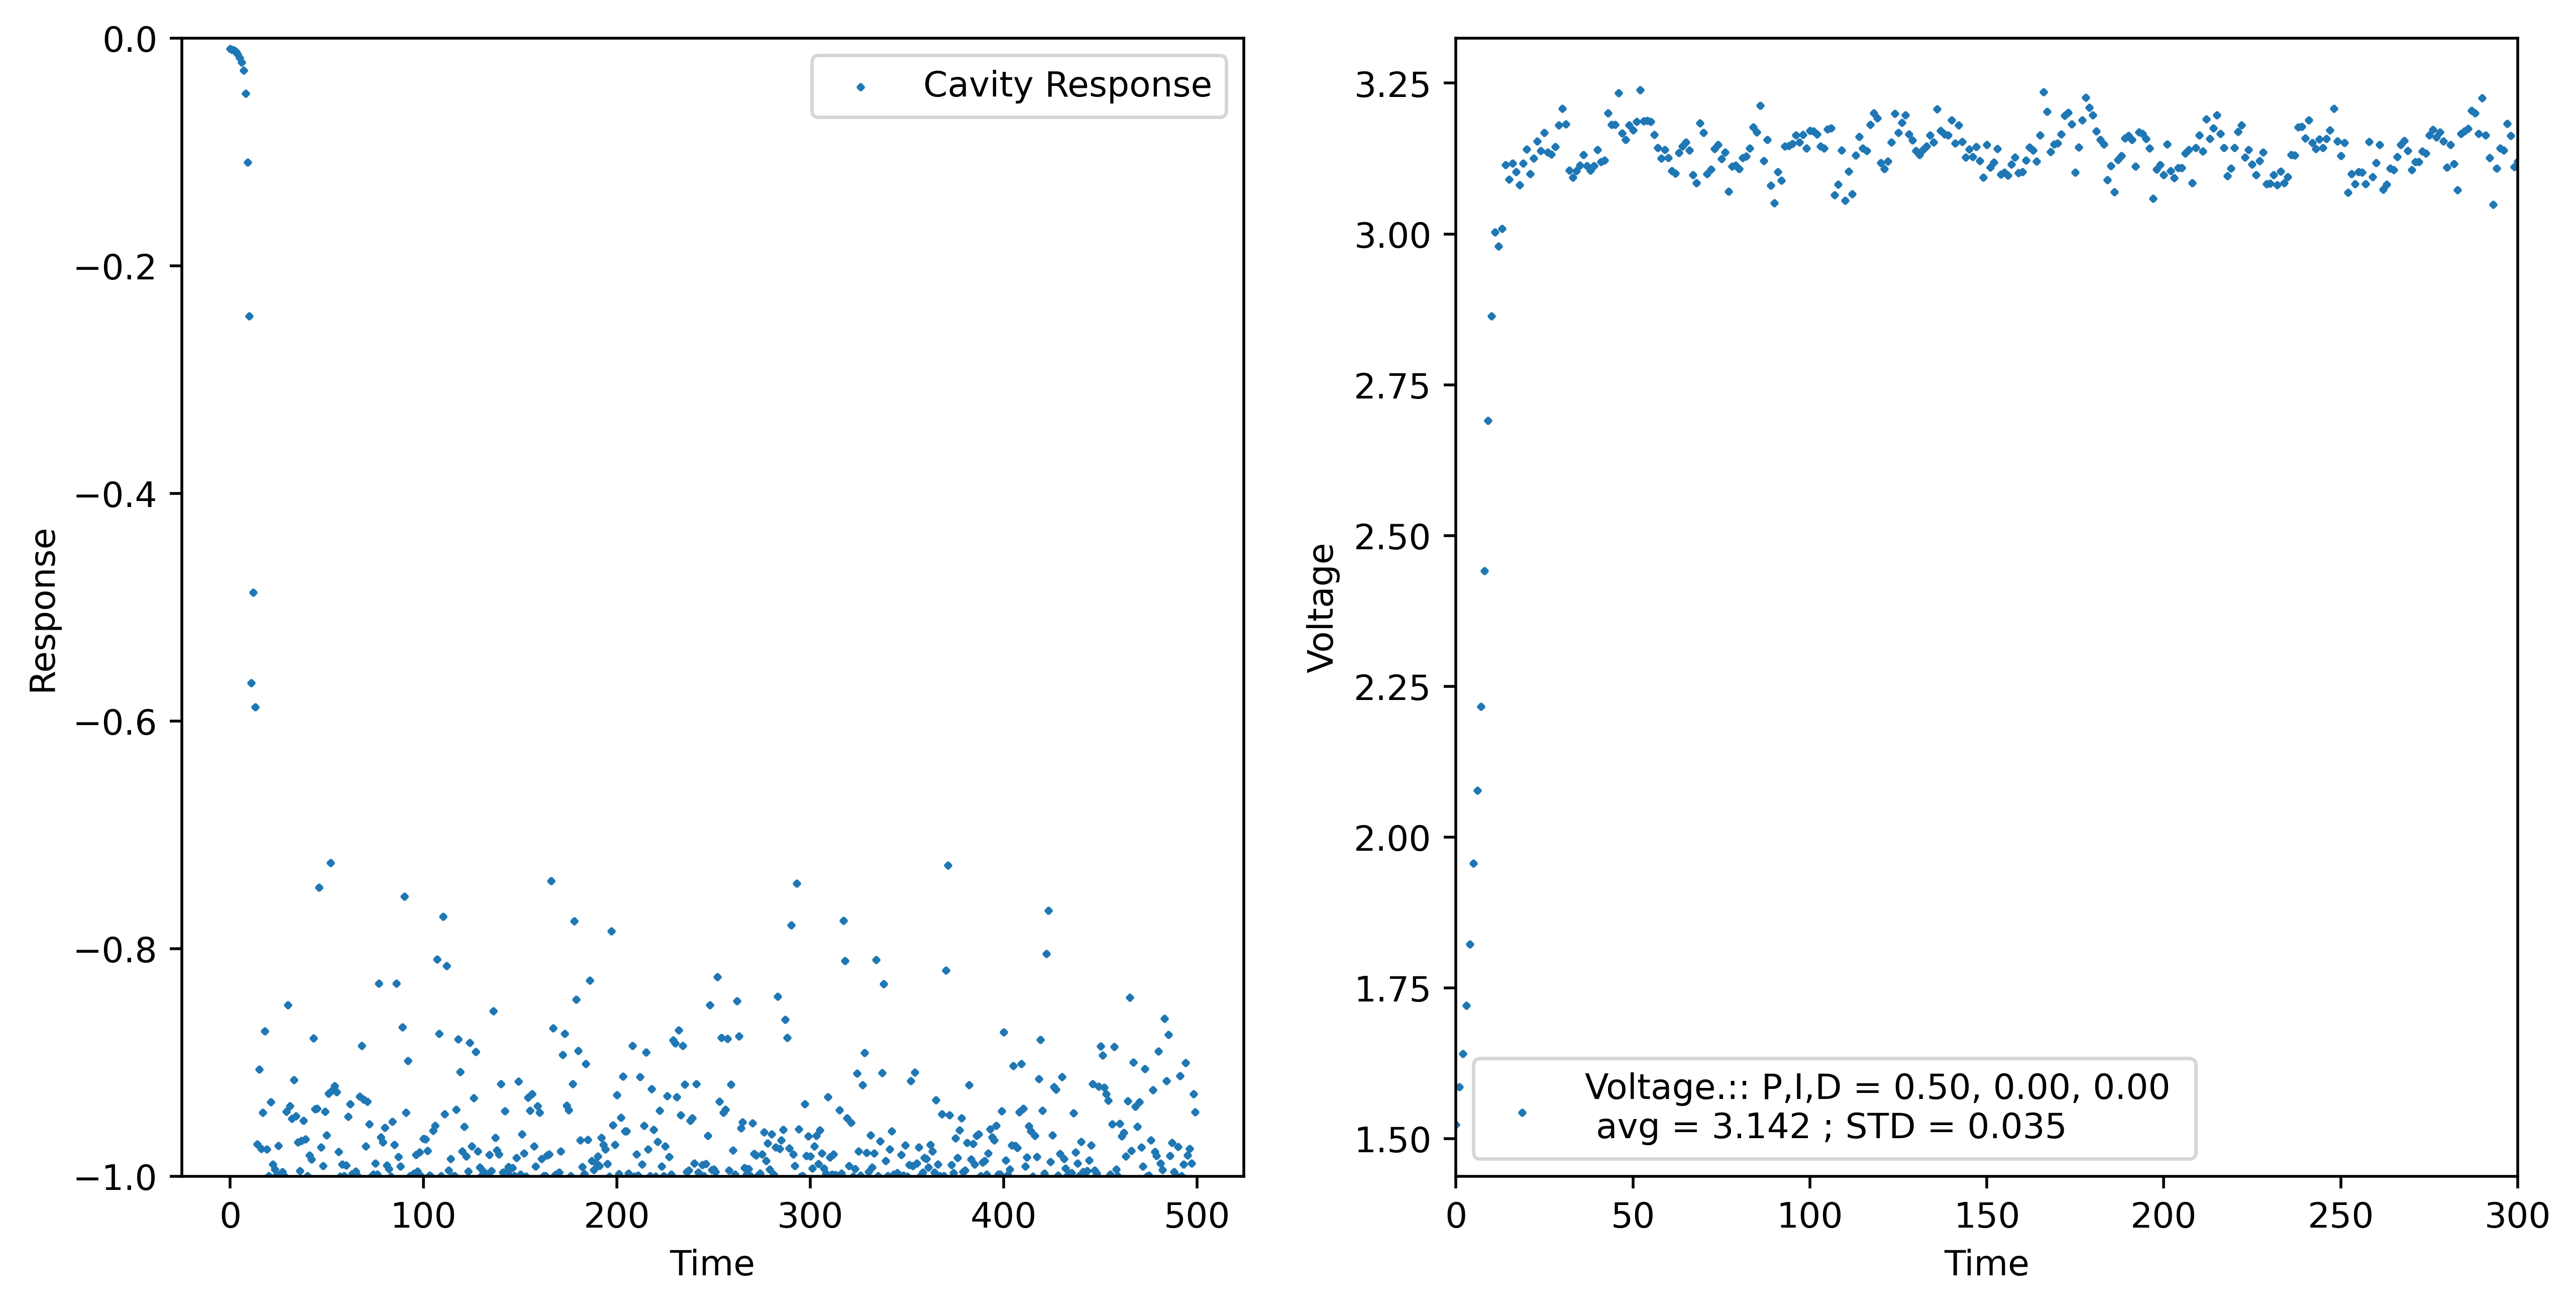

Initial x: 1.5, Initial error: 0.1051351980924146


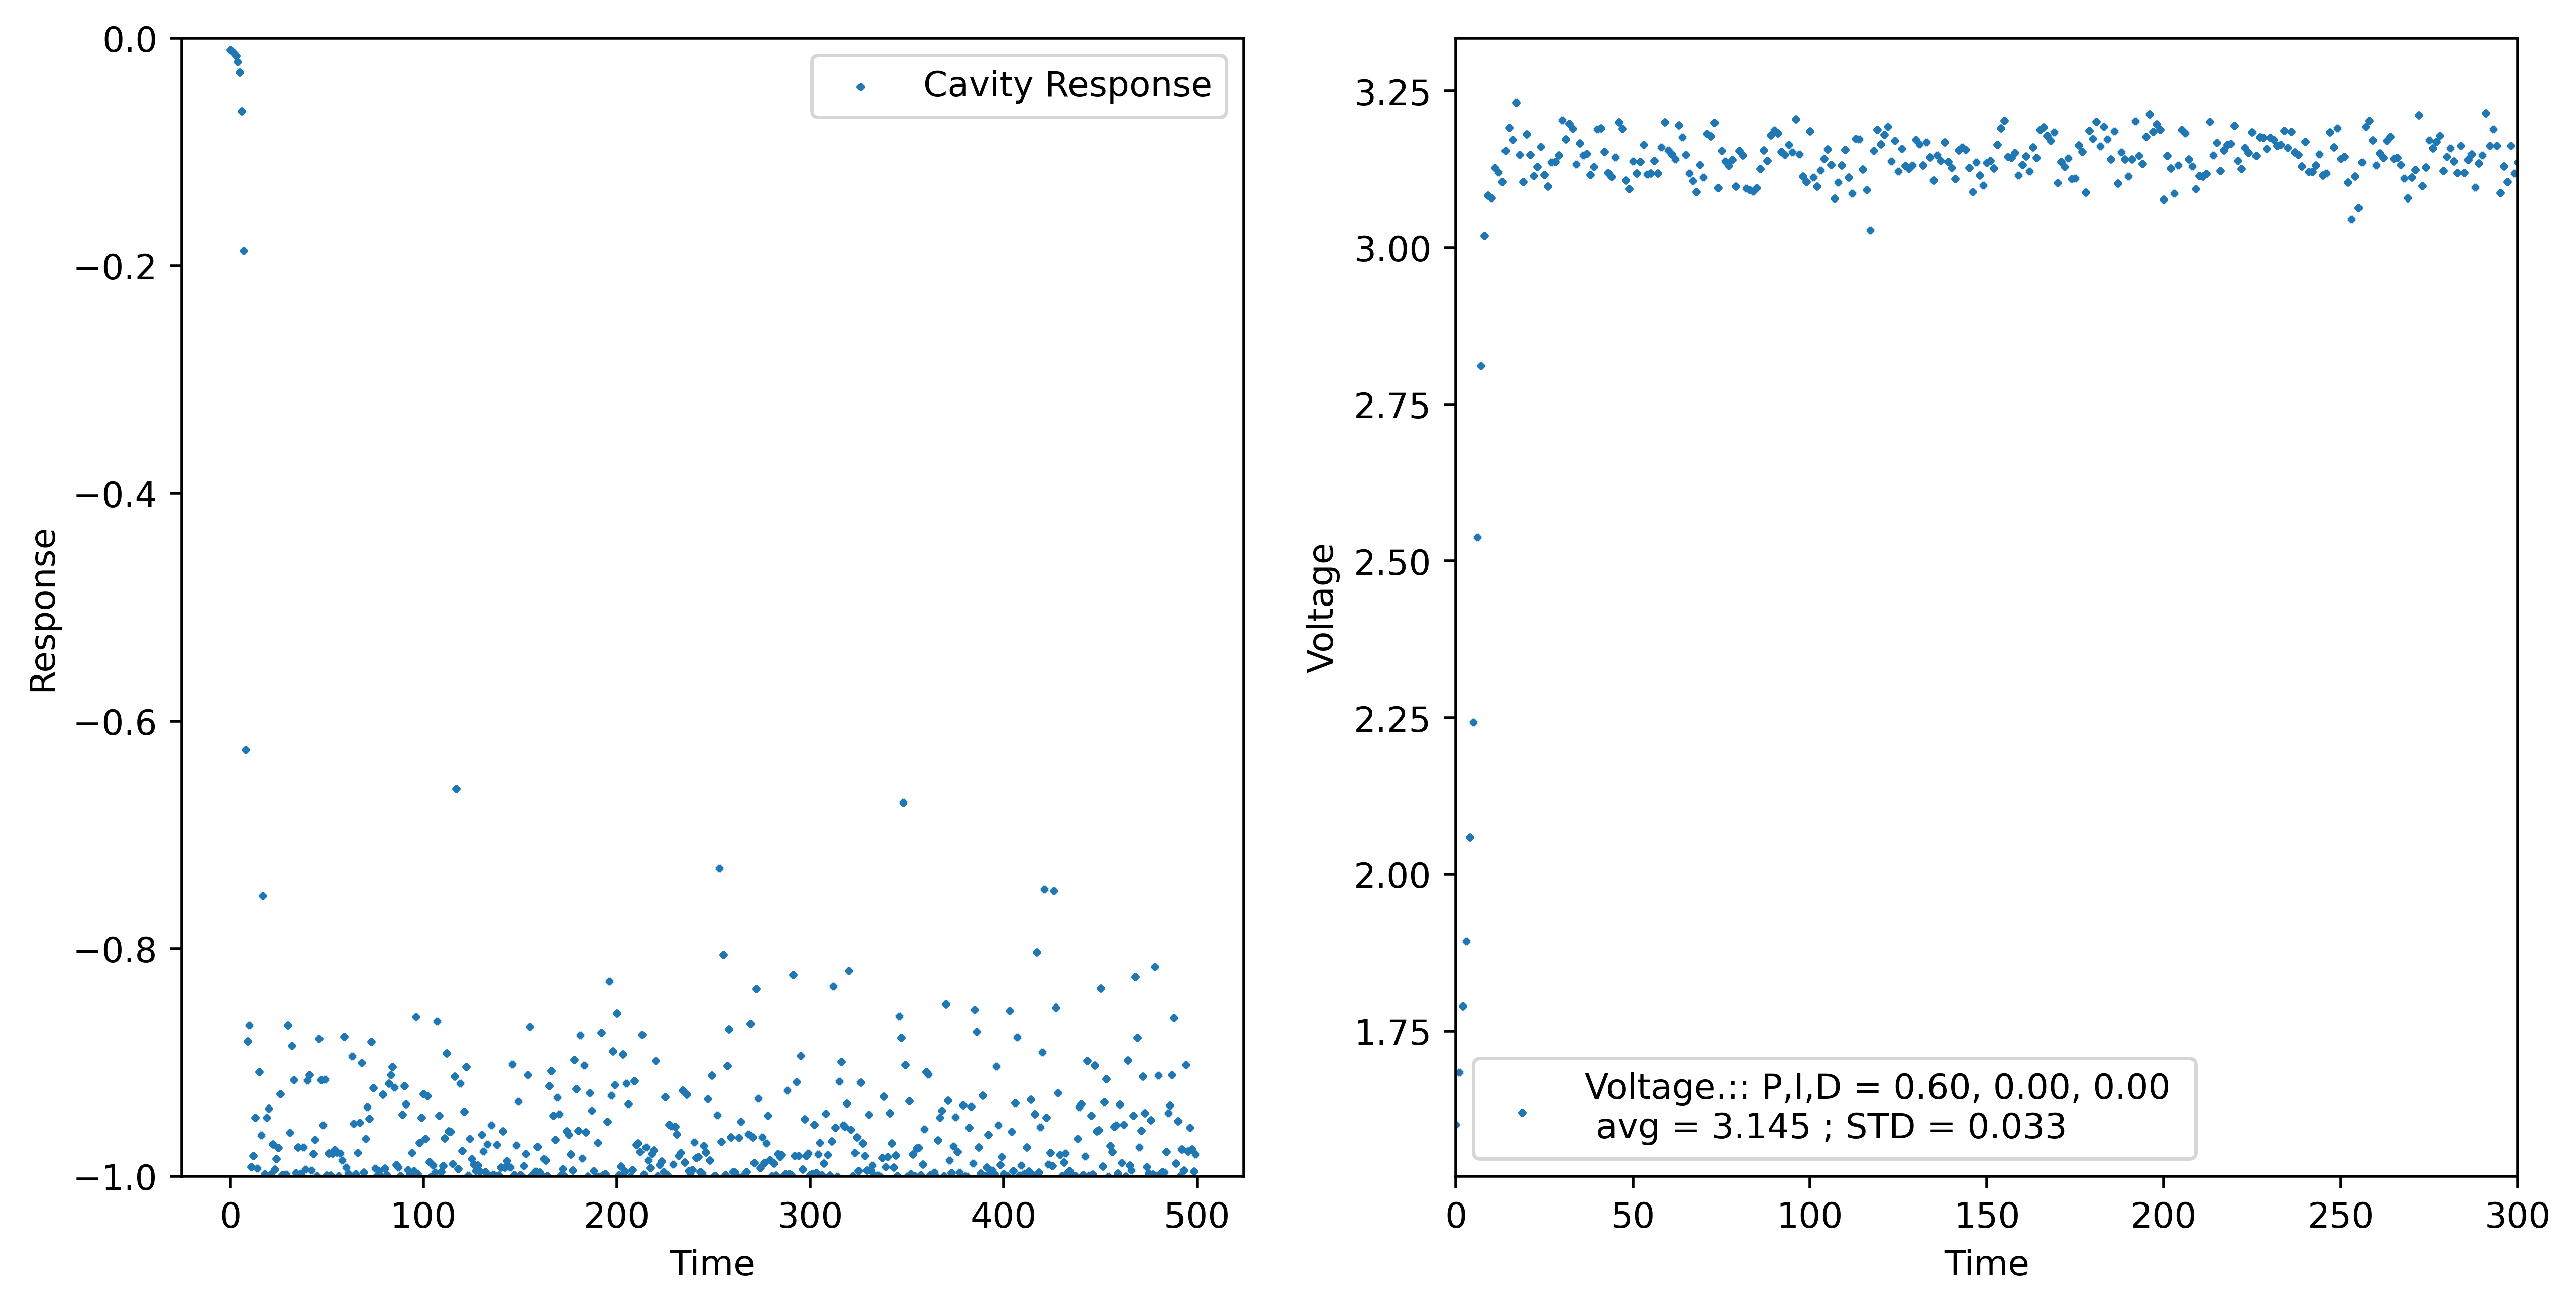

Initial x: 1.5, Initial error: 0.1051351980924146


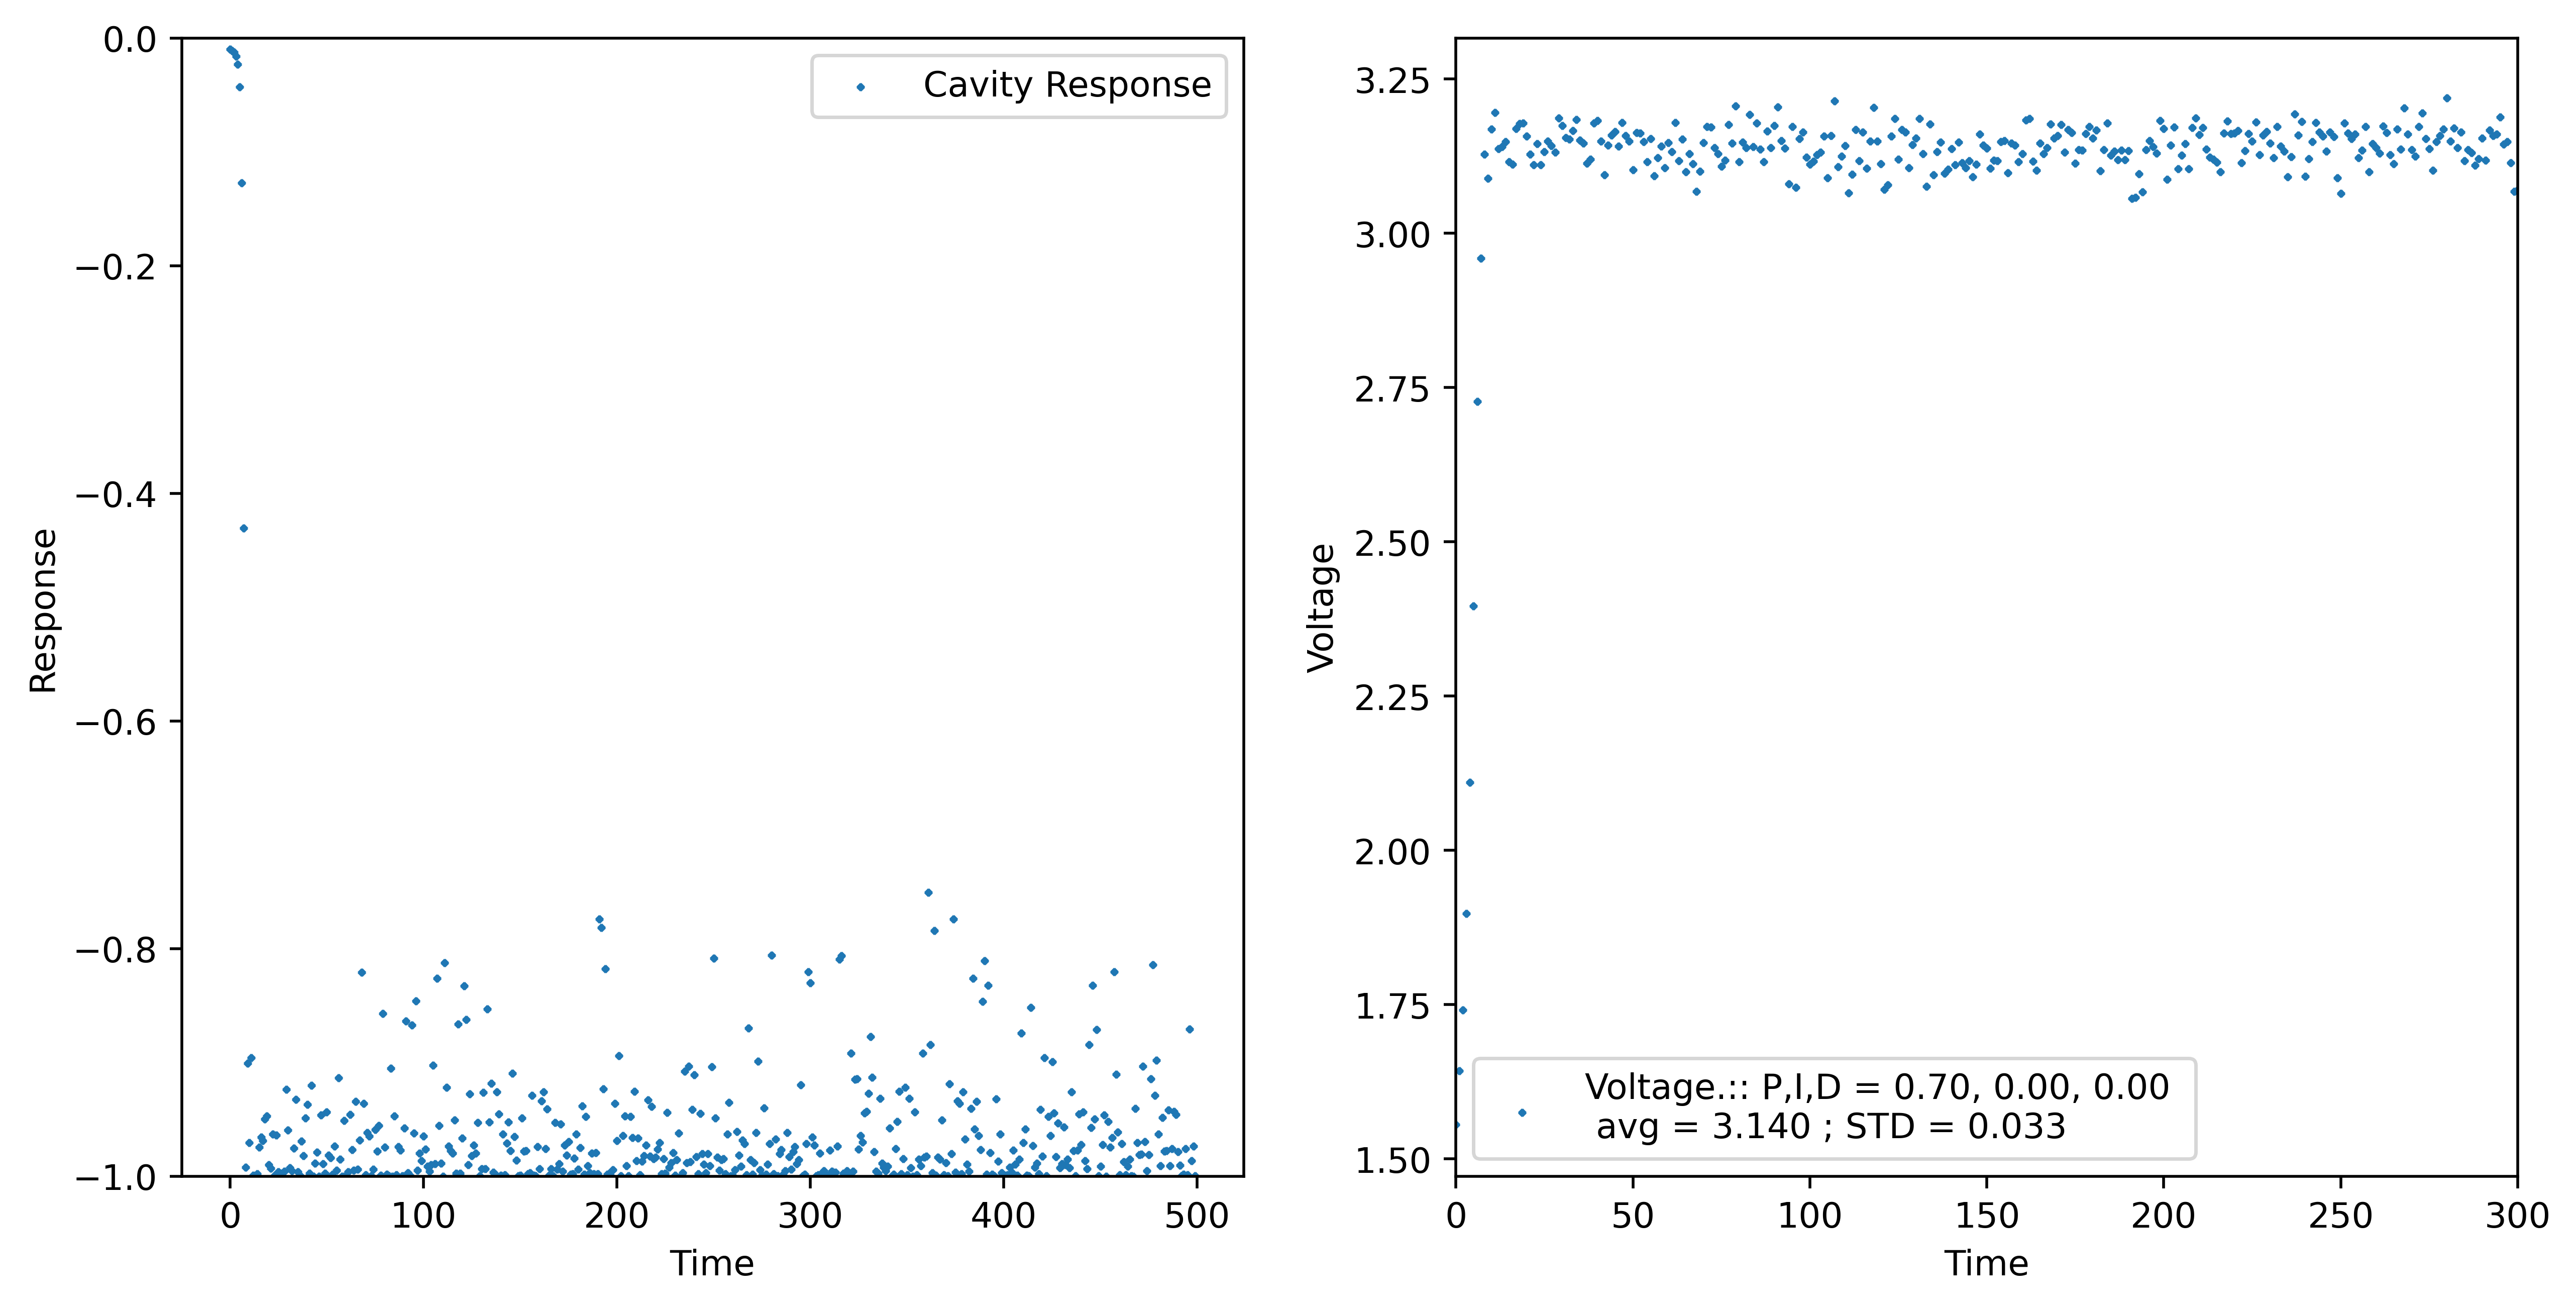

Initial x: 1.5, Initial error: 0.1051351980924146


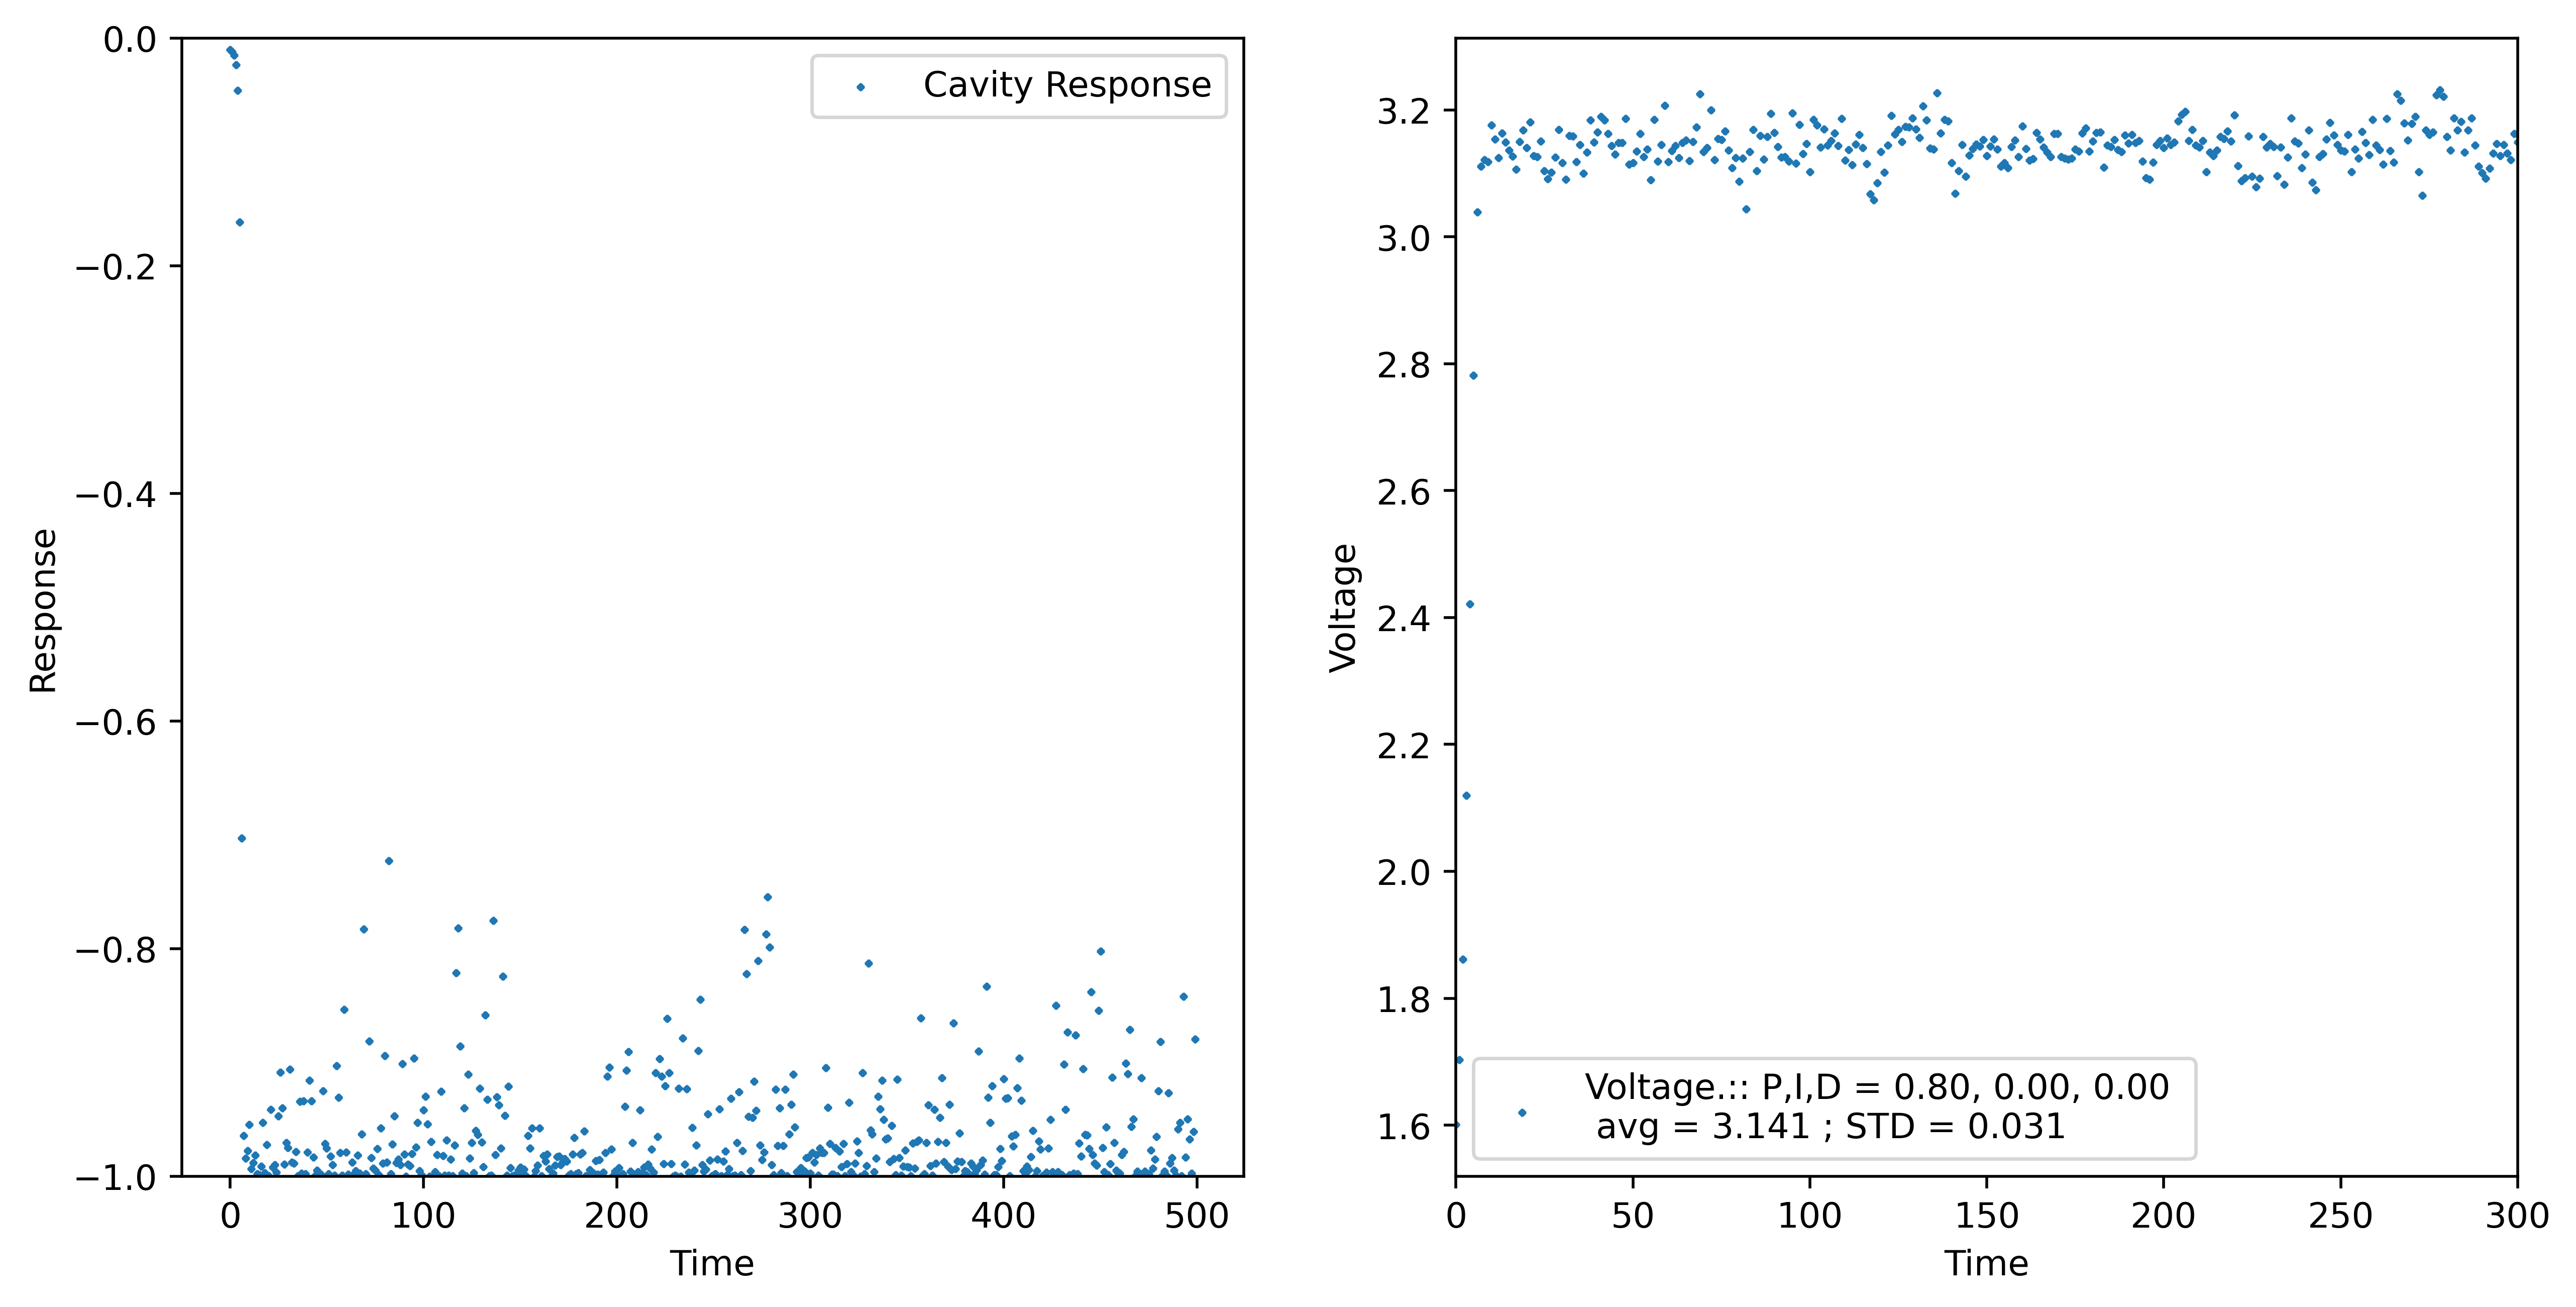

Initial x: 1.5, Initial error: 0.1051351980924146


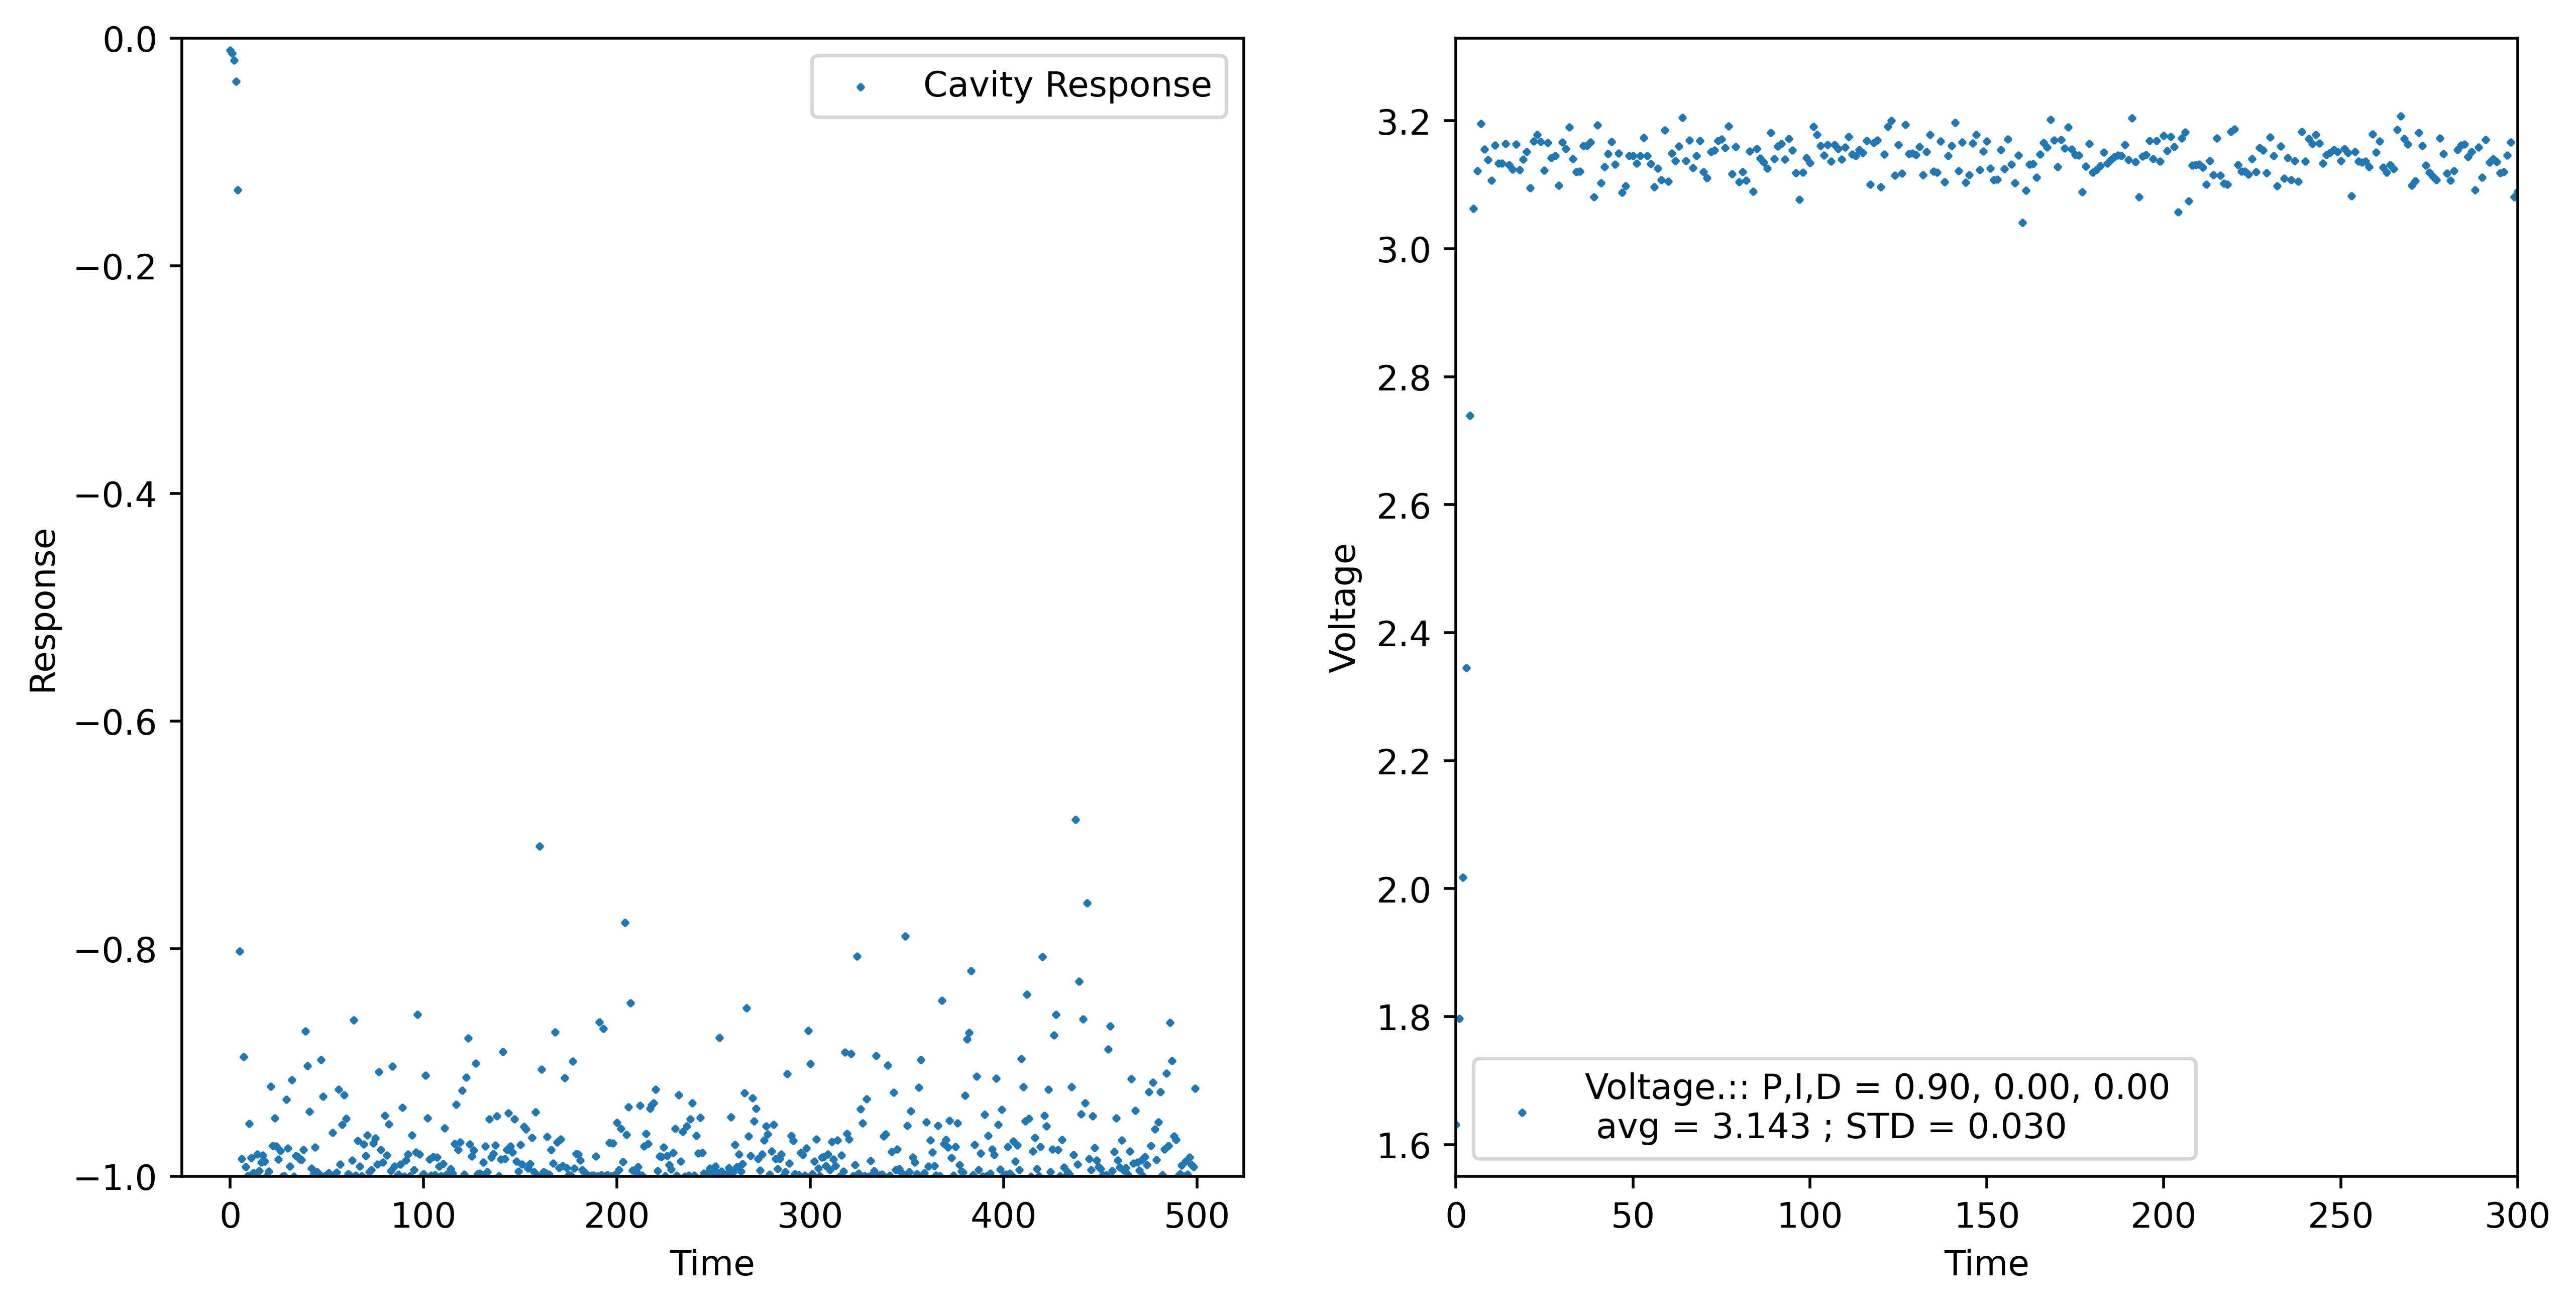

In [101]:
for i in np.arange(0,10,1):
    andrew(i*0.1)

Initial x: 1.5, Initial error: 0.1051351980924146


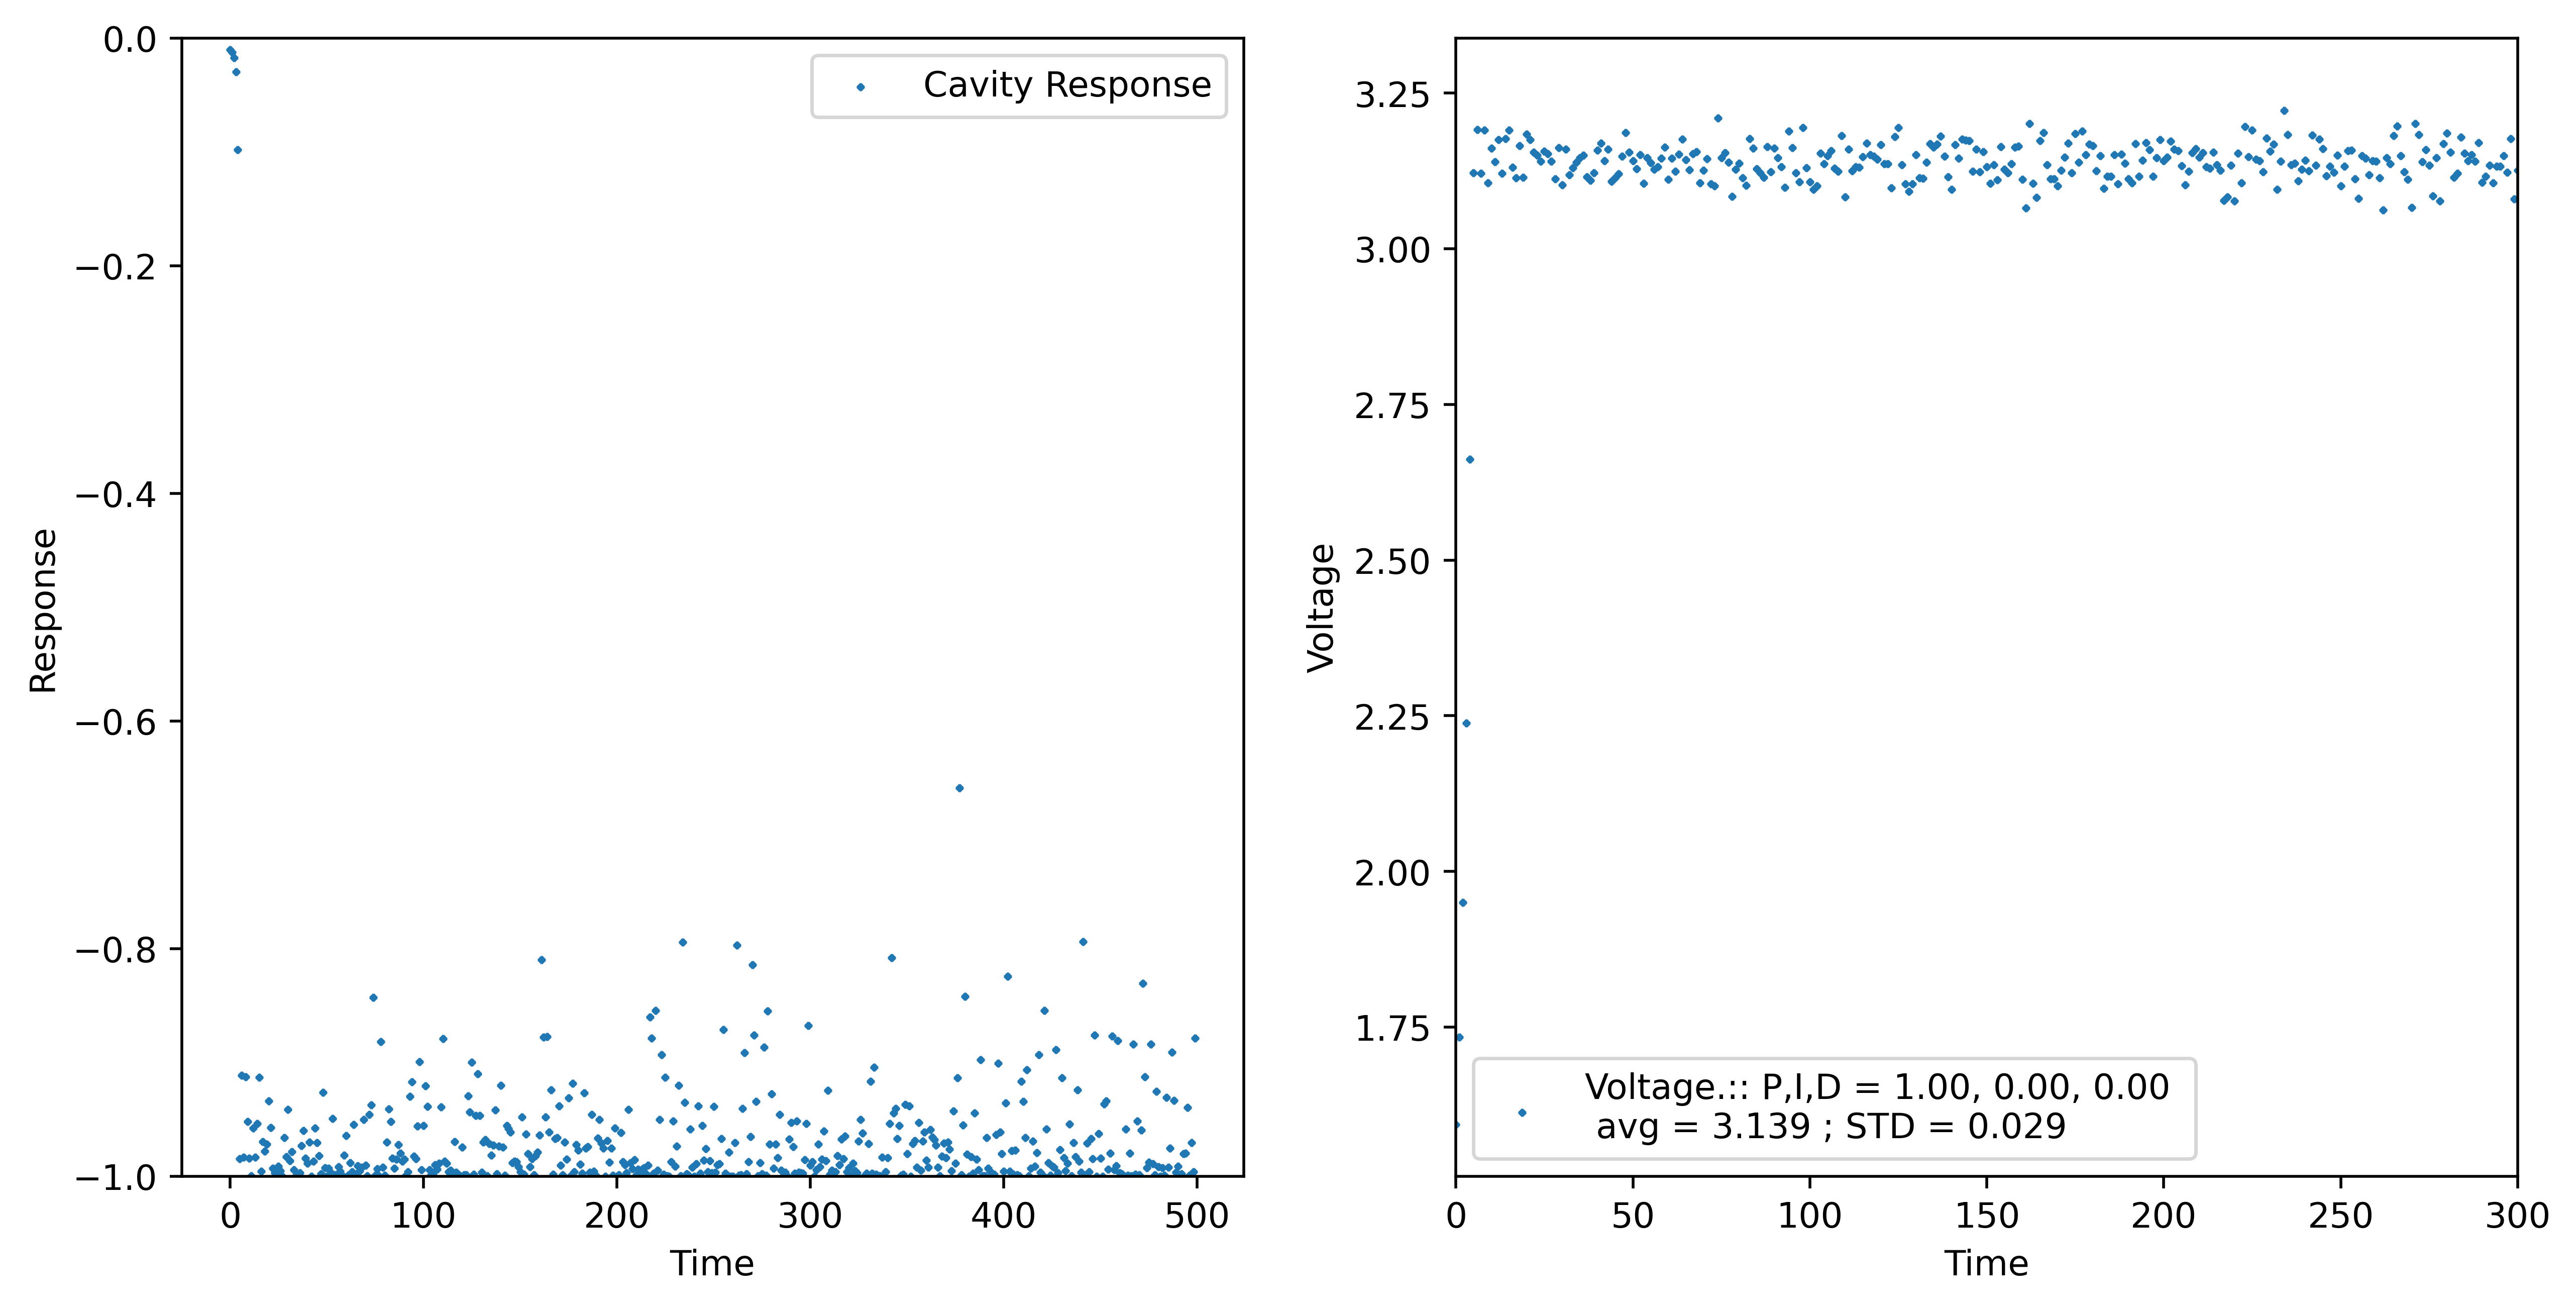

Initial x: 1.5, Initial error: 0.1051351980924146


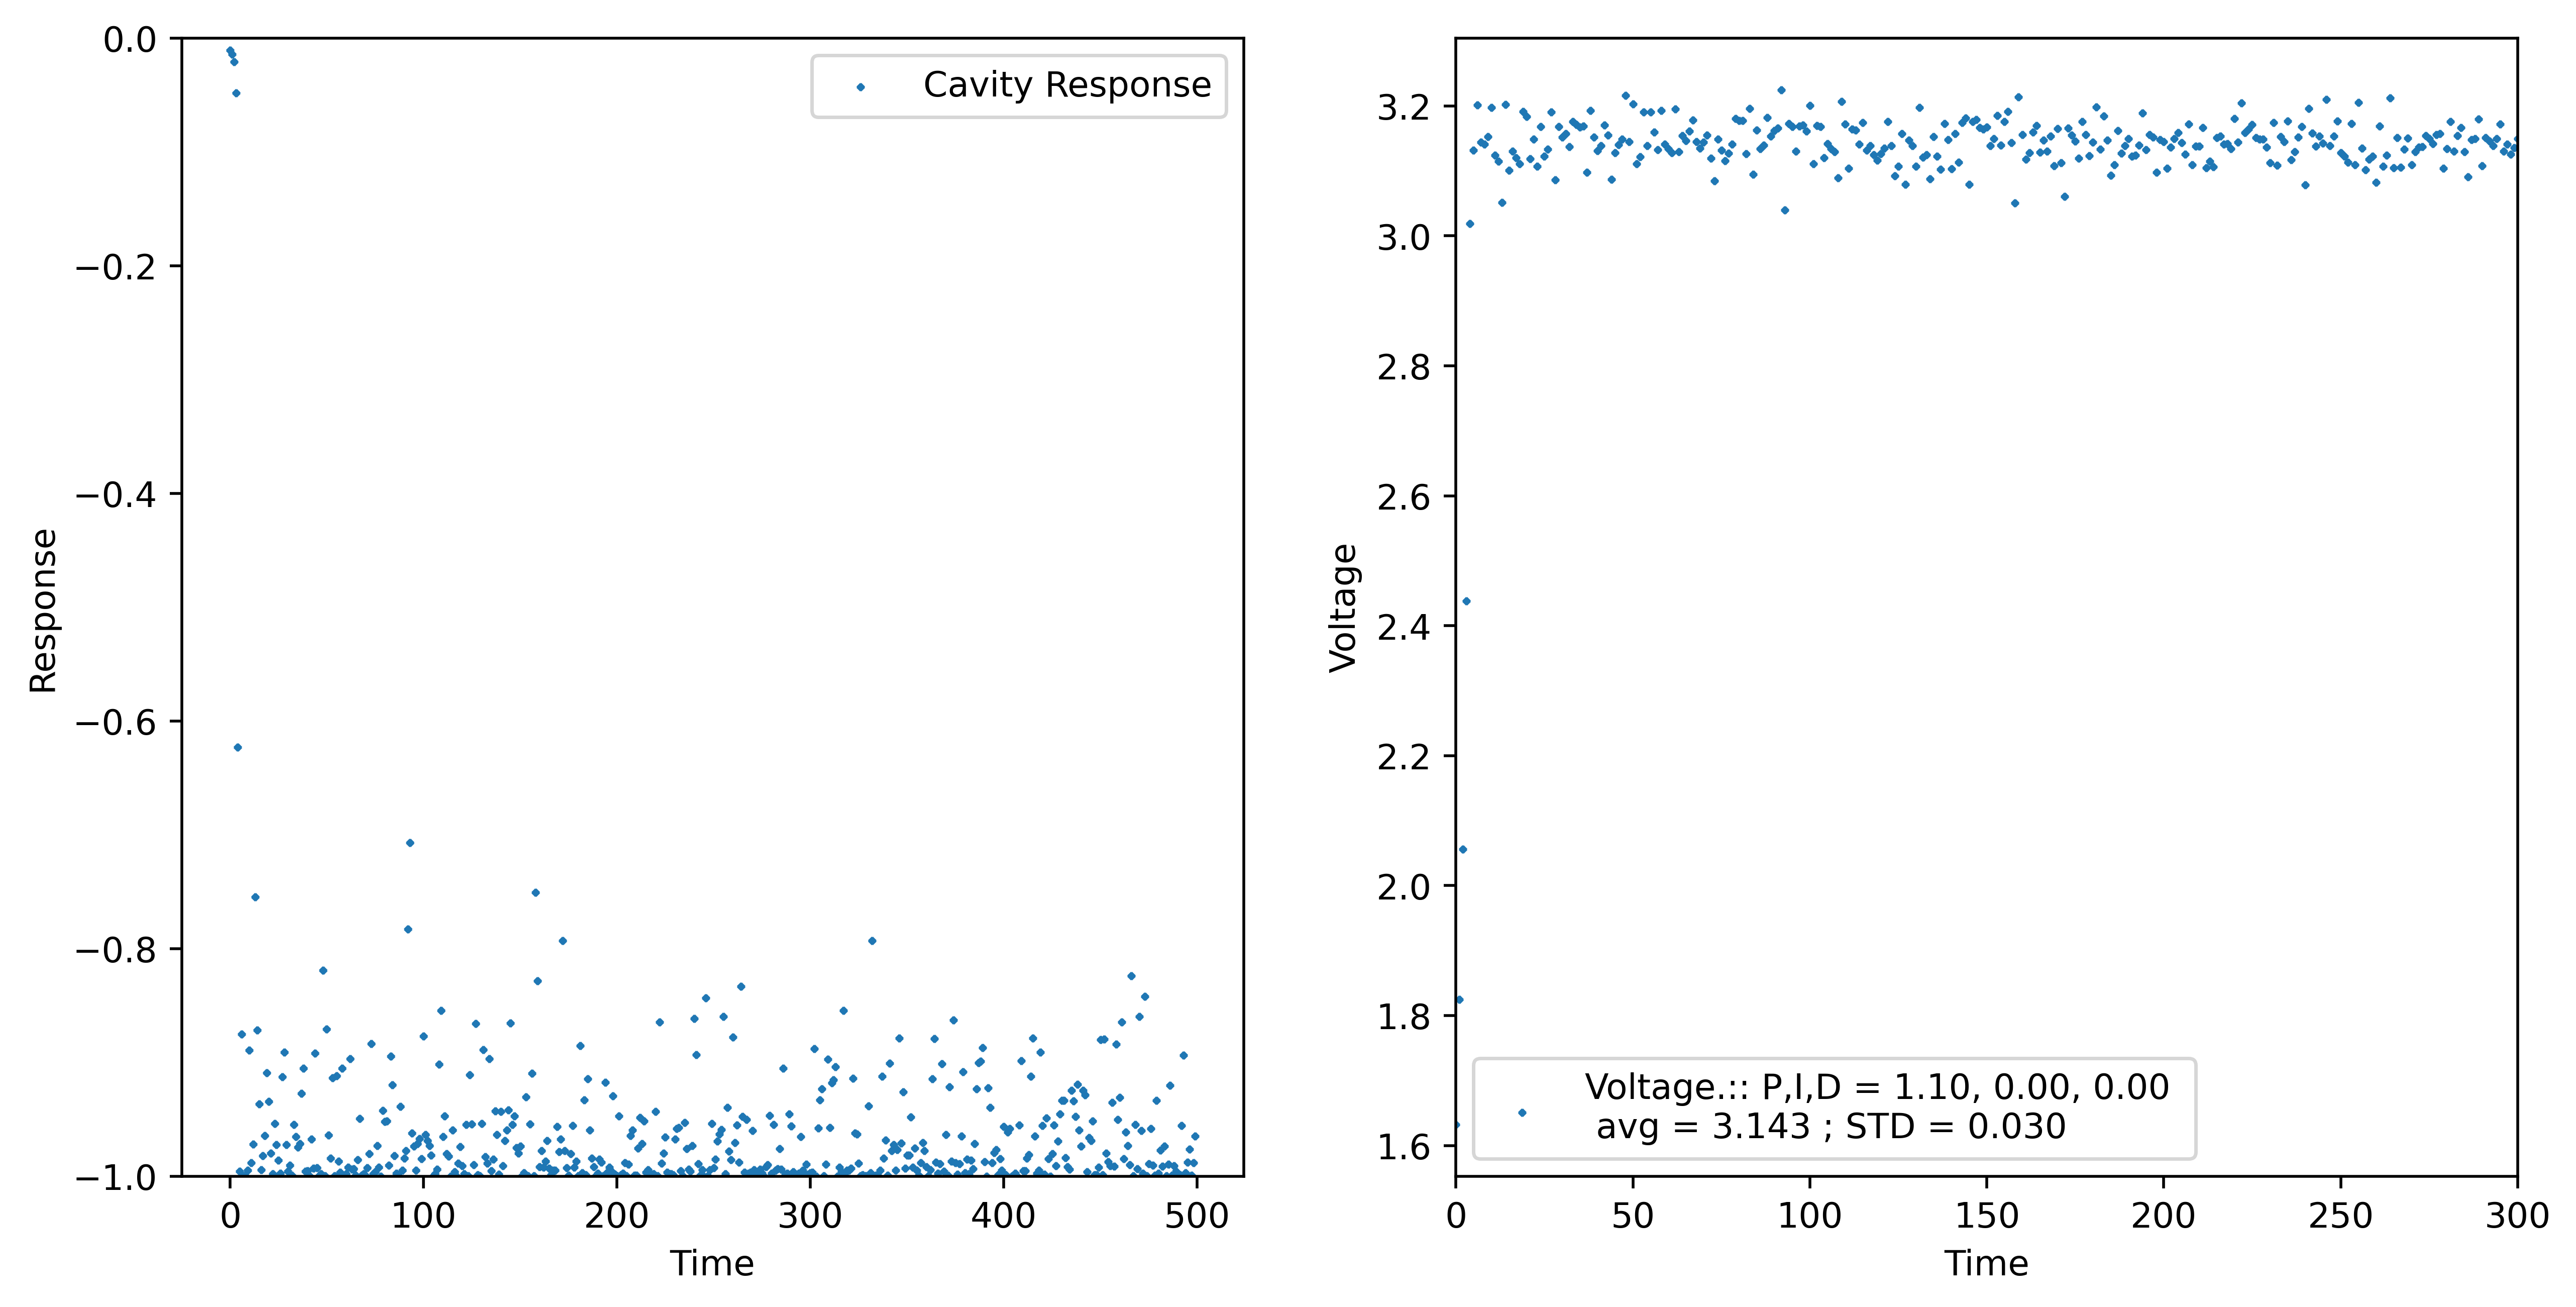

Initial x: 1.5, Initial error: 0.1051351980924146


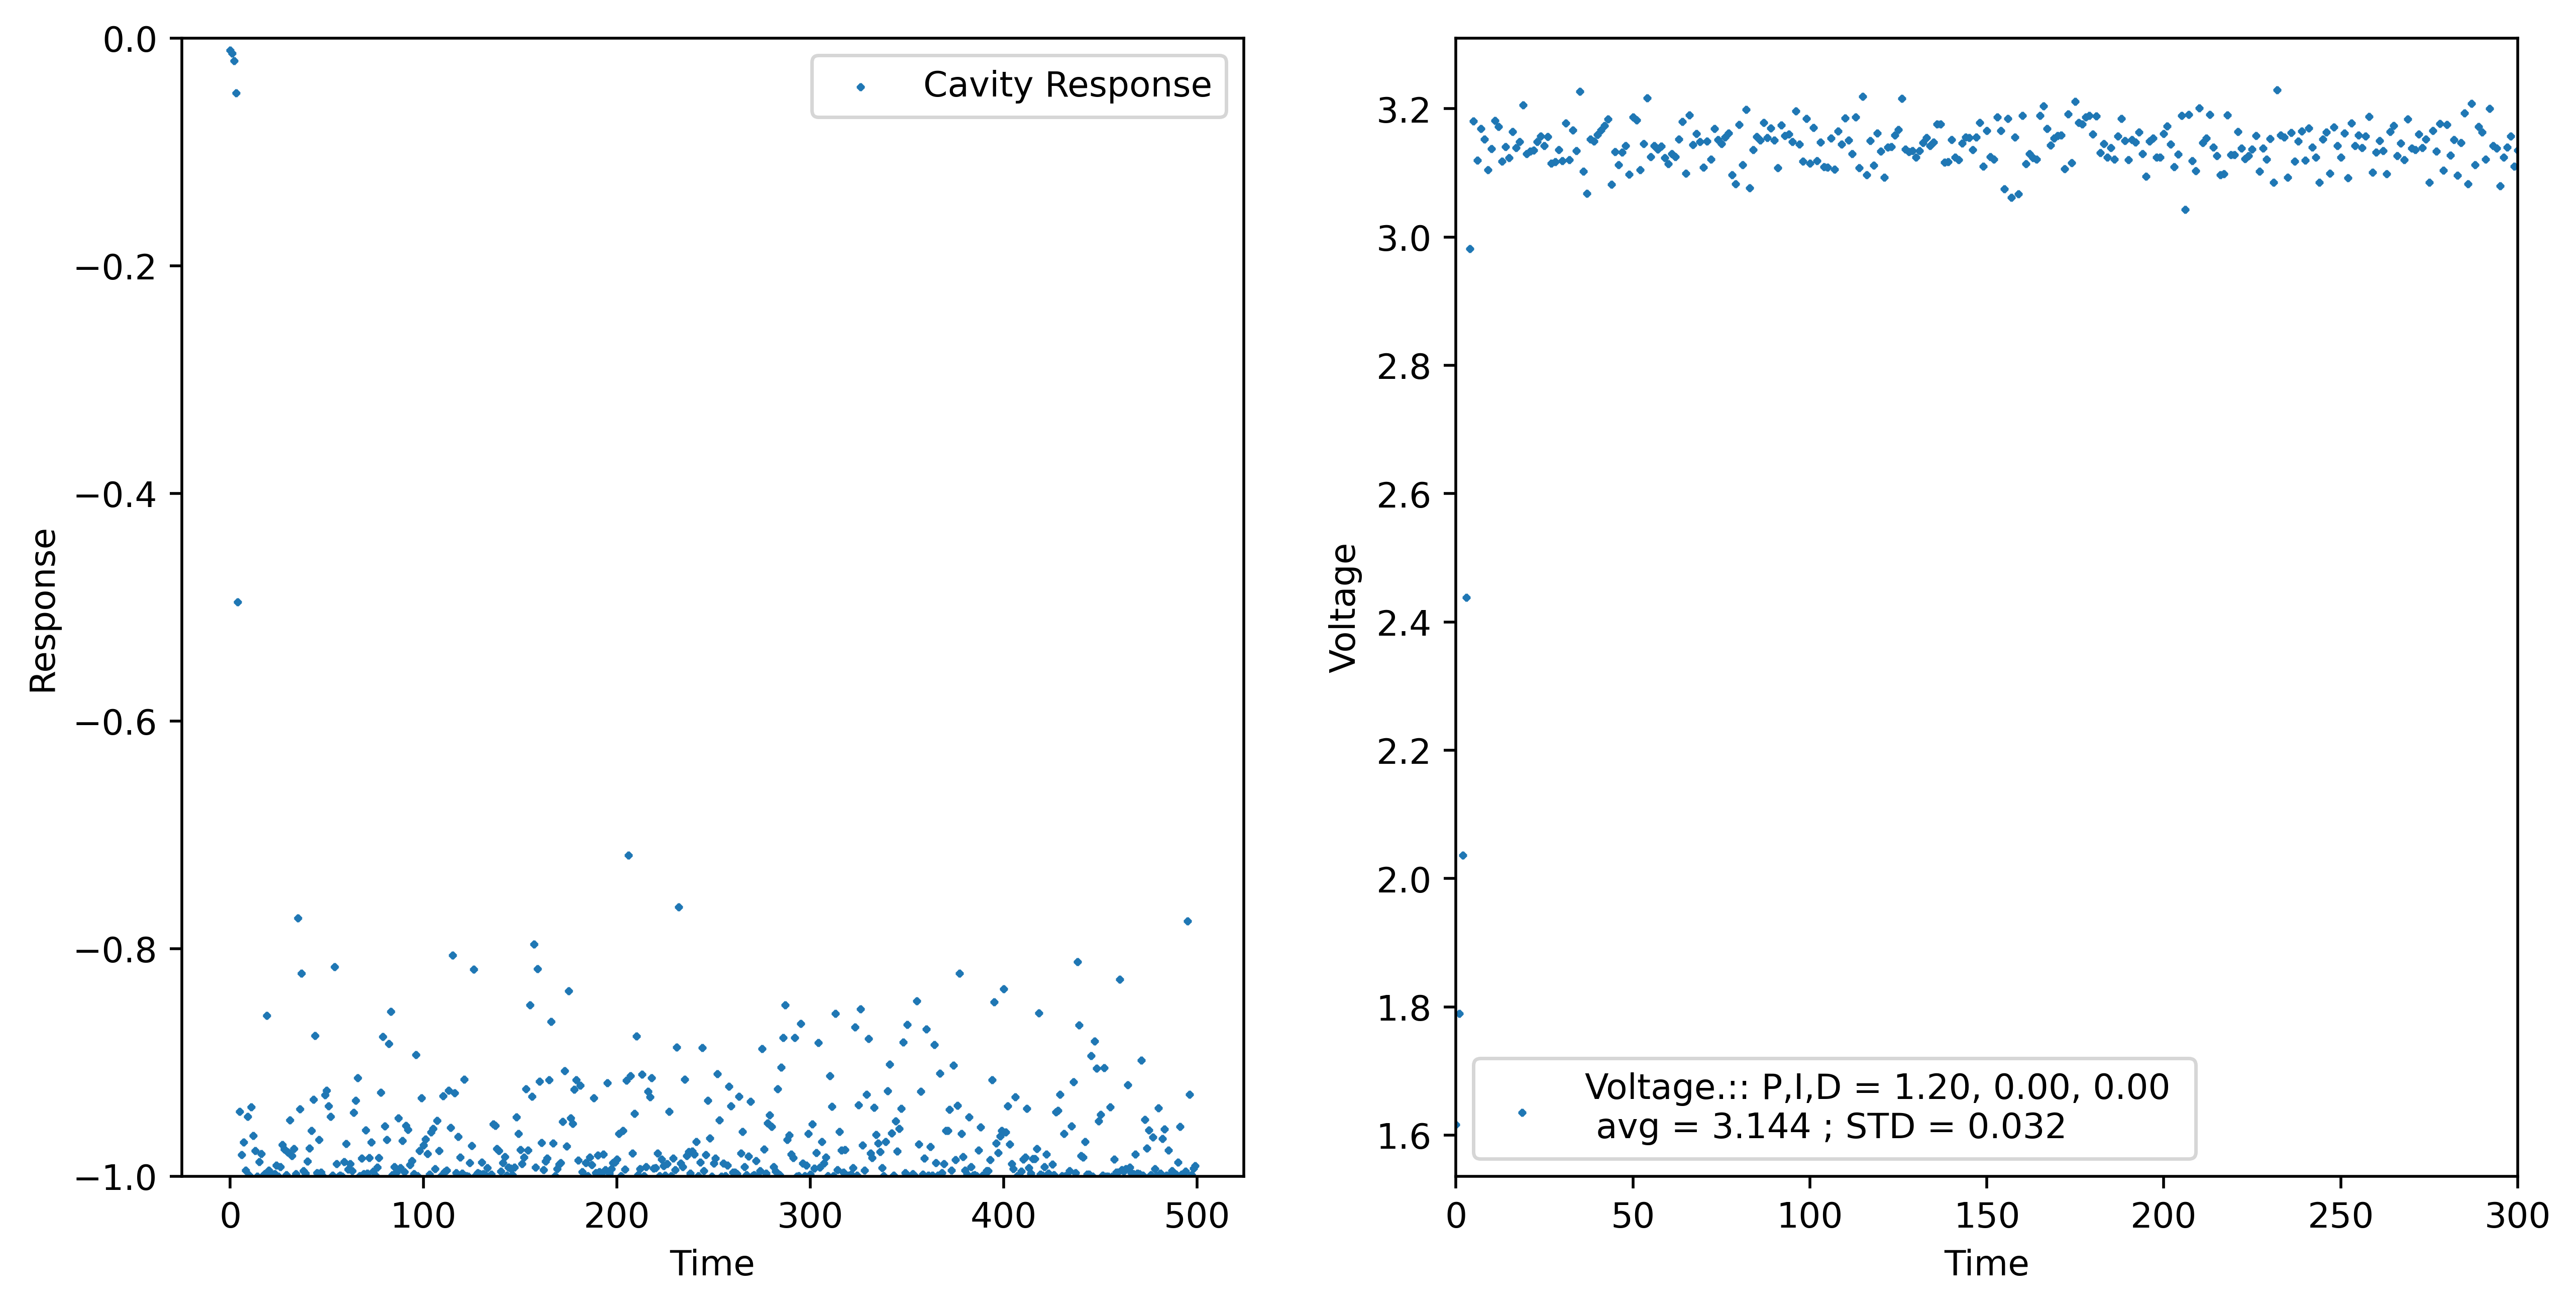

Initial x: 1.5, Initial error: 0.1051351980924146


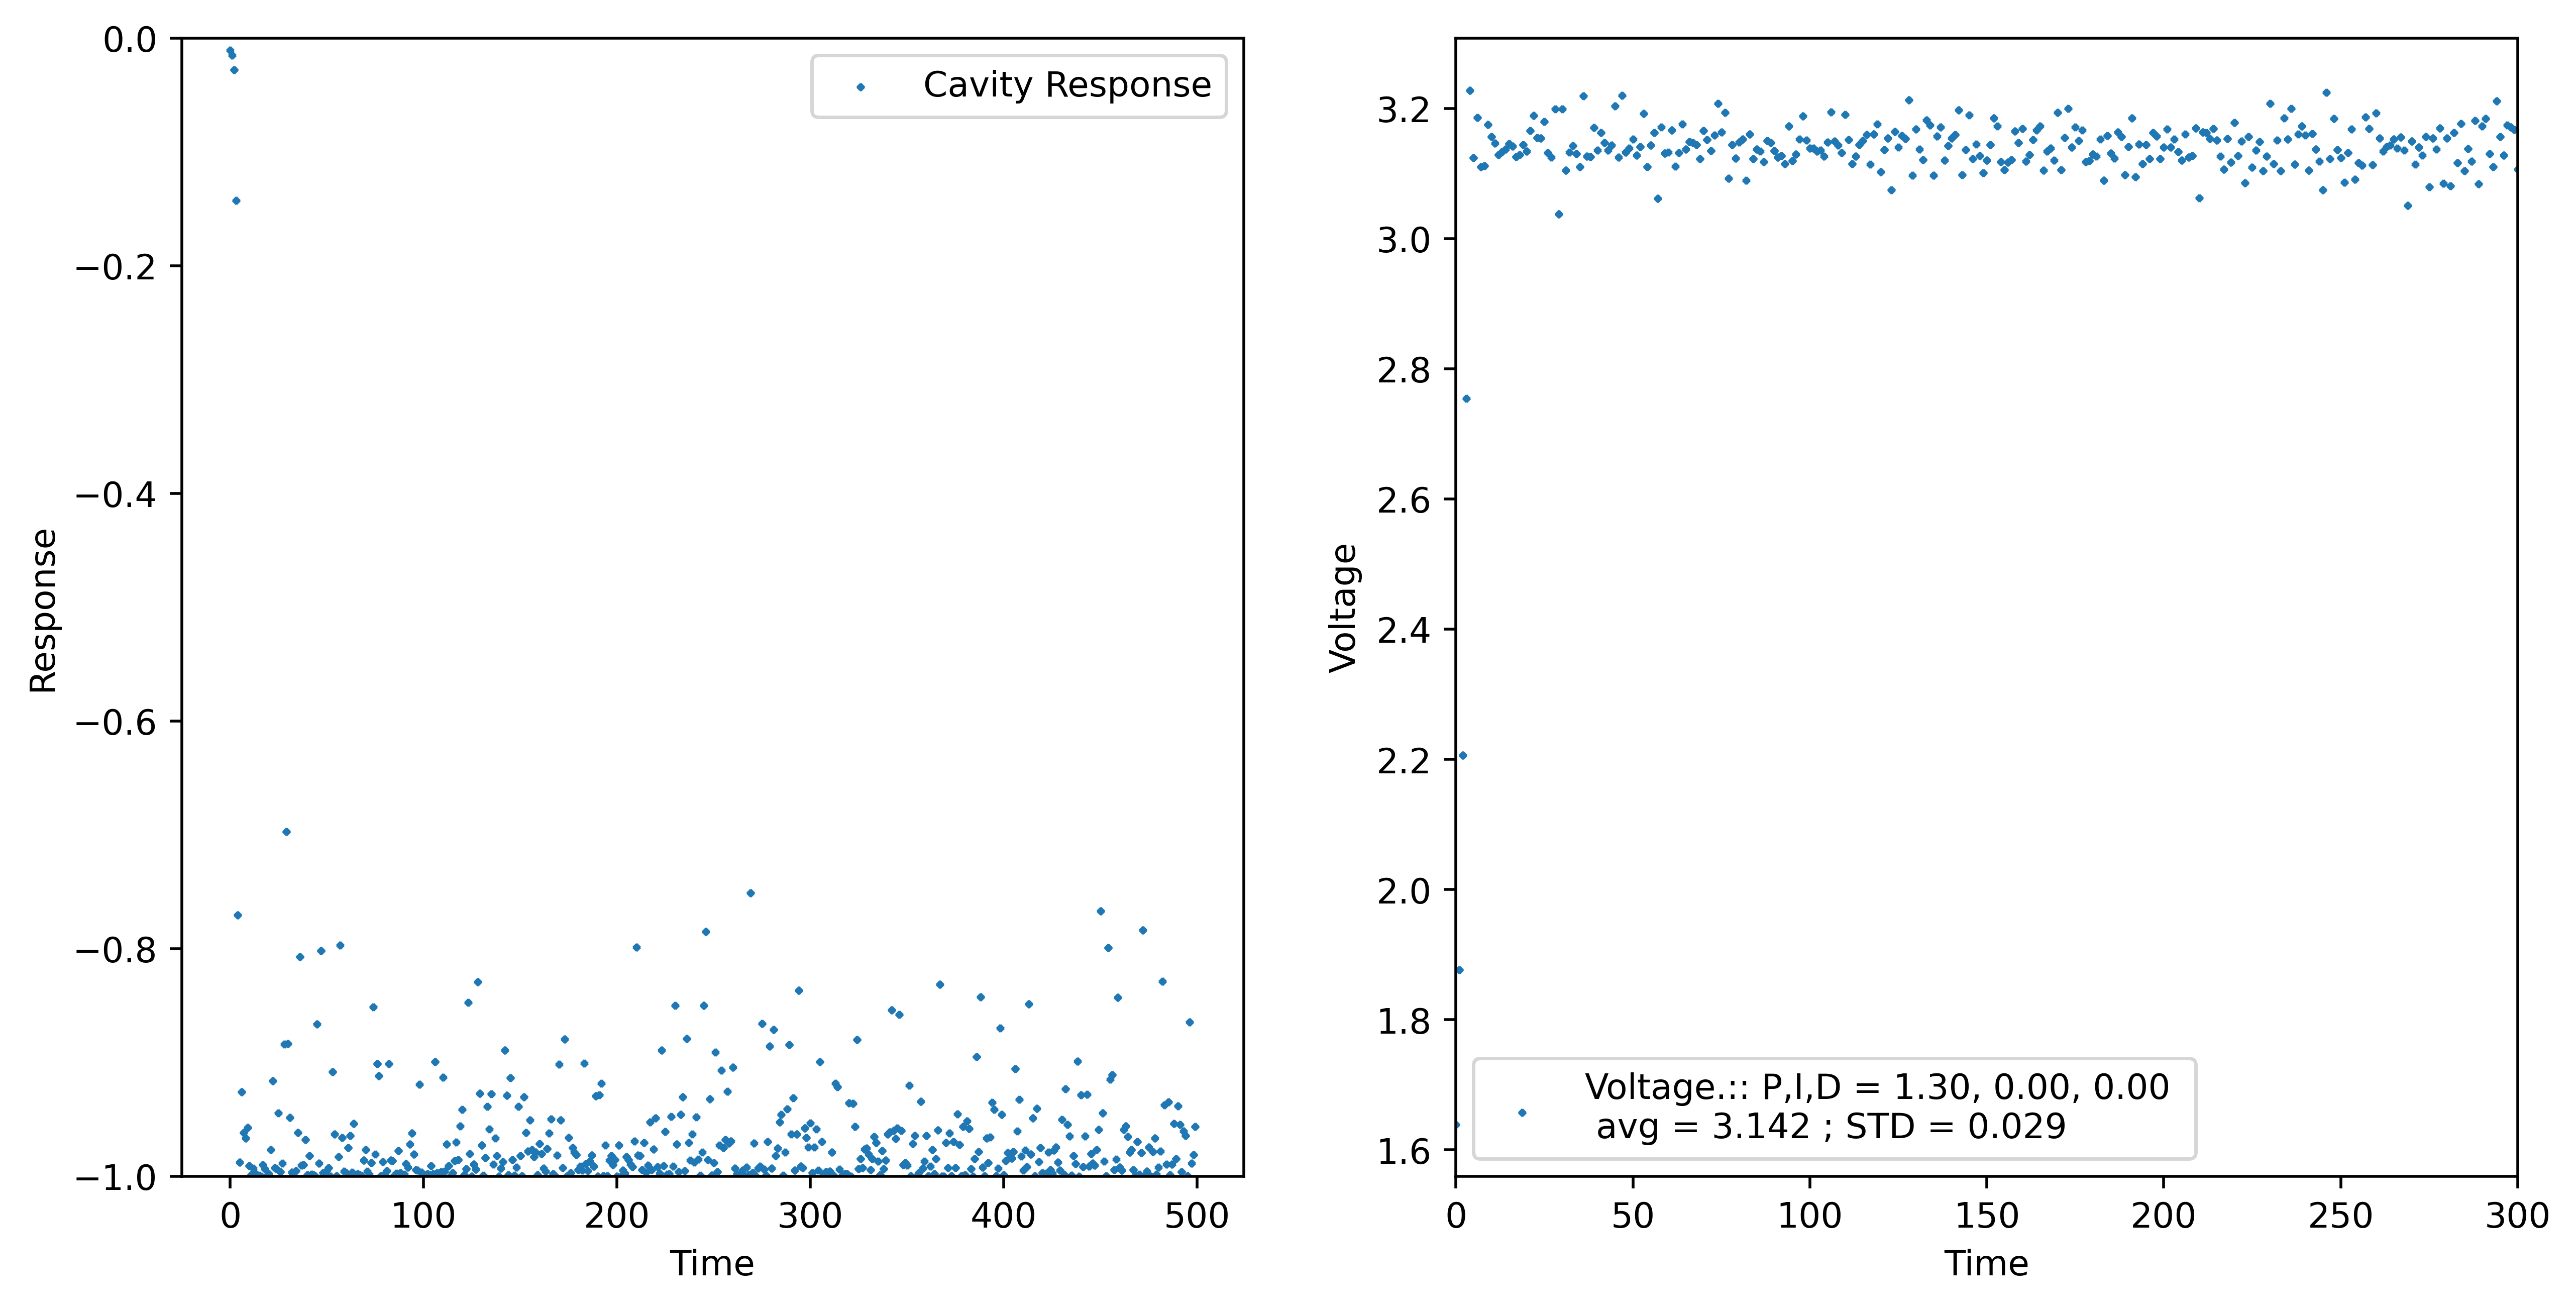

Initial x: 1.5, Initial error: 0.1051351980924146


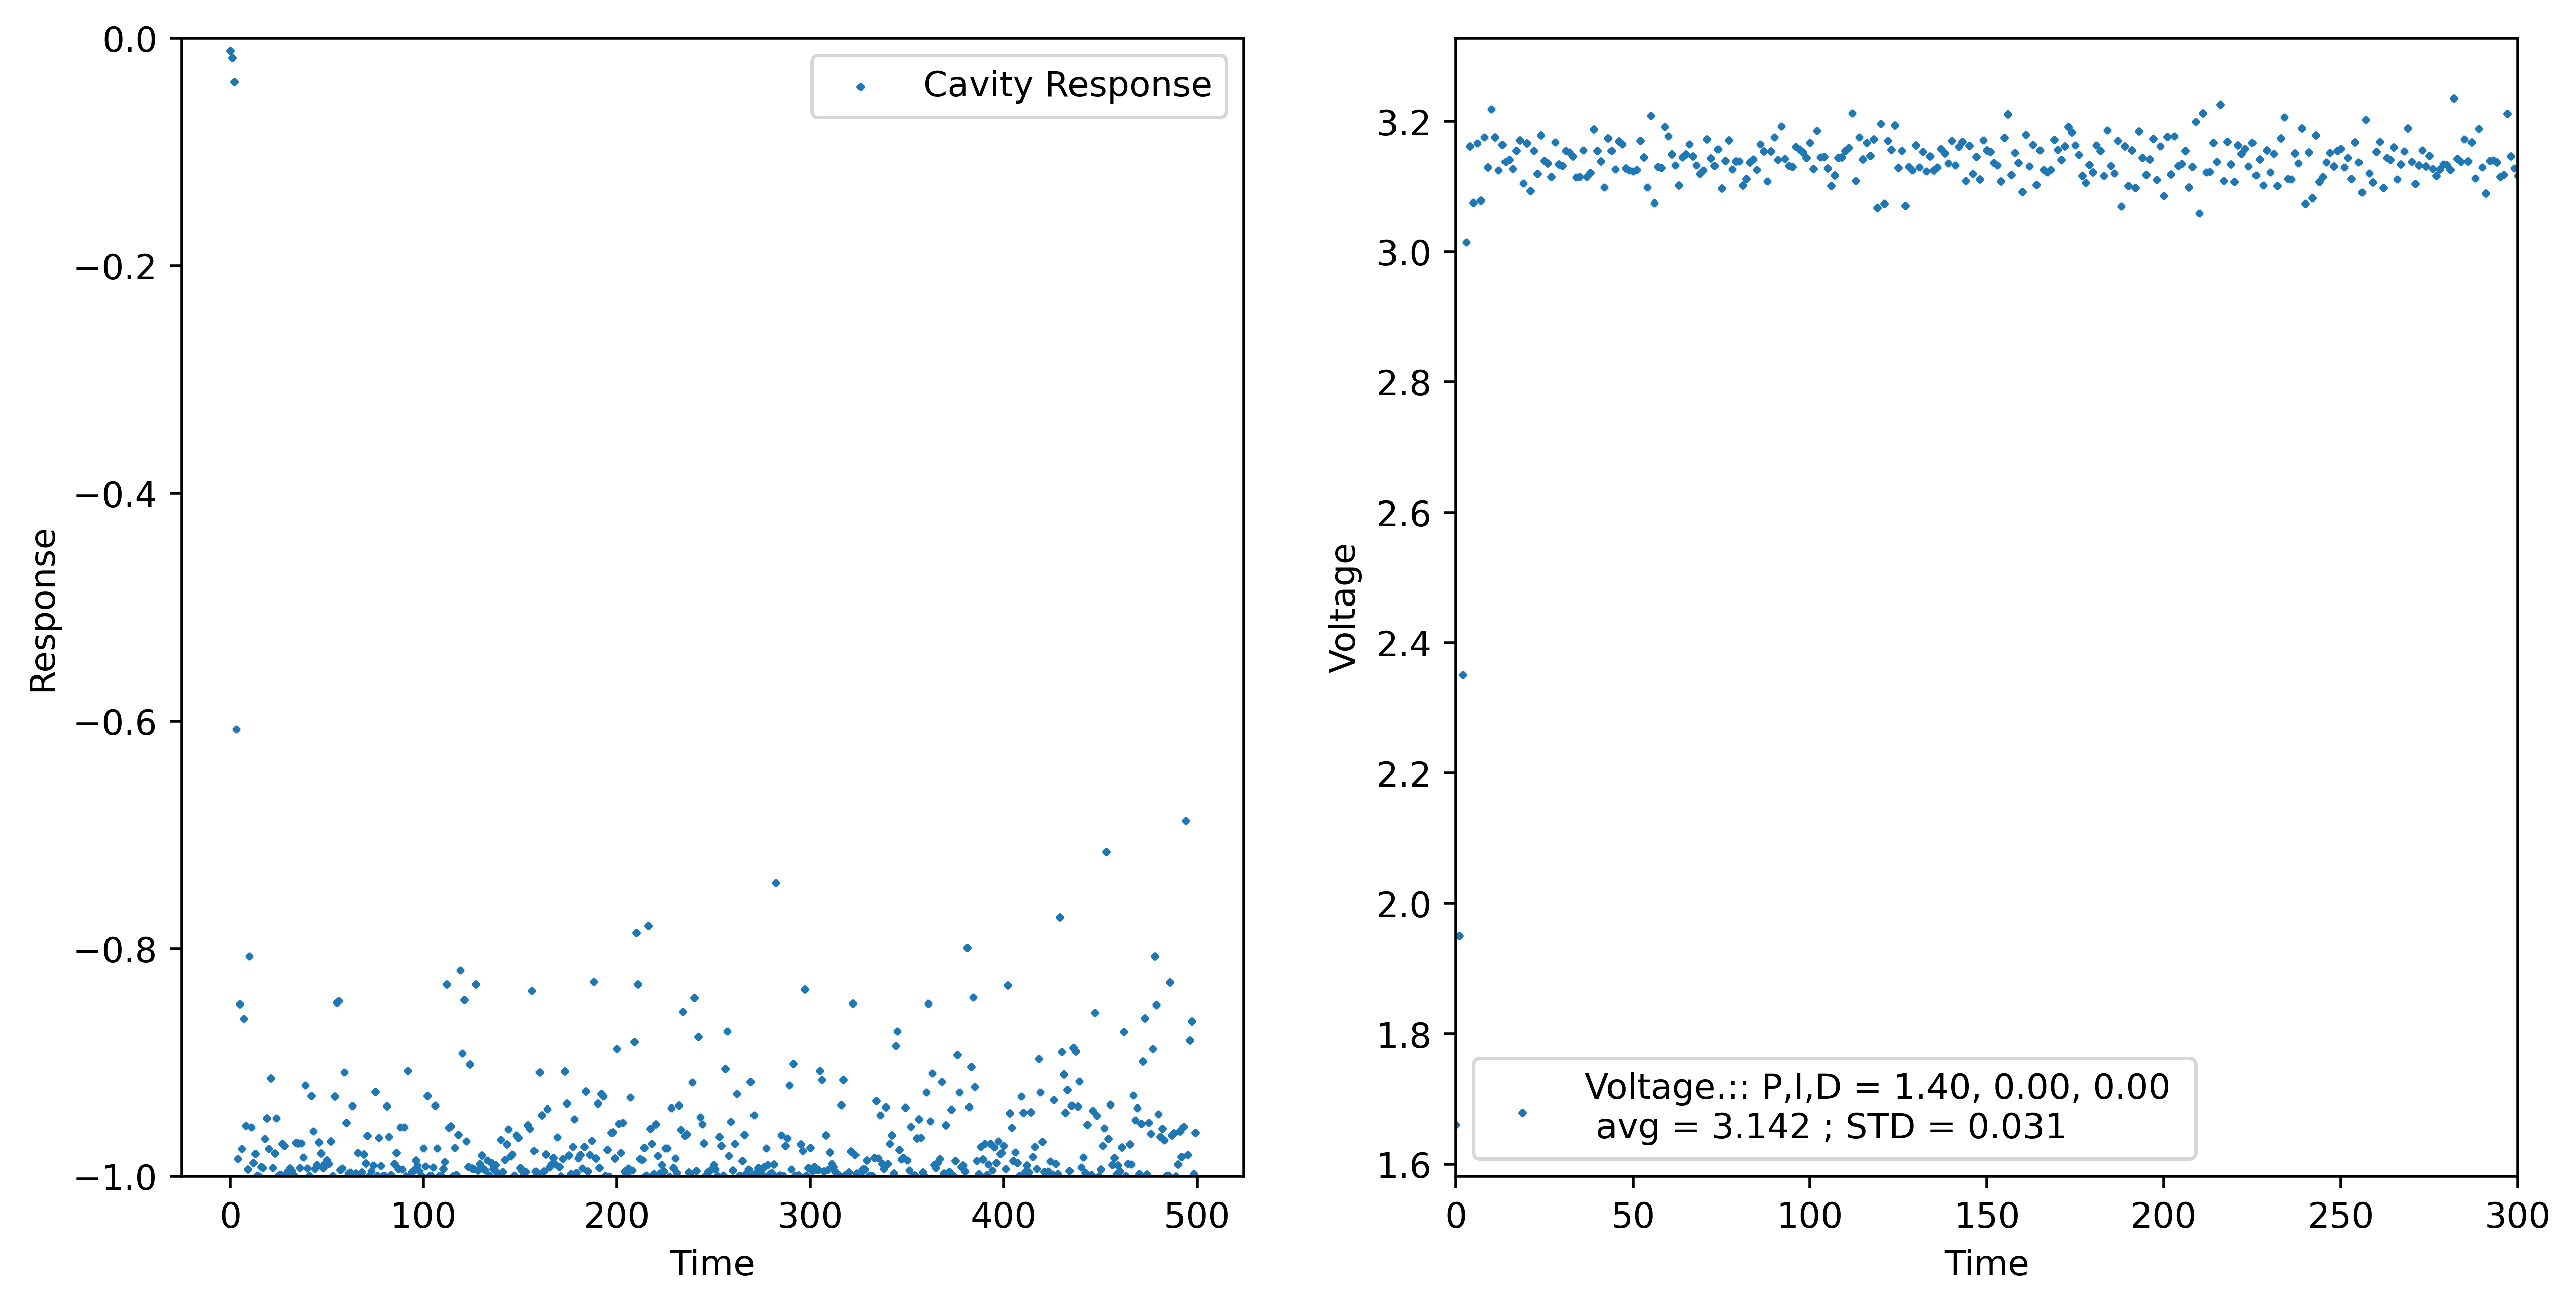

Initial x: 1.5, Initial error: 0.1051351980924146


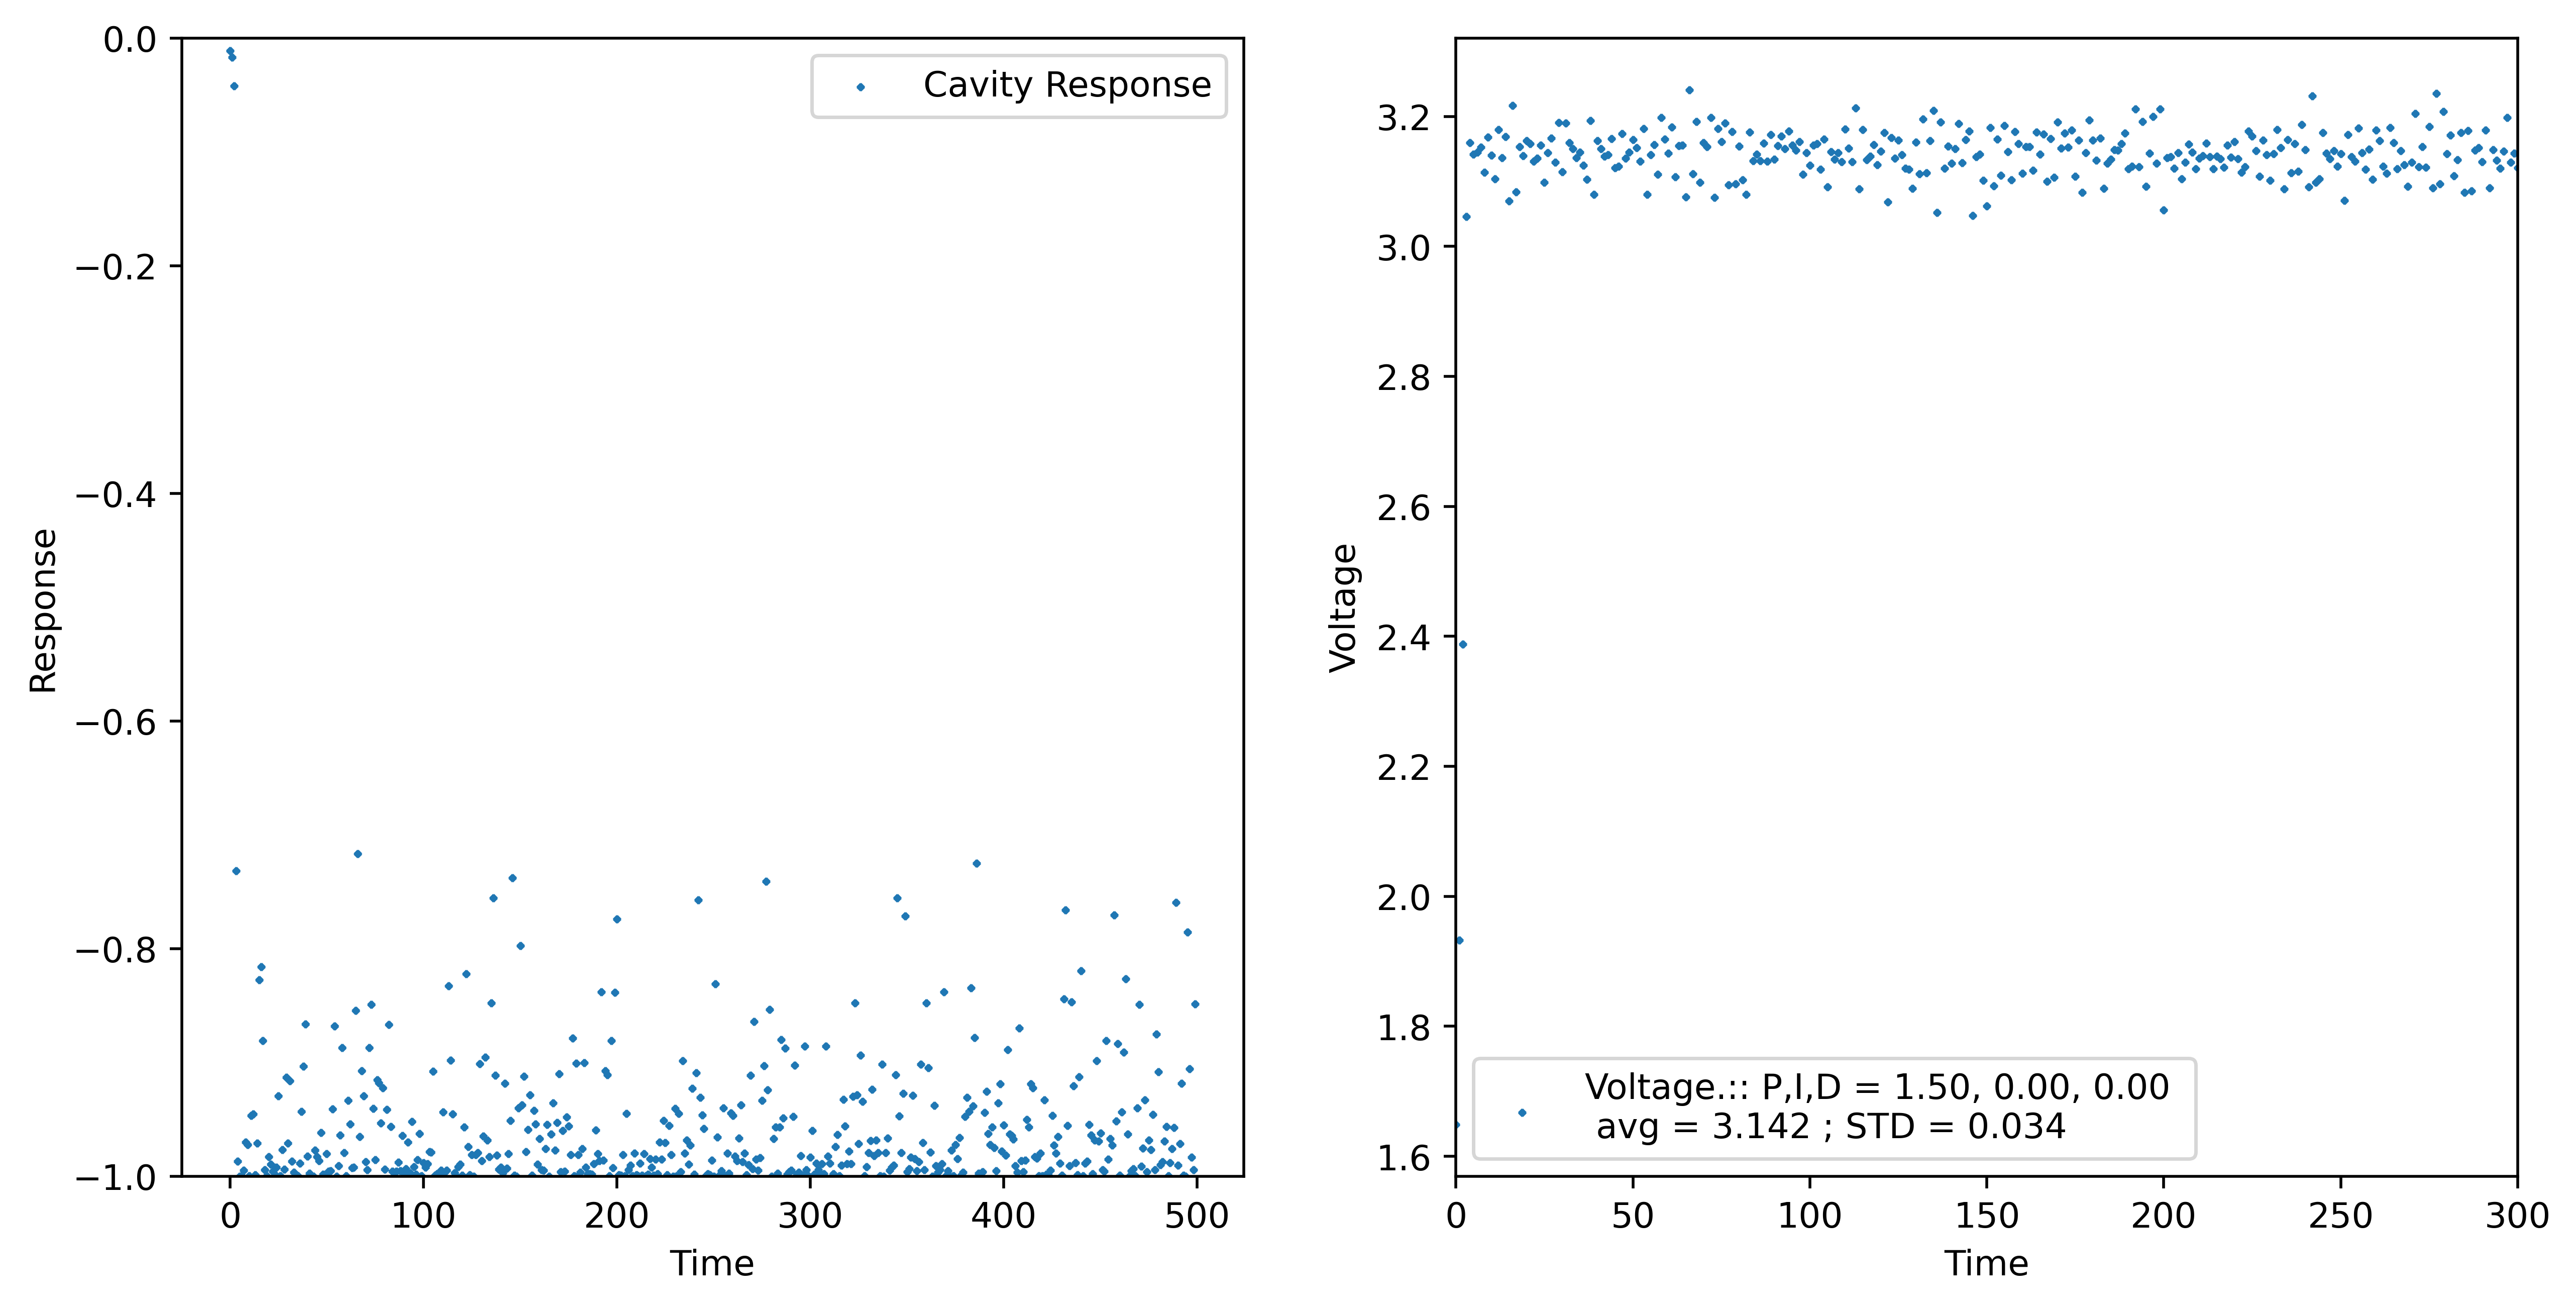

Initial x: 1.5, Initial error: 0.1051351980924146


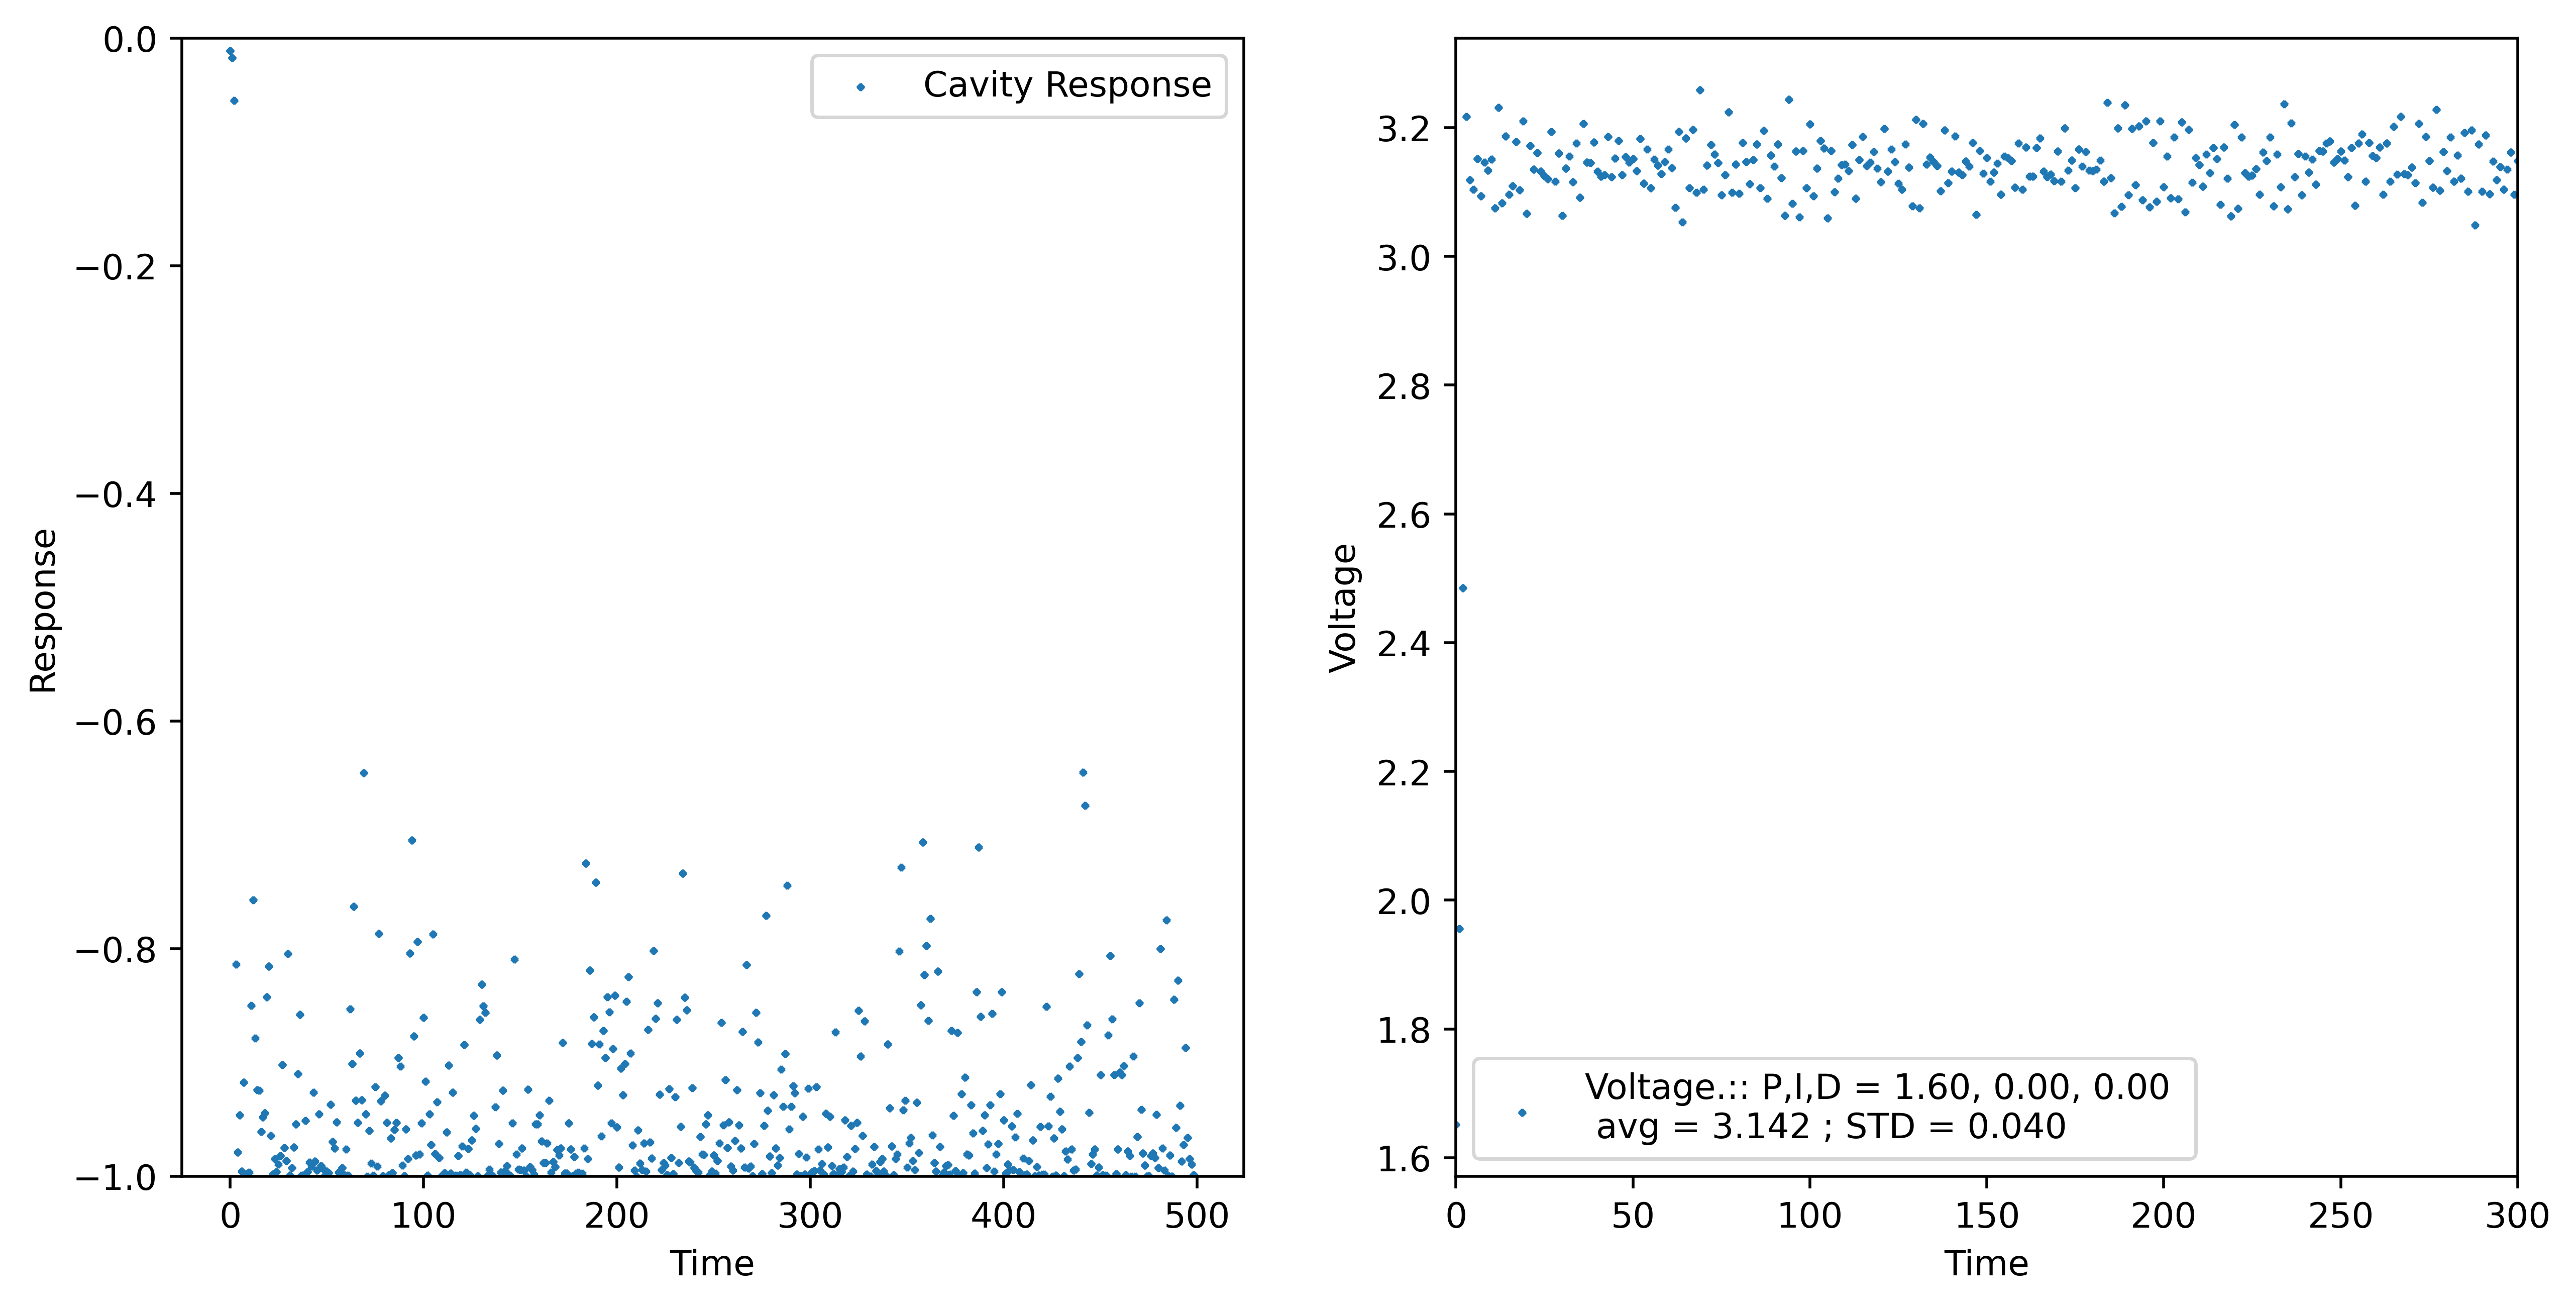

Initial x: 1.5, Initial error: 0.1051351980924146


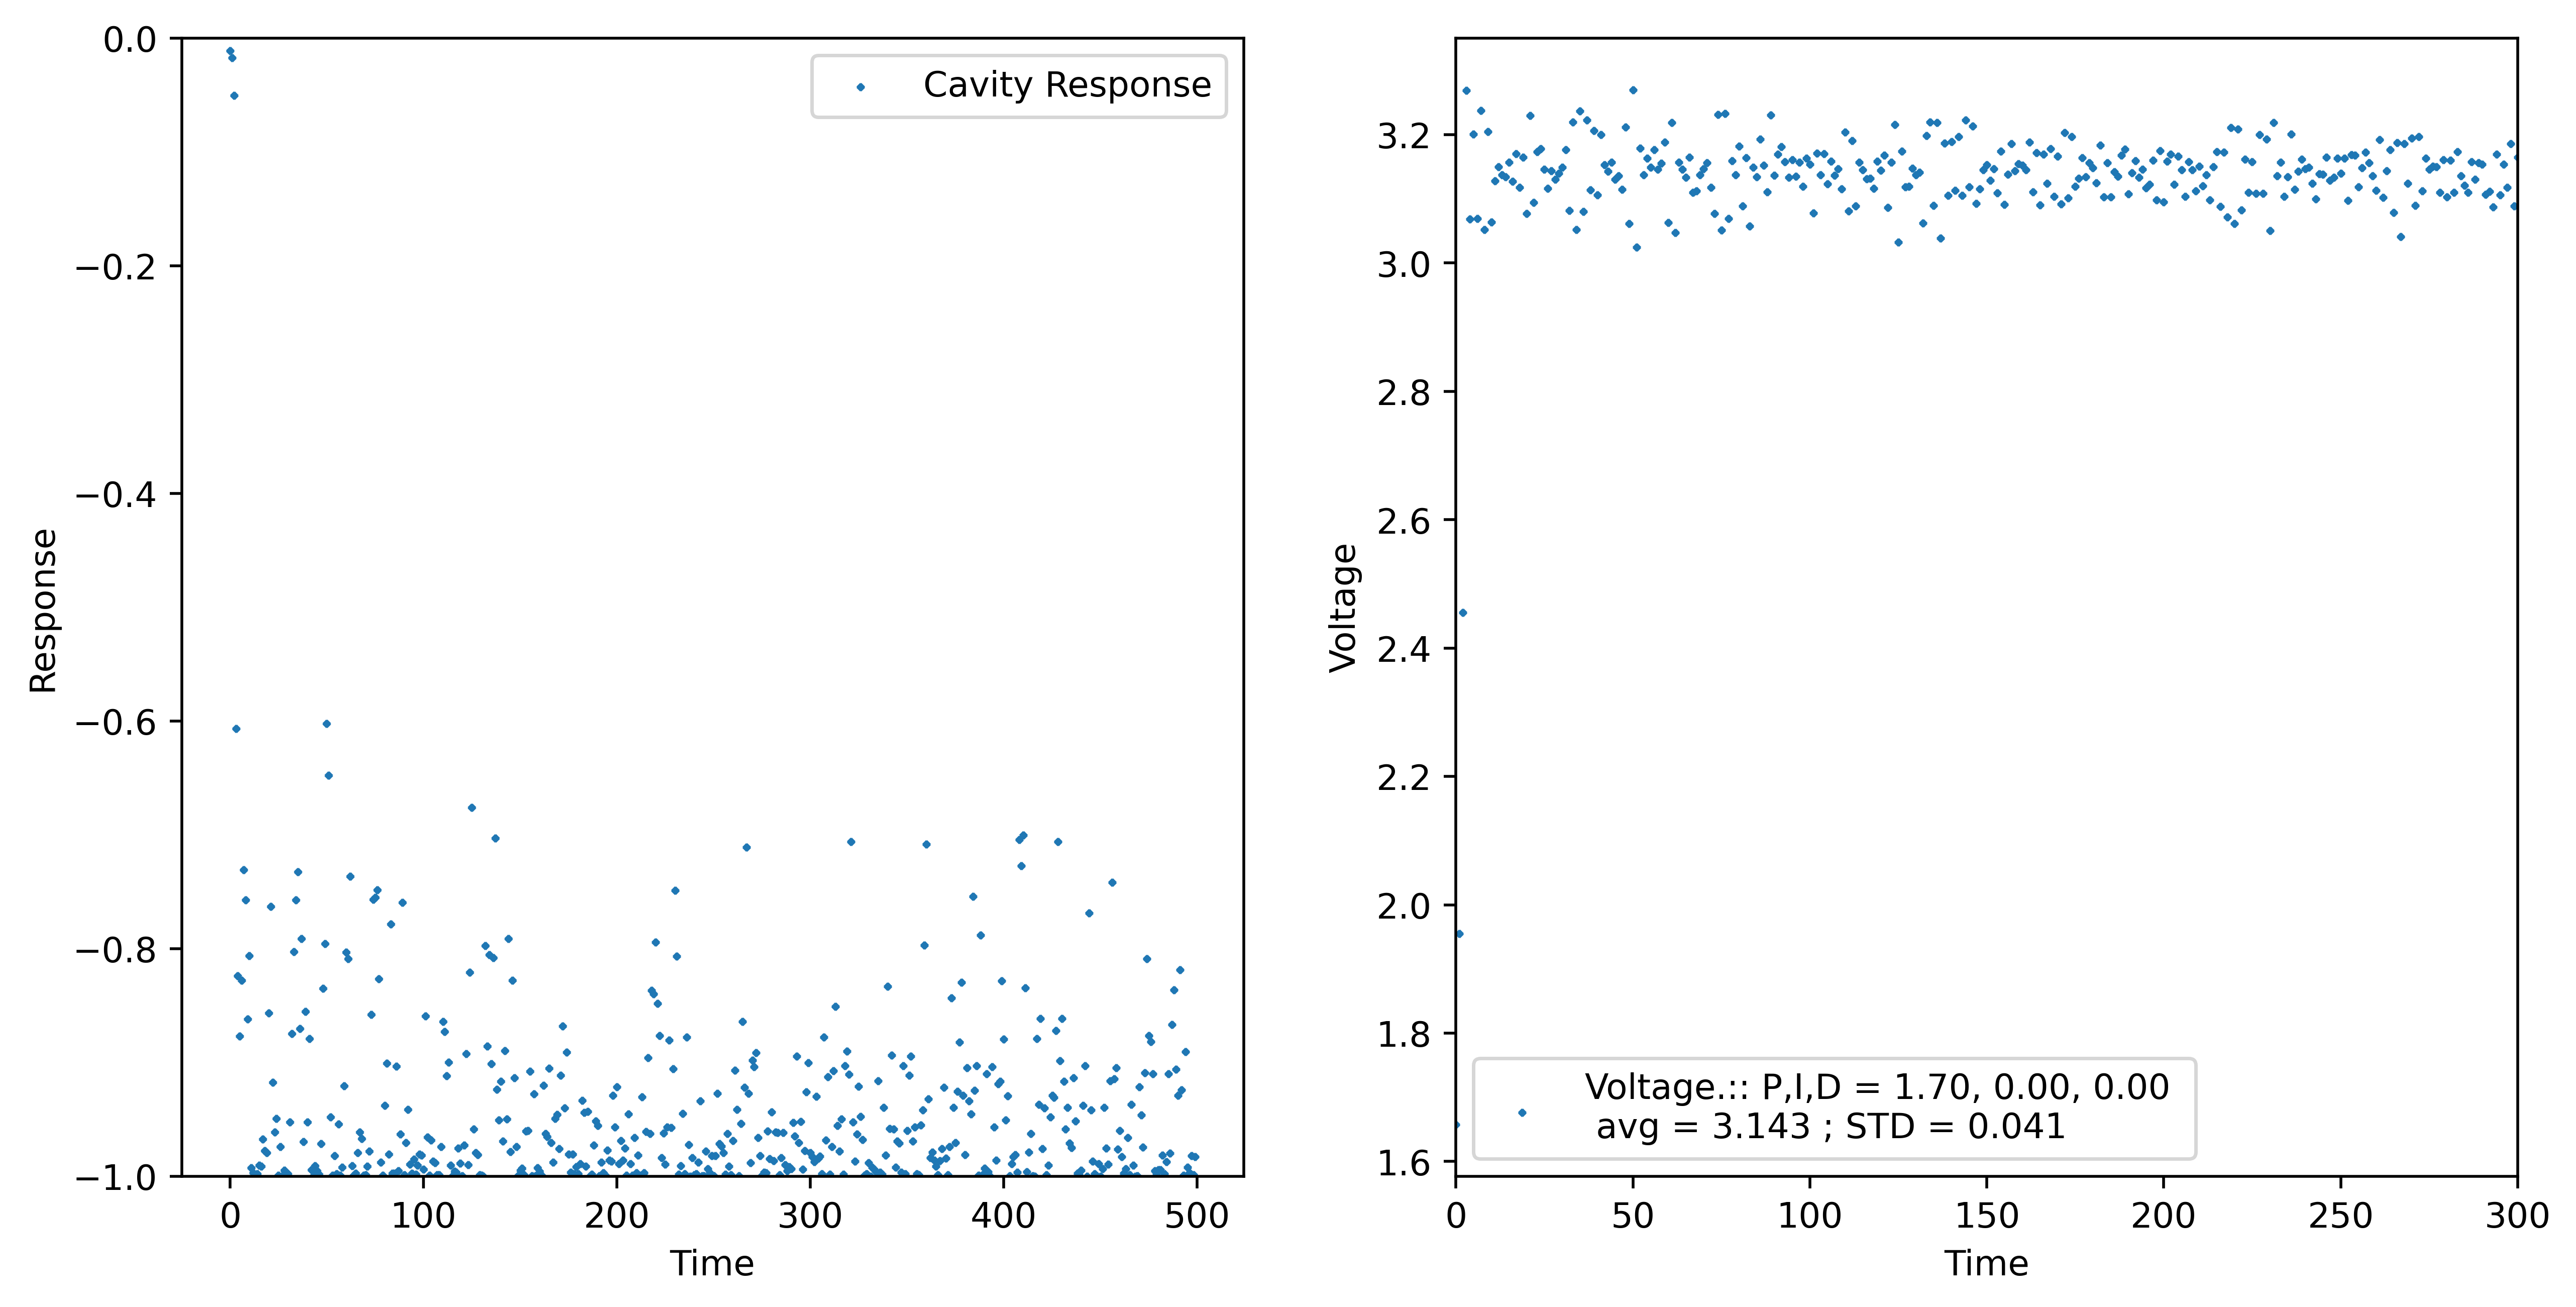

Initial x: 1.5, Initial error: 0.1051351980924146


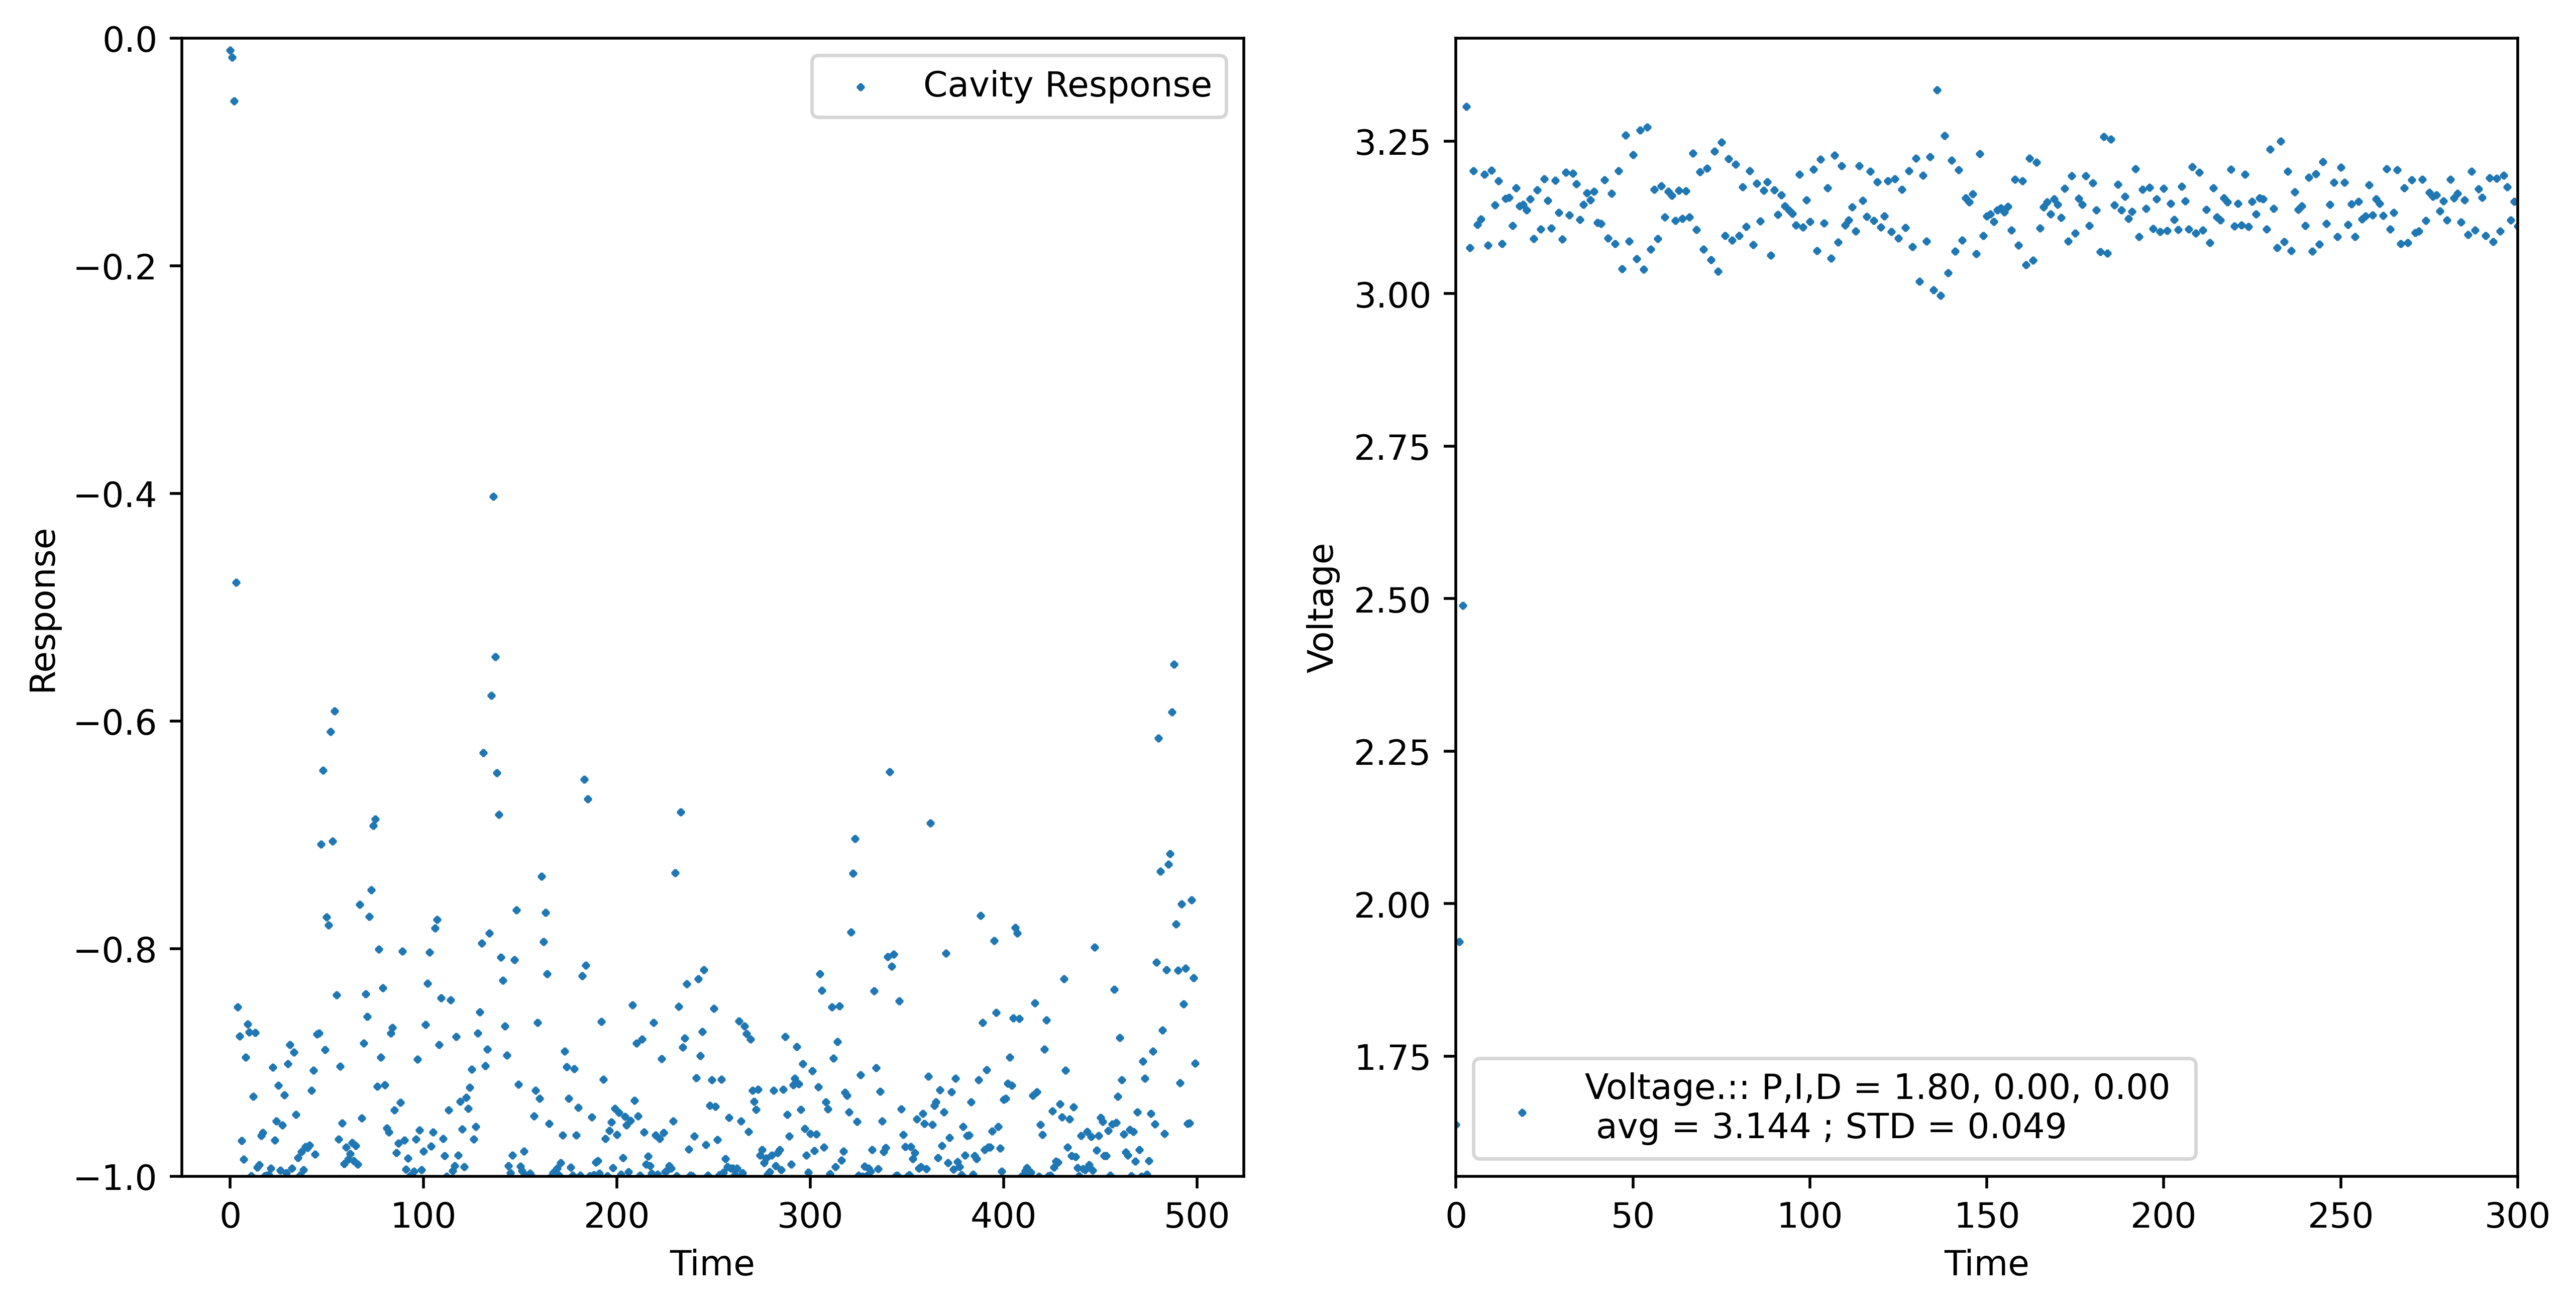

Initial x: 1.5, Initial error: 0.1051351980924146


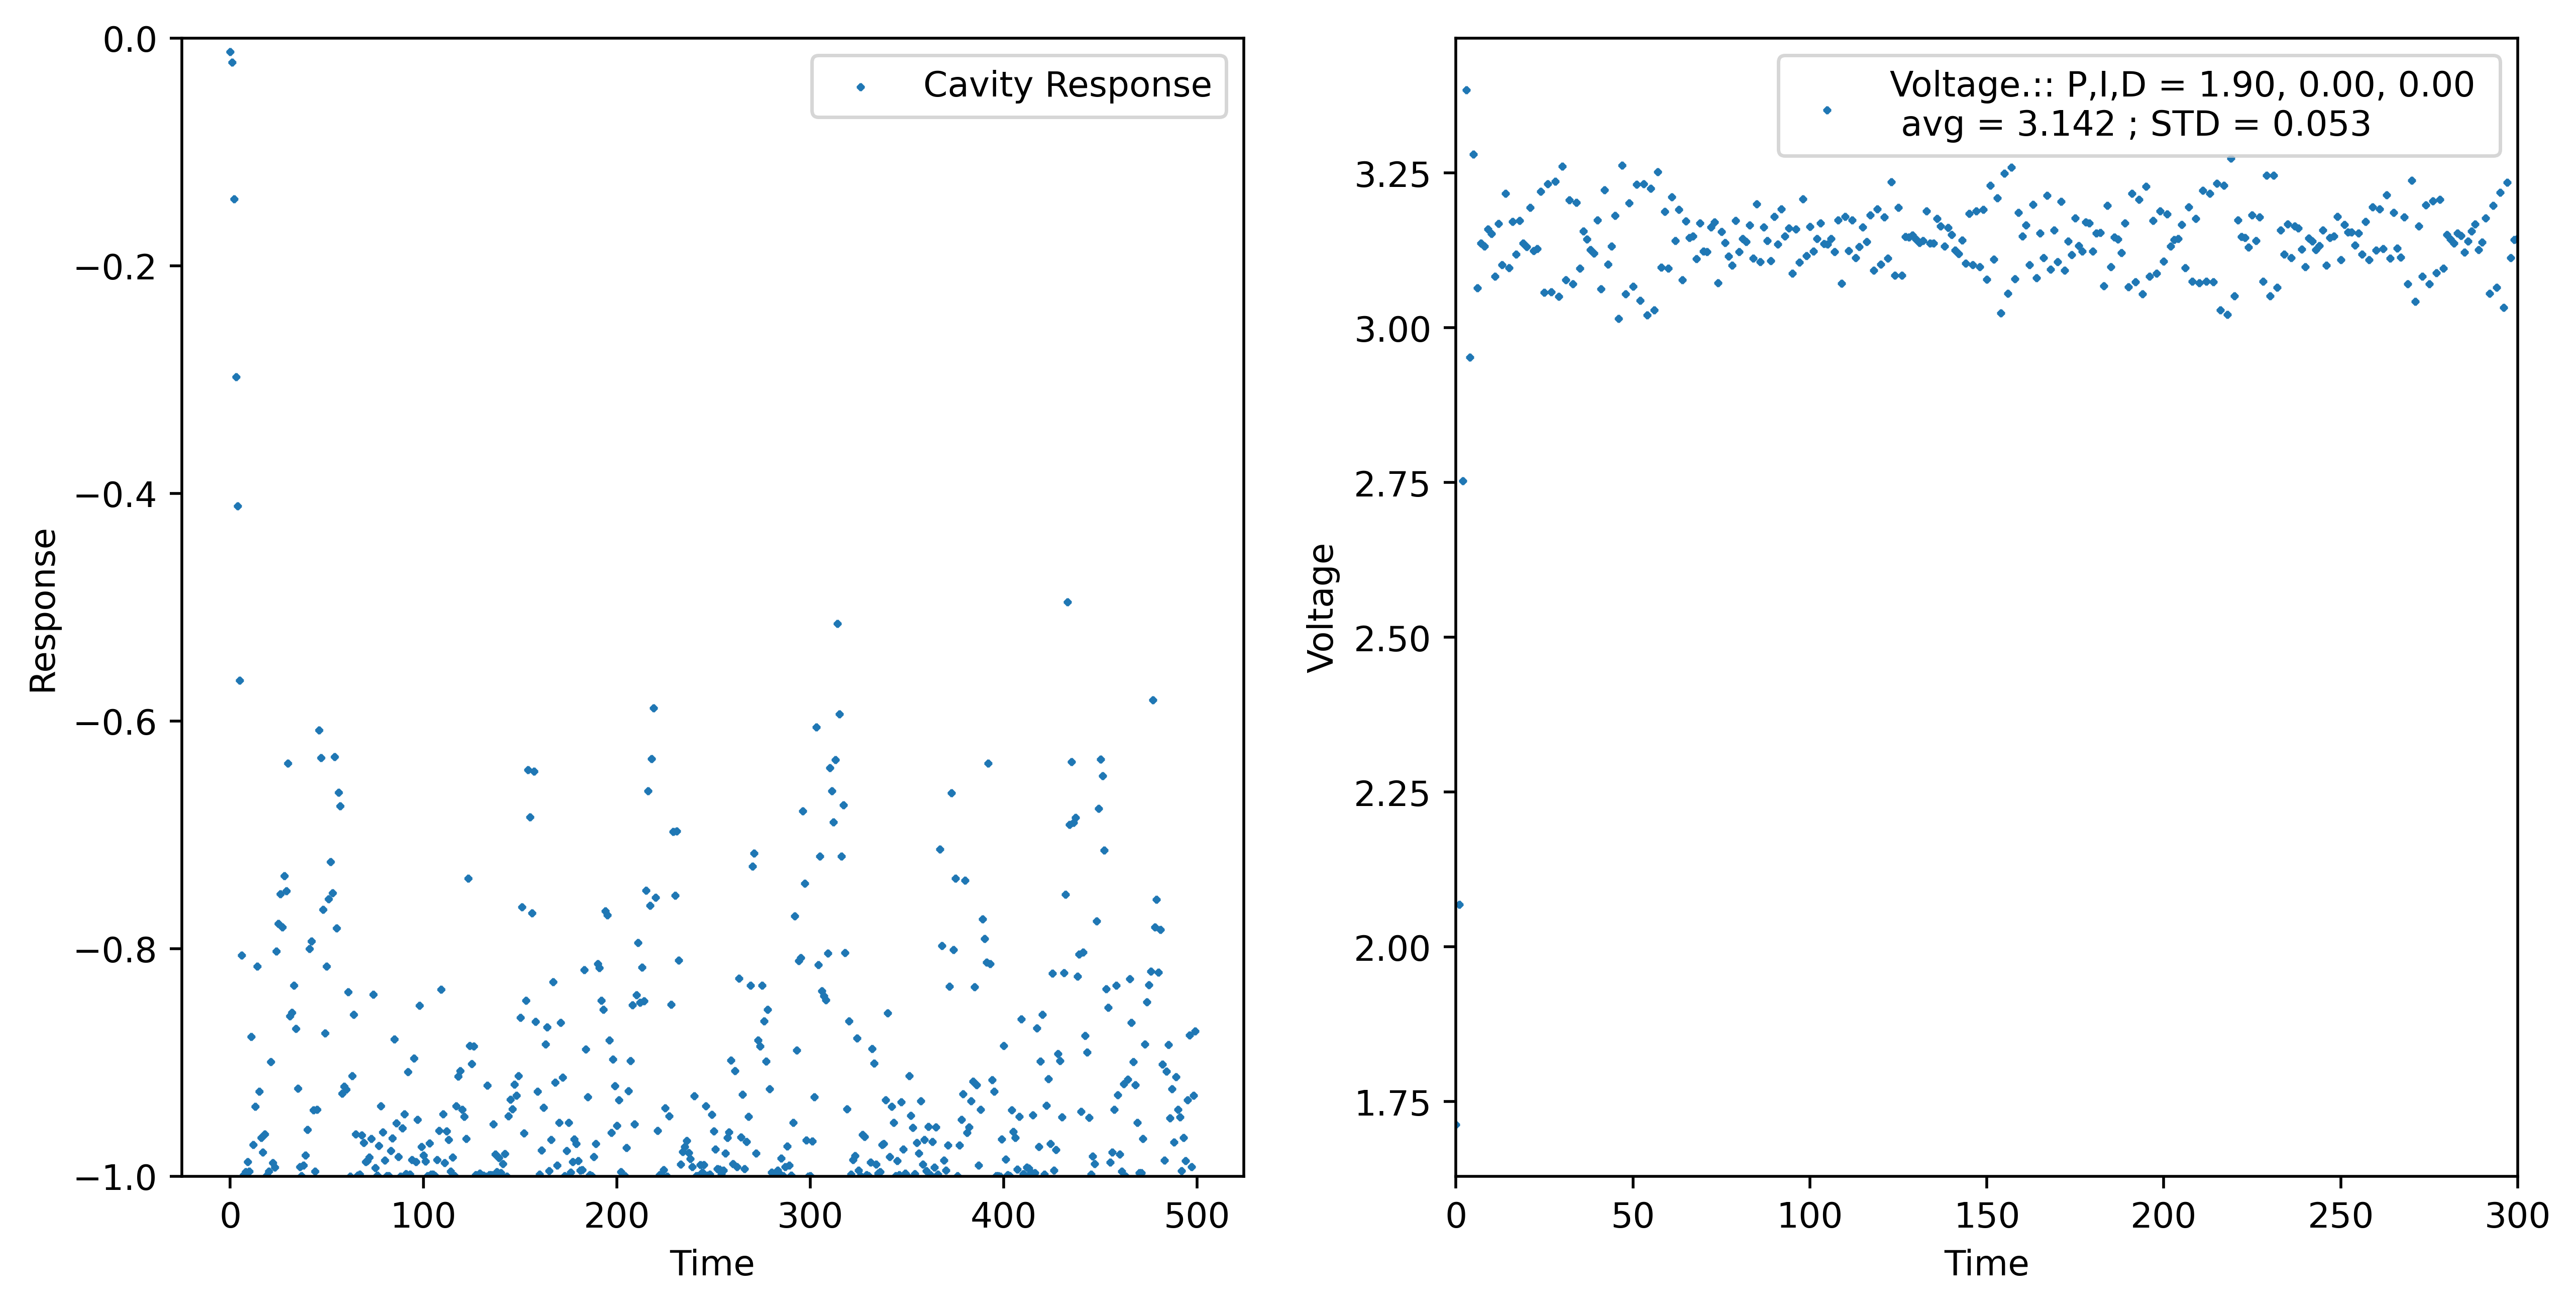

In [102]:
for i in np.arange(10,20,1):
    andrew(i*0.1)

Initial x: 1.5, Initial error: 0.1051351980924146


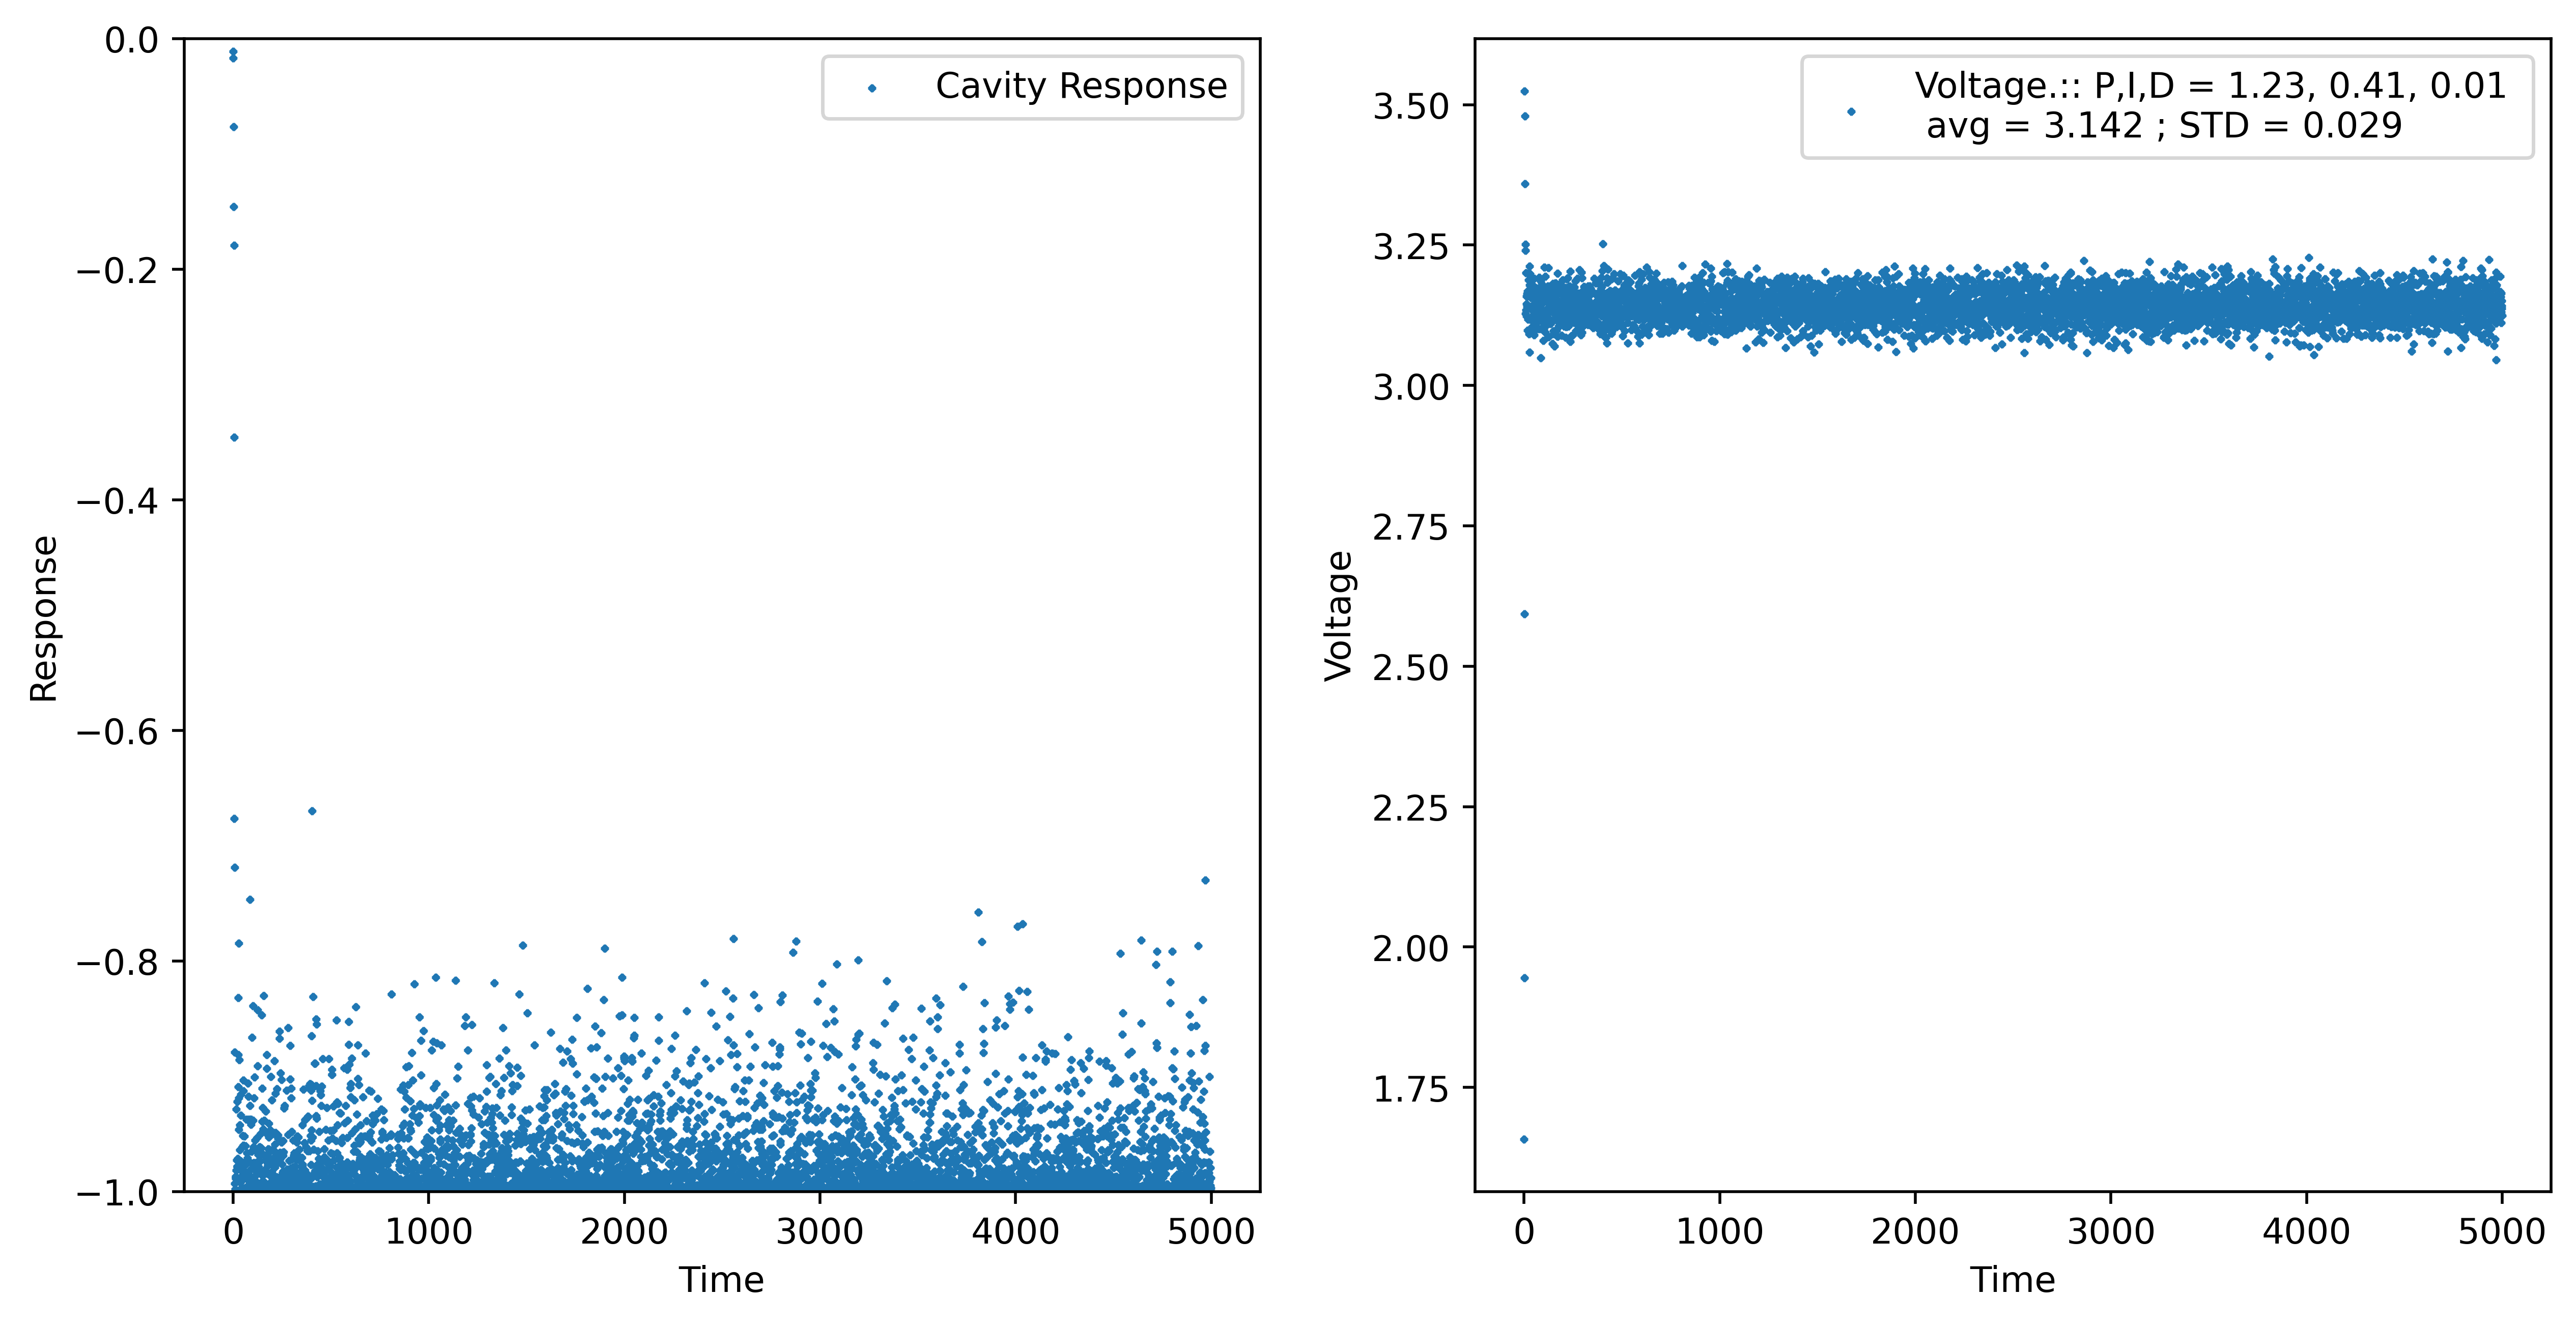

In [159]:
#after playing with the Kp, I choose Kp=1.2, and am going to play with the integral
andrew(1.23,0.412,0.01)

Text(0, 0.5, 'Response')

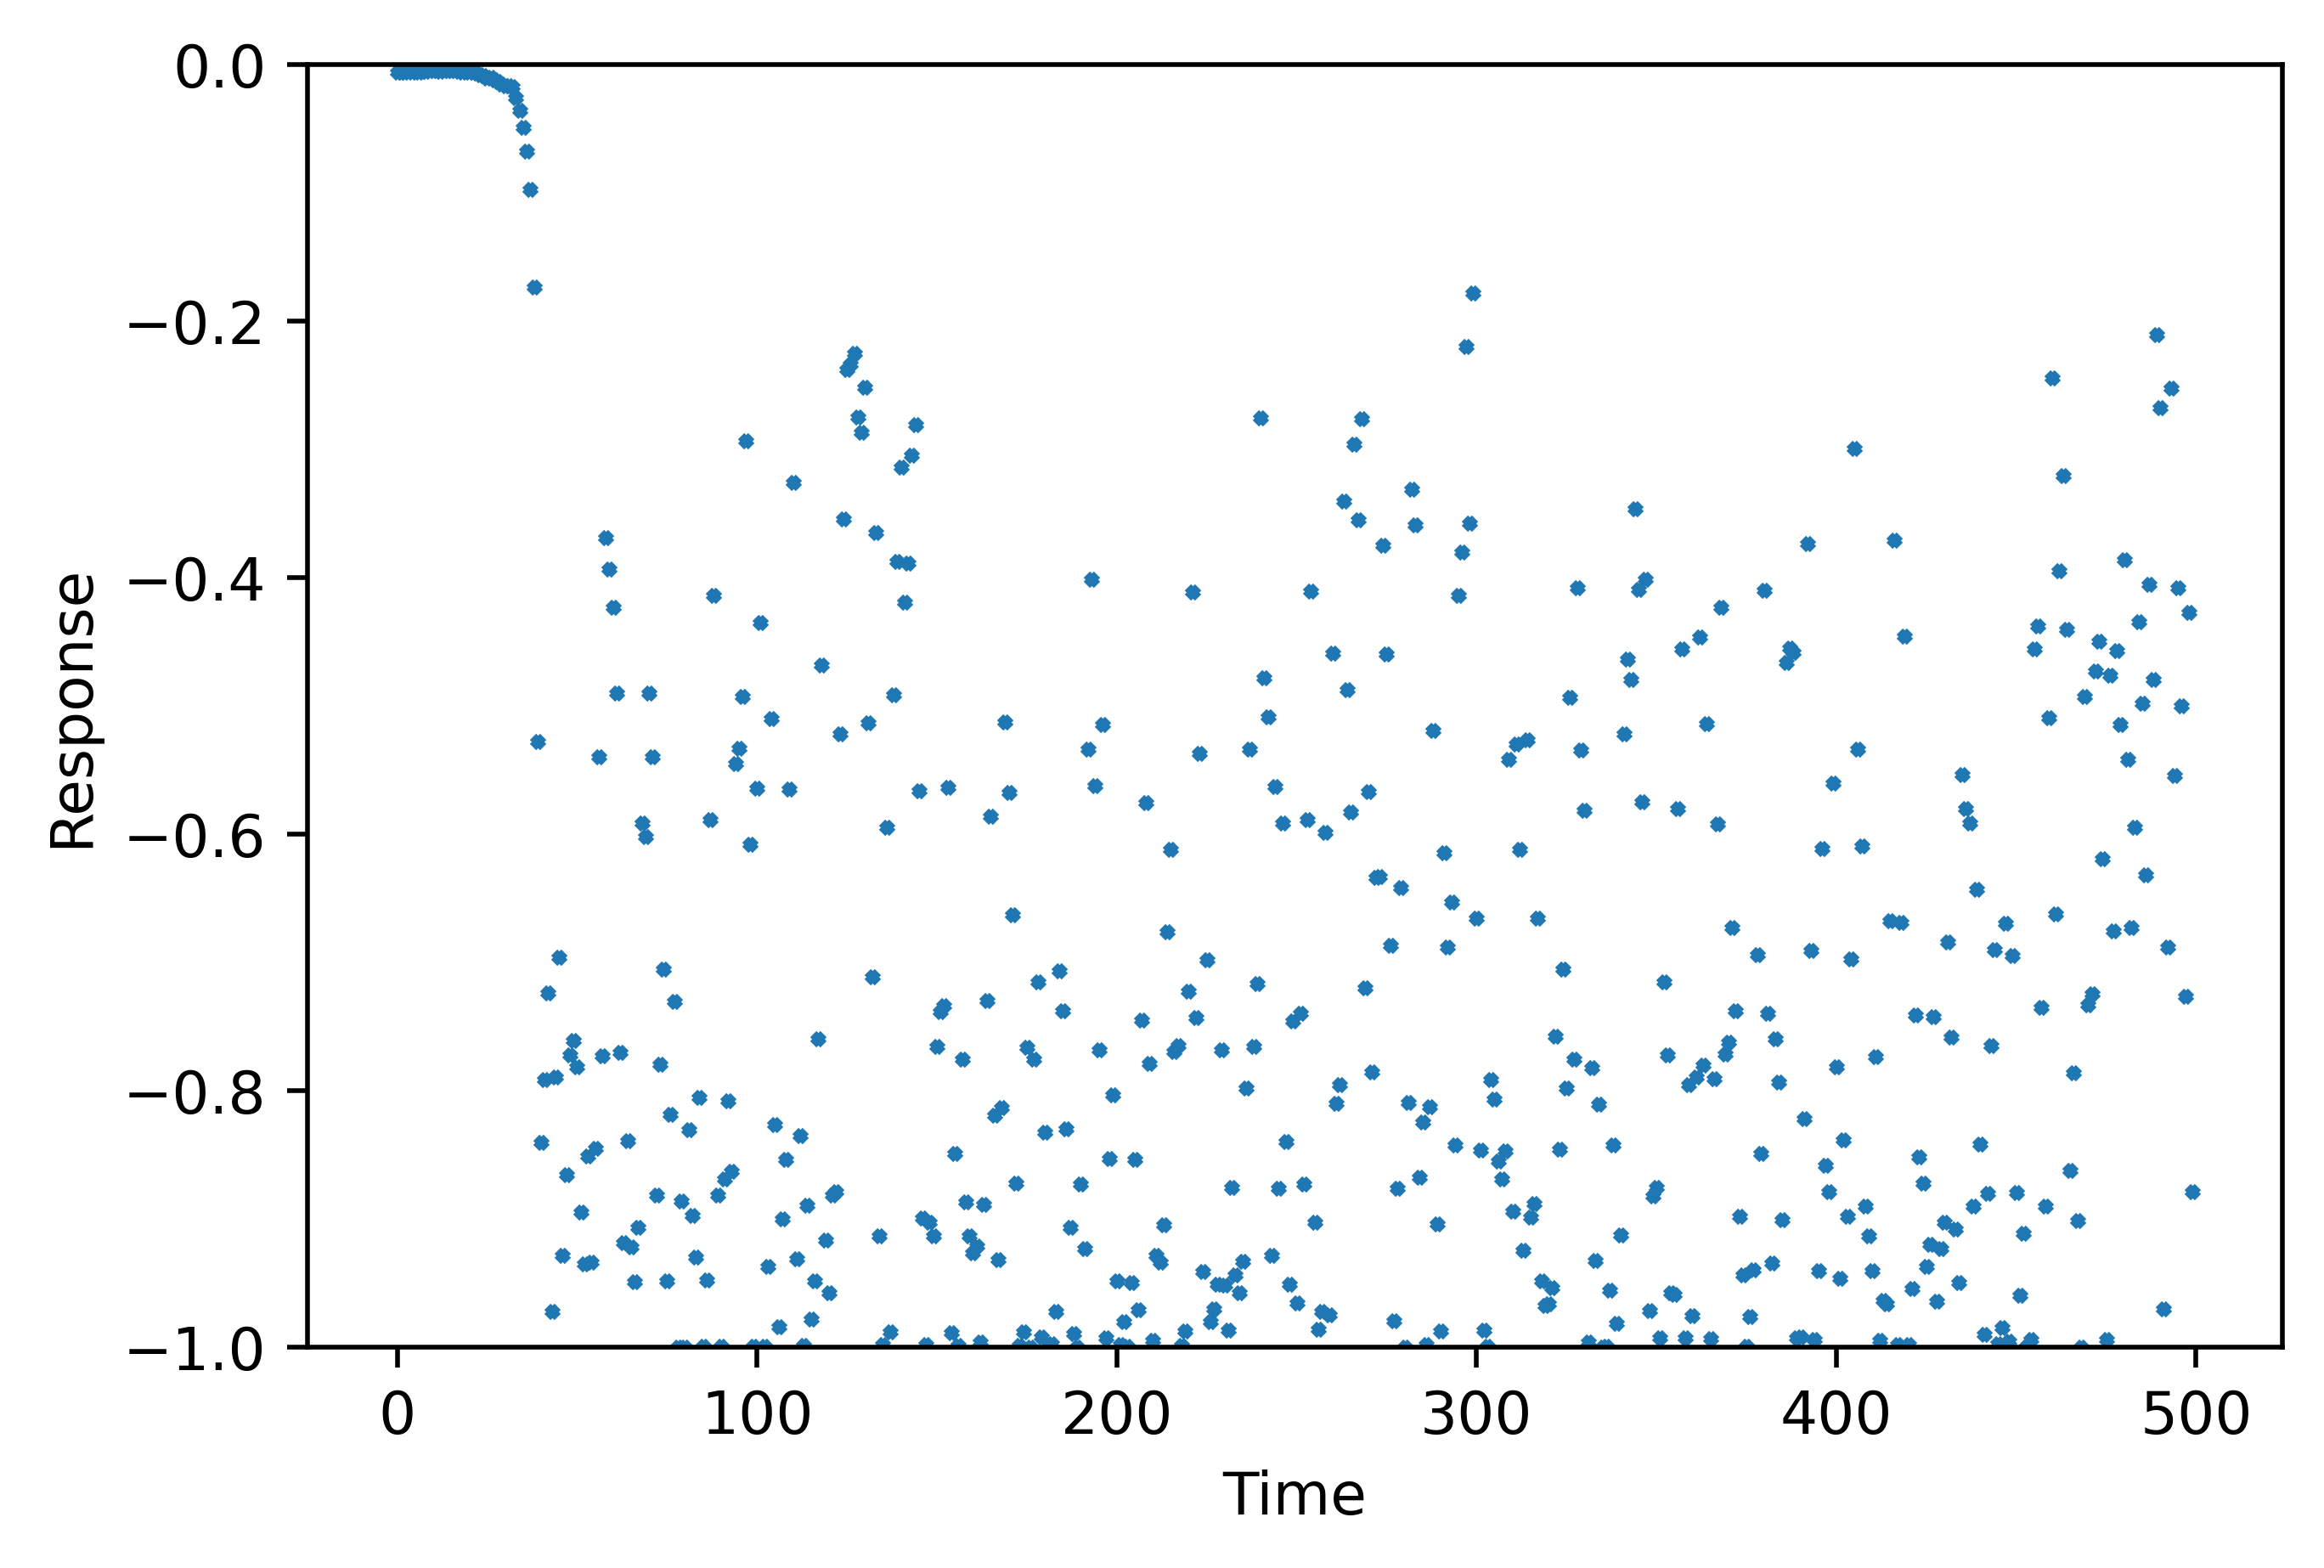

In [53]:
plt.scatter(np.arange(0,len(response),1),response,s=3,marker='x')
plt.ylim(-1,0)
plt.xlabel('Time')  
plt.ylabel('Response')  